# Séries Temporais

Em DS utiliza as predições para antecipar o futuro em um período de tempo.


**Por que faze predições temporais?**

- mais organização.
- melhor gerenciamento de estoque.
- auxílio na compra de matéria prima.

# Método de Gerenciamento de Projeto  - CRISP

<img src = "./img/CRISP_1.png">

# <span style='color:rgb(230, 230, 0)'> Entendimento do Negócio

# <span style='color:blue'> Coleta de Dados

Coleta de dados em banco de dados ou por web scraping

# <span style='color:blue'>Limpeza dos Dados

## Passo 1 - Descrição dos Dados

In [5]:
# Copia
df1 = df_raw.copy()

### 1.1 Rename Columns (sempre faça isso para facilitar)

- Utilize a propriedade **columns** para pegar os nomes das colunas.

colunas = df.columns[0]

- Instale a biblioteca **inflection** para transformar em **snakecase**

In [6]:
cold_old = df_raw.columns[0]

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [8]:
# Função Lambda para aplicar
snakecase = lambda x: inflection.underscore( x )

# Map aplicar uma função em cada elemento de uma lista
cols_new = list(map(snakecase,cols_old))

# rename
df1.columns = cols_new

### 1.2 Data Dimensions

**Quantidade de dados**

Por que saber isso? Para saber se você tem recurso o suficiente para trabalhar no projeto.

Exemplo: temos 1 trilhão de linhas, logo talvez você precise deu um: Servidor, Cluster de Máquinas ou linguagem apropriada ( Spark / Hadoop)

Use a propriedade df.**shape** (linha, colunas)

In [9]:
print(f'number of rows: {df1.shape[0]}') # Linhas
print(f'number of rows: {df1.shape[1]}') # Colunas

number of rows: 1017209
number of rows: 18


### 1.3 Data type

Use a propriedade df.**dtypes** para ver o tipo

- no pandas object é **string**
- sempre mude datas que estão em (int / float) para **datetime**

In [ ]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

Use a função pd.**to_datetime( )** para converter em data

In [ ]:
# Mudar pra date type
df1['date'] = pd.to_datetime( df1['date'] )

Mudar para inteiro por exemplo, use df[ 'coluna' ]**.astype(int)**

In [ ]:
# Exemplo
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

### 1.4 Check NA

**Qual o volume de dados Faltantes ( NA / Vazios ) do seu Dataset?**

**Por que** saber isso? 

- <span style = 'color:green'>Ajuda a **tomar decisões** - </span> Não fazer o projeto por falta de dados. Ou dar um jeito de **preencher** esses dados com **lógica** ou **algorítimos**.
- <span style = 'color:green'>Ajuda a **entender o motivo** desses dados estarem faltando - </span> Problema no Sistema... Input's manuais errados / faltando




Use as funções df**.isnull( )** + **sum( )** para visualizar

In [ ]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

**O que fazer quando temos dados faltantes?**

1-) podemos **descartar* as linhas -> df1.**dropna()** ... problema que você perde informações.

2-) usar **algorítmos** de ML ( Decision Tree é uma boa escolha ) para prever os valores vazios.
 (Quando você não tem informações dos dados)

3-) Entender o problema e usando sua **lógica**.

### 1.7 Descriptive Statistical

**Para que serve Descriptive Statistical?**

- 1º Ganhar conhecimento de Negócio.

- 2º Conseguir detectar alguns erros.

**Estatística Descritiva** é dividida em duas métrias de 1º ordem: **Métricas de Dispersão** e **Métricas de Tendência Central**

**Métrica de Dispersão**

- Variância
- Desvio Padrão
- Min e Max
- Range   -> Max - Min
- Skew    -> é uma representação do quão deslocado está sua distribuição normal, quanto mais próximo de ZERO, mais centralizada está.
- Kurtose -> diz quão alto está seu pico, valor ideal é 1.

**Métrica de Tendência Central** - Resume os dados em **um único número**

- Média -> soma-se tudo e divide pelo número total de elementos
- Mediana -> pega-se o valor central da tabela (se for nº par, você deve fazer (x1+x2)/ 2 )
- Moda -> elemento que mais se repete


**Métrica de Tendência Central + Métrica de Dispersão**

A **métrica de tendência cental** nos dá um valor central, mas não nos informam como os dados estão dispersos entorno desse valor. Logo, necessita-se aplicar as **métricas de dispersão** para saber se os dados estão **concentrados** ou **dispersos** dos **valores centrais**.



#### 1.7.1 Separar Atributos NUMÉRICOS e Atributos CATEGÓRICOS

In [13]:
#Atributos Numéricos ( Média, Mediana, Desvio.P, Min, Max, Rang, Skew, Kurtose)
num_attributes = df1.select_dtypes(include = ['int64','float64'])

#Atributos Categóricos ( Boxplot / Violin )
cat_attributes = df1.select_dtypes(exclude = ['int64','float64','datetime64[ns]'])

#### 1.7.2 Atributos Numéricos

##### 1.7.2.1 Metric of Central Tendency

In [14]:
# Central Tendency - Mean and Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean )).T
ct2 = pd.DataFrame( num_attributes.apply( np.median )).T

##### 1.7.2.2 Metric of Dispersion

In [ ]:
# Dispersion - std(desvio padrao), min, max, range(max-min), skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenate        Ordem que quero ver
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median','std','skew','kurtosis'] 

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


Exemplo de algumas análises que podemos fazer com a tabela acima:

- COSTUMERS - Média de 633 pessoas na loja por dia, com desvio parão de 464... Logo, em um dia eu POSSO ter de 200 a 1000 pessoas em um dia.
- SALES - Média e Mediana com valores próximos, isso indica que os dados estão bem distribuidos em torno do ponto central.

##### 1.7.2.3 plot de distribuição - sns.**DISTPLOT( df['coluna'] )**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


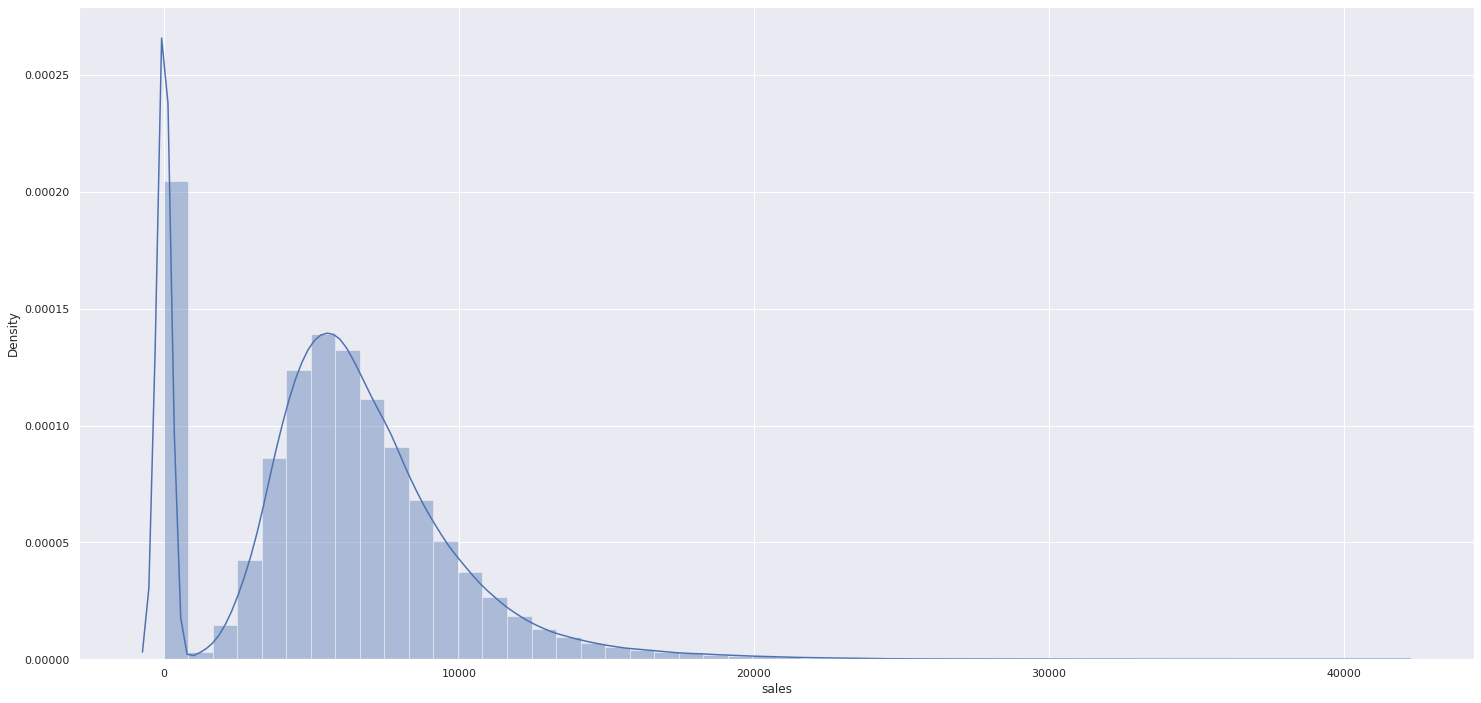

In [ ]:
sns.distplot(df1['sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


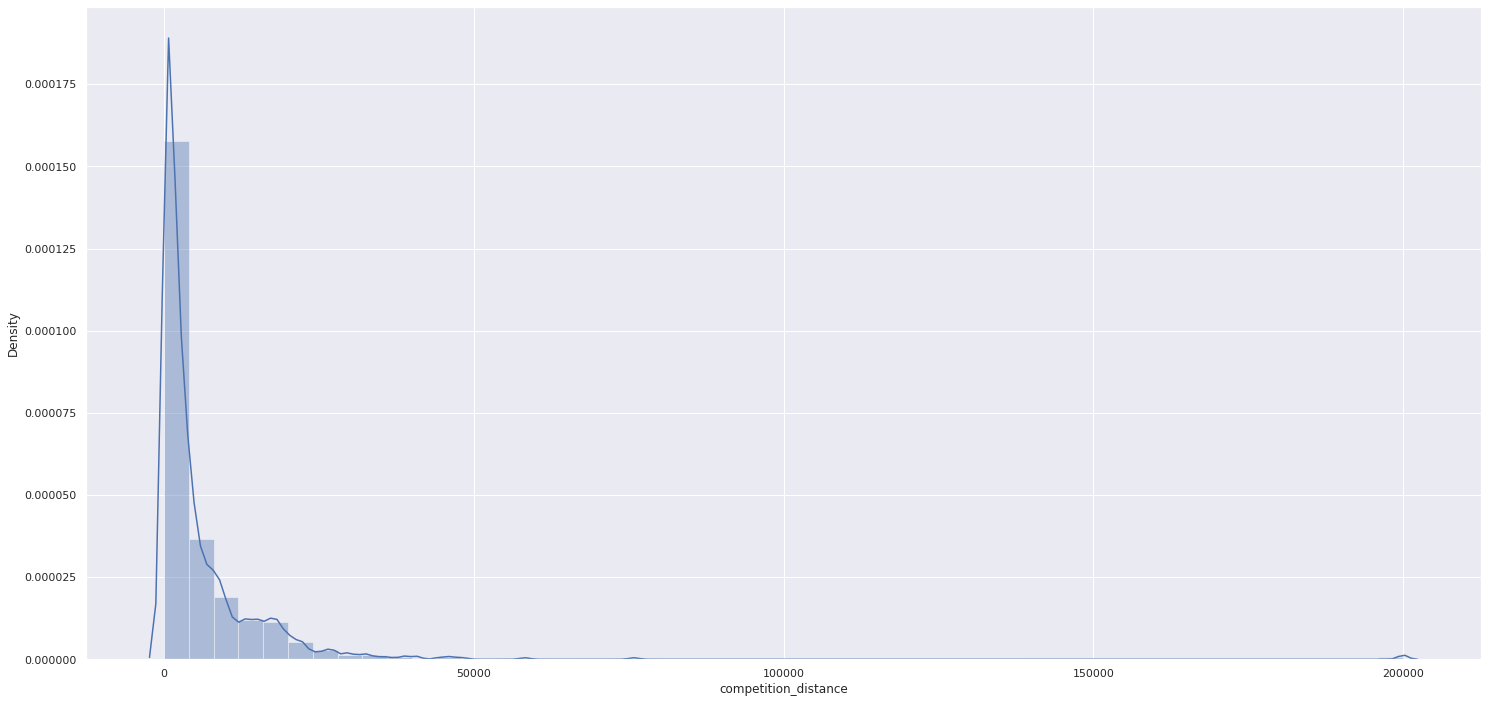

In [ ]:
# COMPETITION_DISTANCE
# - veja que a Skew está em 10... que significa que provavelmente tem um grande deslocamento nesta distribuição normal.
# - A uma Kurtosis gigantescac de 147... Logo deve ter dado um pico gigantesco

# Só de olhar a Skew e Kurtosis, parece que temos uma distribuição de Poisson... logo existe uma concentração muito alta
# de valores no começo.

sns.distplot(df1['competition_distance'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


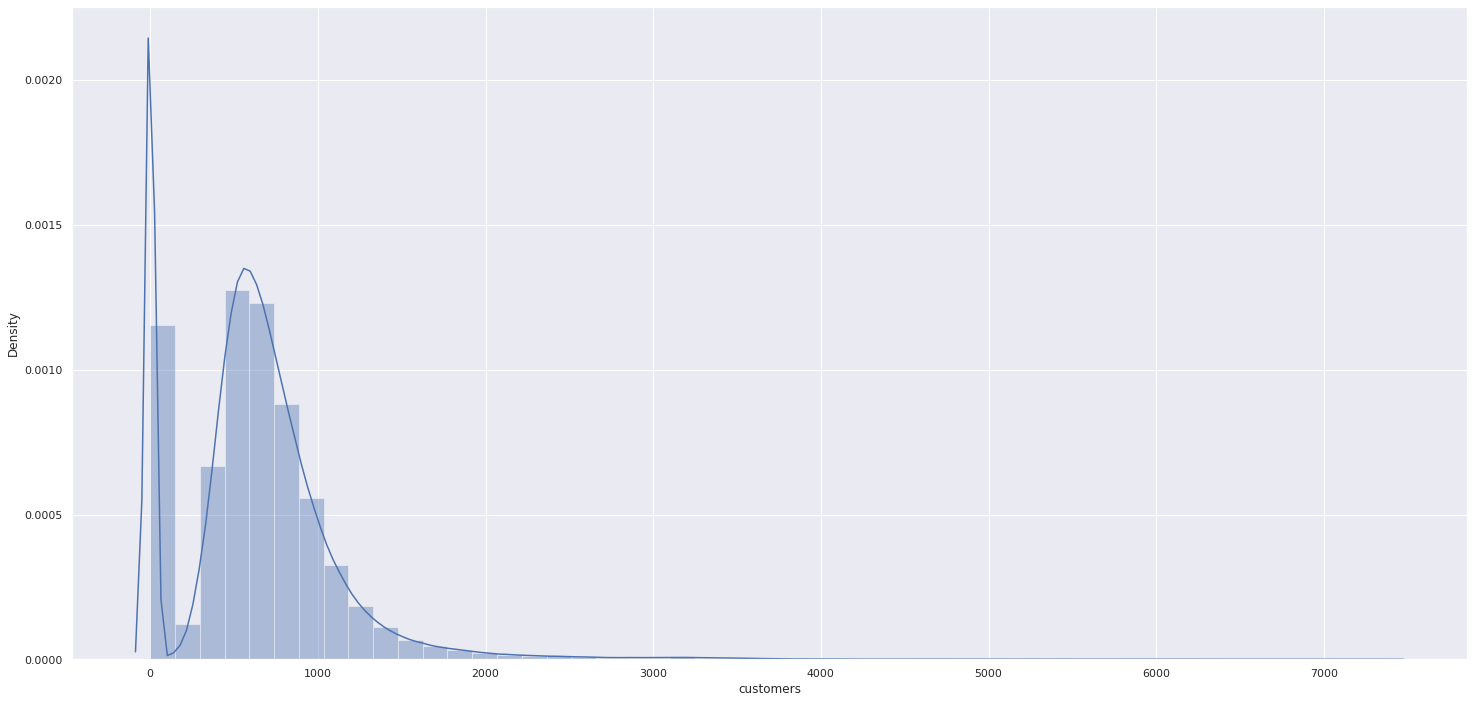

In [ ]:
sns.distplot(df1['customers'])

#### 1.7.3 Atributos Categóricos

In [ ]:
# Visualizar quantidade de categorias por coluna
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

##### 1.7.3.1 Box Plot

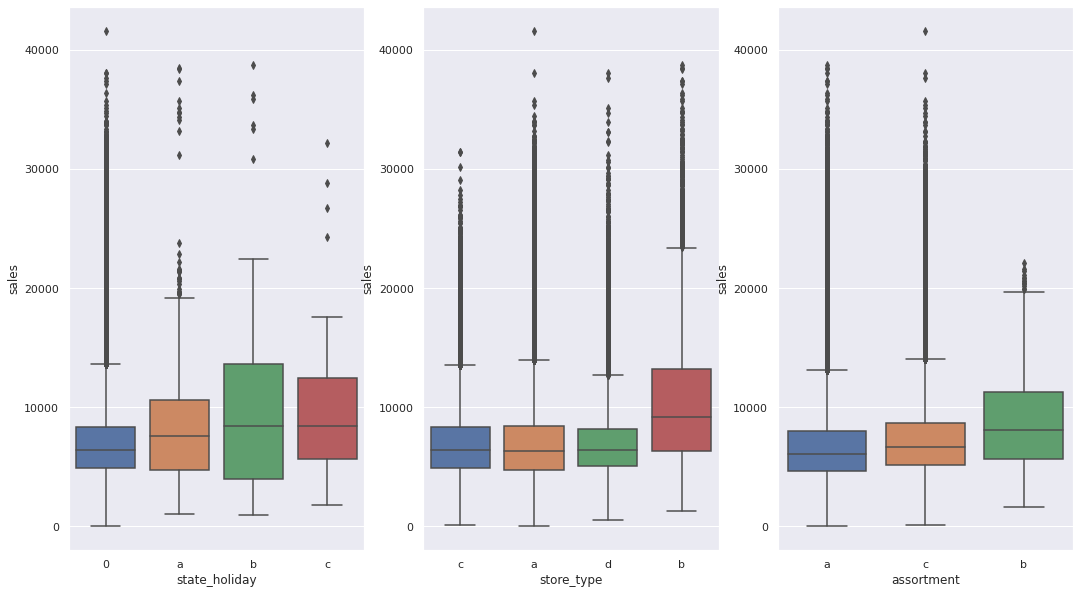

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)

aux1 = df1[ (df1['state_holiday'] != 0) & (df1['sales'] > 0) ]

plt.subplot(1,3,1)
sns.boxplot(
    x='state_holiday',
    y='sales',
    data=aux1
)
plt.subplot(1,3,2)
sns.boxplot(
    x='store_type',
    y='sales',
    data=aux1
)
plt.subplot(1,3,3)
sns.boxplot(
    x='assortment',
    y='sales',
    data=aux1
)

## Passo 2 - Feature Engineering

In [15]:
# Copy
df2 = df1.copy()

Nesta seção iremos em busca dos INSIGNS... E faremos uma avaliação de quais agentes são importantes para o modelo.

### 2.1 Mind Map Hypostesis

Usaremos o Coggle, para criar os mind map hypothesis.

1 - Nosso Fenômeno (o que estamos querendo modelar)-> Vendas Diáreas  (Fica no centro)

2 - Nossos agentes (agentes que impactam no fenômeno)-> Clientes, Localização, Produtos, Lojas, Temporal ( Ficam nos ramos)

3 - Características dos Agentes (atributos dos agentes)->  ficam nos Ramos dos Agentes

Exemplo:

<img src ="https://github.com/miguelzeph/curso_ds_em_producao/blob/master/img/MindMapHypothesis.png?raw=true"  width = 500px>

### 2.2 Criação das Hipóteses

Agora você vai no MIND MAP e olha as CARACTERÍSTICA DOS AGENTES.. e relaciona com o FENÔMENO

Exemplo: AGENTE loja tem CARACTERÍSTICA de nº de funcionário... relacione isso com o FENÔMENO vendas... por exemplo, Quanto mais funcionários, mais vendas (é uma hipóstese a ser avaliada)

Faça isso para todas as características


OBS: Se você não tem essa CARACTERÍSTICA no momento, apenas RISQUE ela, lembre-se que estamos trabalhando com o método CRISP, iremo novamente passar por aqui, talvez seja necessário correr atrás destes dados.

#### 2.2.1 Hipoteses **Loja**

~1 - Lojas com n maior de funcionários deveriam vender mais ( não temos n de func )~

~2 - Lojas com maior capacidade de estoque deveriam vender mais ( não tenho dados do estoque )~

~3 - Lojas com maior porte deveriam vender mais ( Não tenho o porte da Loja )~

4 - Lojas com sortimento maios, deveriam vender mais ( Ok, tenho os tipos de sortimento)

5 - Lojas com competidores mais próximos deveriam vender menos ( Ok,Tenho informações dos competidores )

6 - Lojas com competidores à mais tempo deveriam vender mais ( Ok ) 

#### 2.2.2 Hipoteses **Produtos**

~1 - Lojas que investem mais em Marketing deveriam vender mais.~

~2 - Lojas com maior exposição de produtos deveriam vender mais.~

~3 - Lojas com produtos com preço menor deveriam vender mais.~

~4 - Lojas com promoções mais agressivas deveriam vender mais.~

5 - Lojas com promoções ativas por mais temo deveriam vender mais. (ok)

6 - Lojas com mais dias de promoção deveriam vender mais. (ok)

7 - Lojas com mais promoções consecutivas deveriam vender mais. (ok)

#### 2.2.3 Hipoteses **Tempo**

1 - Lojas abertas no feriado de natal deveriam vender mais

2 - Lojas deveriam vender mais ao longo dos anos

3 - Lojas deveriam vender mais no segundo semetre do ano

4 - Lojas deveriam vender mais depois do dia 10 de cada mês

5 - Lojas deveriam vender menos aos finais de semana.

6 - Lojas deveriam vender menos durante os feriados escolares.

### 2.3 Lista Final de Hipósteses

**LOJAS**

4 - Lojas com sortimento maios, deveriam vender mais ( Ok, tenho os tipos de sortimento)

5 - Lojas com competidores mais próximos deveriam vender menos ( Ok,Tenho informações dos competidores )

6 - Lojas com competidores à mais tempo deveriam vender mais ( Ok )

**PRODUTOS**

5 - Lojas com promoções ativas por mais temo deveriam vender mais. 

6 - Lojas com mais dias de promoção deveriam vender mais.

7 - Lojas com mais promoções consecutivas deveriam vender mais.

**TEMPO**

1 - Lojas abertas no feriado de natal deveriam vender mais

2 - Lojas deveriam vender mais ao longo dos anos

3 - Lojas deveriam vender mais no segundo semetre do ano

4 - Lojas deveriam vender mais depois do dia 10 de cada mês

5 - Lojas deveriam vender menos aos finais de semana.

6 - Lojas deveriam vender menos durante os feriados escolares.




Se o modelo não performar bem, **teremos que pegar mais dados** para performar...

### 2.4 Feature Engineering

Aqui vamos derivar as **variáveis**, ou seja, iremos pegar os dados raw e ajustá-los.


**funções úteis**
- df['date'].dt.year
- df['date'].dt.month
- df['date'].dt.day
- df['date'].dt.weekofyear
- df['date'].dt.strftime( "% - % vc escolhe" )
- datetime.datetime( year = df... , month = df... , day = df... )
- datetime.timedelta( days = 7, months = 1, years = 1 ) vc pode somar dias... meses, anos... com outras datas
- df.apply( func , axis )


EXEMPLO ABAIXO

In [ ]:
# year
df2['year'] = df2['date'].dt.year
# month
df2['month'] = df2['date'].dt.month
# day
df2['day'] = df2['date'].dt.day
# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear
# year week
df2['year_week'] = df2['date'].dt.strftime( "%Y-%W" )

# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime(year=x['competition_open_since_year'],month=x['competition_open_since_month'],day=1 ),axis=1)
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w') - datetime.timedelta( days = 7 ))
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply(lambda x: x.days).astype( int )

# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

Sempre bom visualizar a matriz transposta (.T)

In [ ]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


## Passo 3 - Filtrar Variáveis

1º Filtrar Linhas

2º Filtrar Colunas

In [19]:
# Copy
df3 = df2.copy()

### 3.1 Filtragem das Linhas

Filtre as linhas que te interessam, veja um exemplo abaixo, só quero as lojas abertas (1) e vendas maiores que (0)

In [20]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

### 3.2 Selecao das Colunas

Filtre as colunas que serão úteis para você.

Por exemplo: não serve de nada o número de COSTUMERS na nossa previsão (pois, como irei adivinhar o número de customers daqui 6 semanas)... Nesse caso, vale a pena pegar os históricos dos anos passados e tirar uma média para prever o número de COSTUMERS, OUUUU <span style='color:red'>criar um novo PROJETO para fazer PREDIÇÕES de COSTUMERS na próximas 6 semanas.

In [21]:
# Customers, eu não tenho ele daqui a 6 semanas (restrição de negócios- nao tenho no momento da predição)
'customers'
# Open após a filtragem também não tem valor.

cols_drop = ['customers','open','promo_interval','month_map']
df3 = df3.drop( cols_drop, axis=1 )

# <span style='color:blue'>Exploração dos Dados

## <span style='color:red'> Passo 4 - Análise Exploratória

# 4.0 Passo 4 - Análise Exploratória de Dados (EDA - Exploration Data Analysis)

**objetivo da EDA**

- Ganhar experiência de Negócio
- Validar Hipóteses de Negócio (**insights** novos)
- Selecionar Variáveis importantes para o Modelo (fazer uma seleção preliminar para comparar com a análise futura usando algorítimos de escolha de variáveis)

**Insights** é tudo que você choca a crença de alguém, por exemplo, a pessoa acredita em uma hipótese, e você através dos dados mostra totalmente o inverso... isso é um Insight... Vale ressaltar que você não gera um Insight quando as pessoas já sabem de algo ( exemplo: lojas antigas vendem menos ao longo do ano... as pessoas que trabalham na empresa já sabem disso, logo, mesmo você comprovando isso com dados, você não gerou um insight)

In [22]:
df4 = df3.copy()

In [ ]:
df4.head(3)

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226


## 4.1 Análise Univariada

Analisa-se apenas uma variável (agente)

### 4.1.1 Response Variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


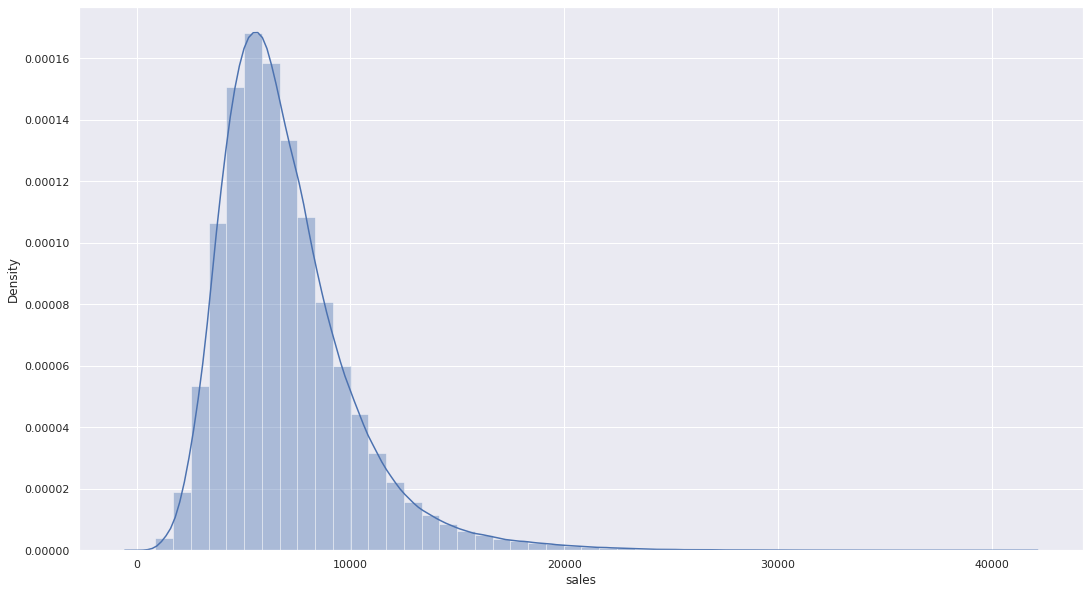

In [ ]:
sns.distplot(df4['sales']) # Sales = RESPOSTA = FENÔMENO = Objetivo que queremos modelar

Veja que a distribuição acima está bem próxima de uma distribuição normal (gaussiana). Por que se importar com isso? Porque os algoritimos de ML eles são criados em algumas premissas... por exemplo, que os dados sejam INDEPENDENTES e normalmente distribuidos (gauss). Quanto mais próximo de uma normal for sua RESPOSTA/SAÍDA/FENÔMENO, melhor seu modelo irá performar. Para isso você pode fazer algumas transformações

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


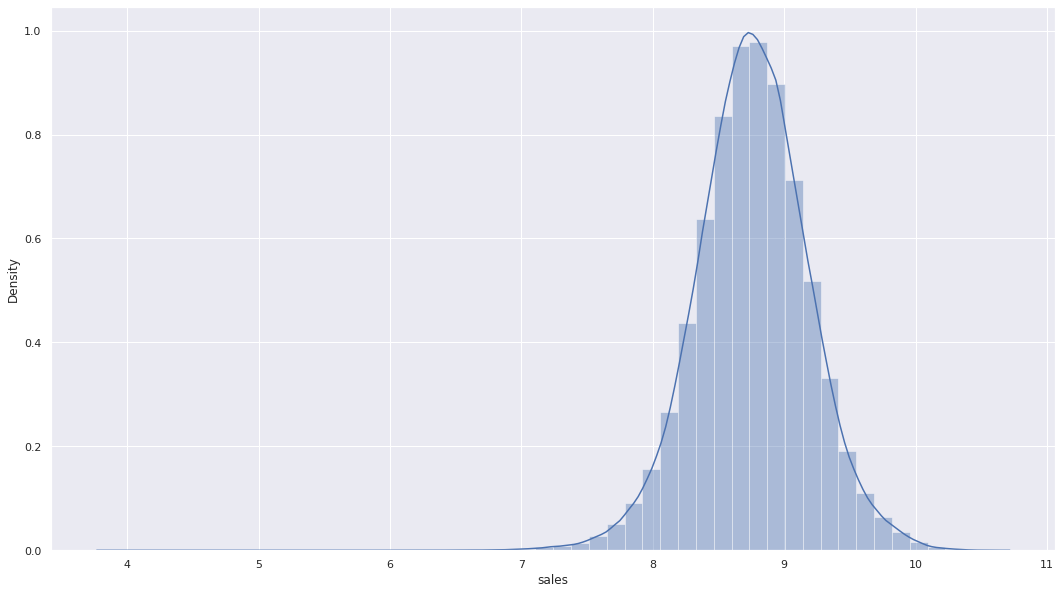

In [ ]:
# np.log1p - multiplica todos os valores de vendas por um log
sns.distplot(np.log1p(df4['sales']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


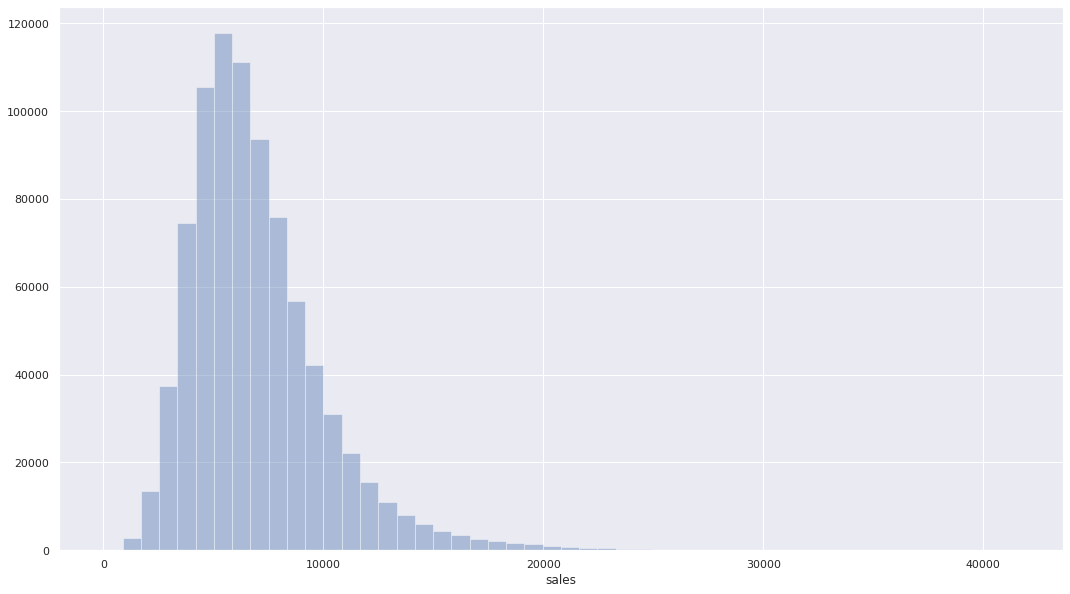

In [ ]:
sns.distplot( df4['sales'], kde = False ) # Sales = RESPOSTA = FENÔMENO = Objetivo que queremos modelar

# Aqui conseguimos ver os eixos y com os números reais

### 4.1.2 Numerical Variable

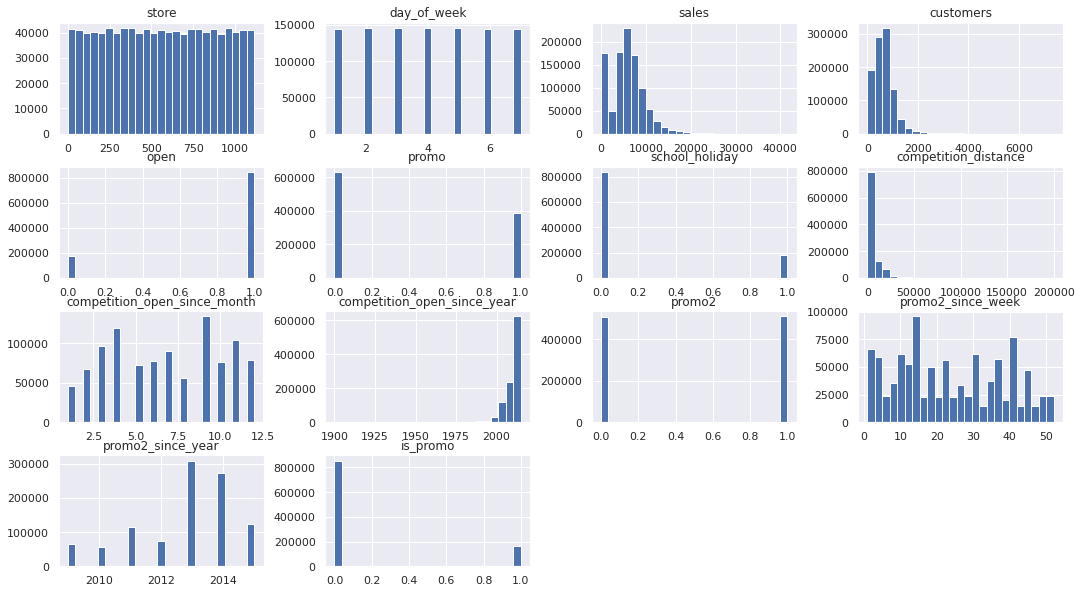

In [ ]:
num_attributes.hist(bins = 25); #  bins = São as divisões de intervalos

### 4.1.3 Categorical Variable

In [23]:
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

In [24]:
df4['state_holiday'].unique()

array(['regular_day', 'public_holiday', 'easter_holiday', 'christmas'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


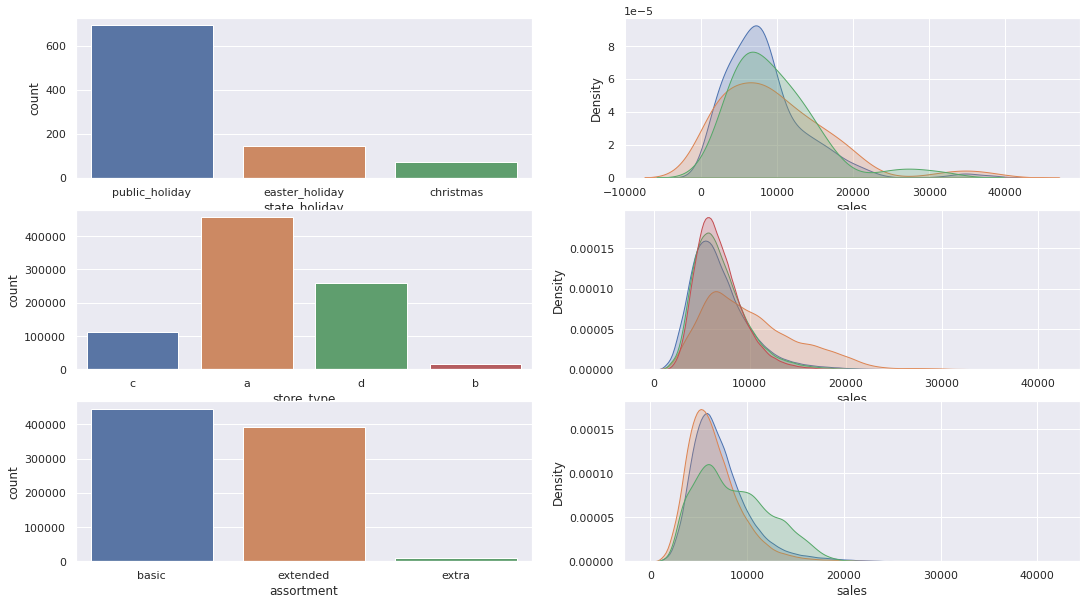

In [ ]:
# Vamos plotar CONTAGEM x DISTRIBUIÇÃO


# State_Holiday
plt.subplot( 3, 2 ,1 ) # linha,coluna,pos

a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot( a['state_holiday'] )

plt.subplot( 3 , 2, 2)

sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday' , shade = True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label = 'easter_holiday' , shade = True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], label = 'christmas' , shade = True )

# Store_type
plt.subplot( 3, 2 ,3 ) # linha,coluna,pos

sns.countplot( df4['store_type'] )

plt.subplot( 3, 2 ,4 ) # linha,coluna,pos

sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label = 'a' , shade = True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label = 'b' , shade = True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label = 'c' , shade = True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label = 'd' , shade = True )

# Assortment
plt.subplot( 3, 2 ,5 ) # linha,coluna,pos

sns.countplot( df4['assortment'] )

plt.subplot( 3, 2 ,6 ) # linha,coluna,pos

sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label = 'extended' , shade = True )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label = 'basic' , shade = True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label = 'extra' , shade = True )



## 4.2 Análise Bivariada

Analisa-se apenas uma variável (agente) com o resultado (fenômeno... nosso objetivo)

### **Hipótese 1** Lojas com sortimento maior, deveriam vender mais

<span style='color:red'>**FALSA**</span> vendem menos...

<span style = 'color:green'>**insights** => Lojas com sortimento maior, vendem menos</span>

<span style = 'color:blue'>**Relevância para o modelo** => minha visão: fraca, corr_pearson: não dá para aplicar em string </span>

In [ ]:
aux1 = df4[['assortment','sales']].groupby('assortment').sum().reset_index()
aux1

,assortment,sales
0,basic,2945750070
1,extended,2856484241
2,extra,70946312


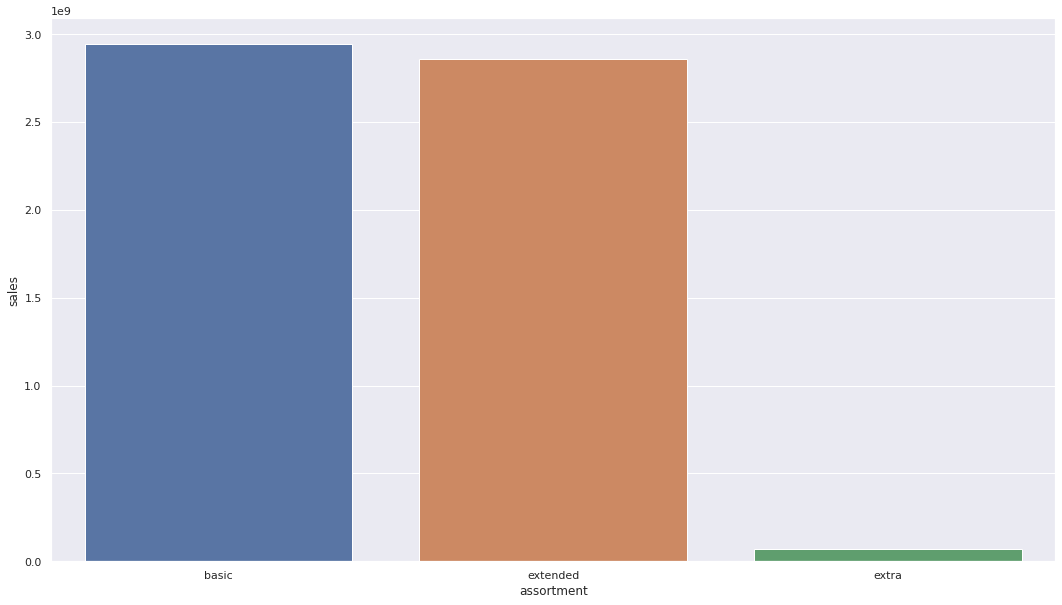

In [ ]:
sns.barplot( x = 'assortment', y = 'sales', data = aux1)

In [ ]:
aux2 = df4[['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
aux2.head()

,year_week,assortment,sales
0,2013-00,basic,13434262
1,2013-00,extended,12425669
2,2013-00,extra,269404
3,2013-01,basic,26007250
4,2013-01,extended,22917693


In [ ]:
aux3 = aux2.pivot(index = 'year_week', columns ='assortment' , values ='sales' )
aux3.head()

assortment,basic,extended,extra
year_week,,,
2013-00,13434262,12425669,269404
2013-01,26007250,22917693,350279
2013-02,17970974,16029584,377207
2013-03,24392076,21243431,404662
2013-04,19972891,18130077,363061


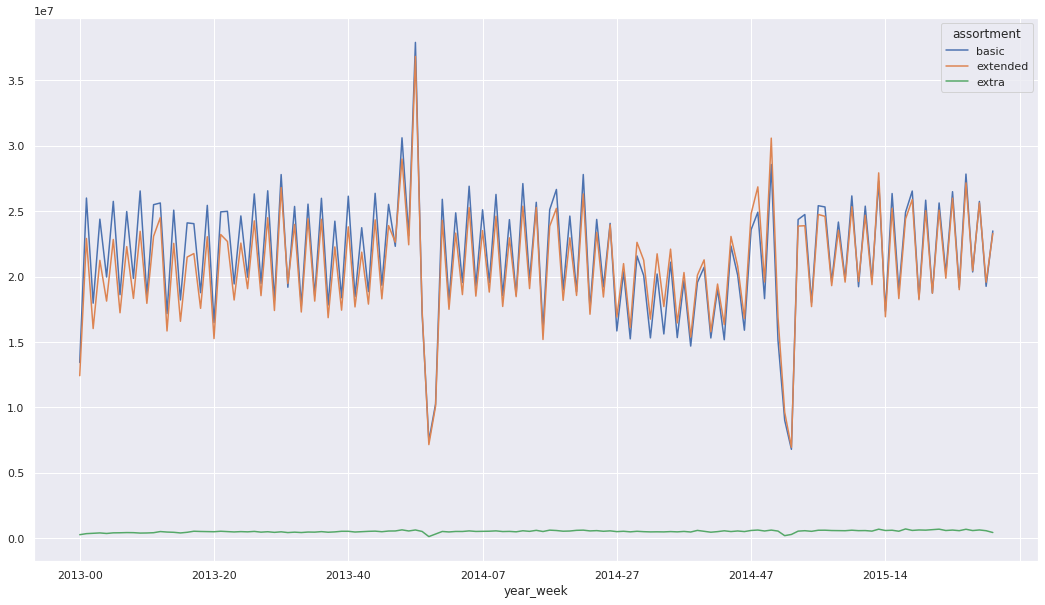

In [ ]:
aux3.plot()

Essa será uma variável importante para o modelo, pois o Extra tem um volume e comportamento muito diferentes do extended e basic.

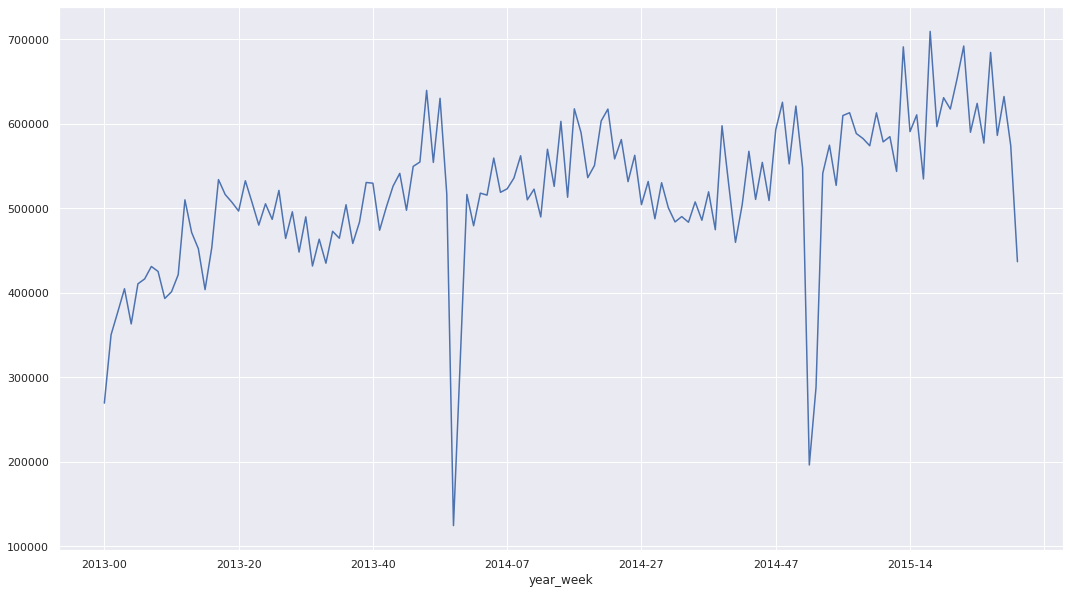

In [ ]:
aux3['extra'].plot()

In [ ]:
aux1

,assortment,sales
0,basic,2945750070
1,extended,2856484241
2,extra,70946312


In [ ]:

# Não dá para fazer o CORR, pois o assortment é STRING
#sns.heatmap( df4[['sales','assortment']].corr(method= 'pearson'), annot = True)

### **Hipótese 2** Lojas com competidores mais próximos deveriam vender menos

<span style='color:red'>**FALSA**</span> vendem mais...


<span style = 'color:green'>**insights** => Competidores próximos, vendem mais</span>

<span style = 'color:blue'>**Relevância para o modelo** => minha visão: média, corr_pearson: -0.2 </span>

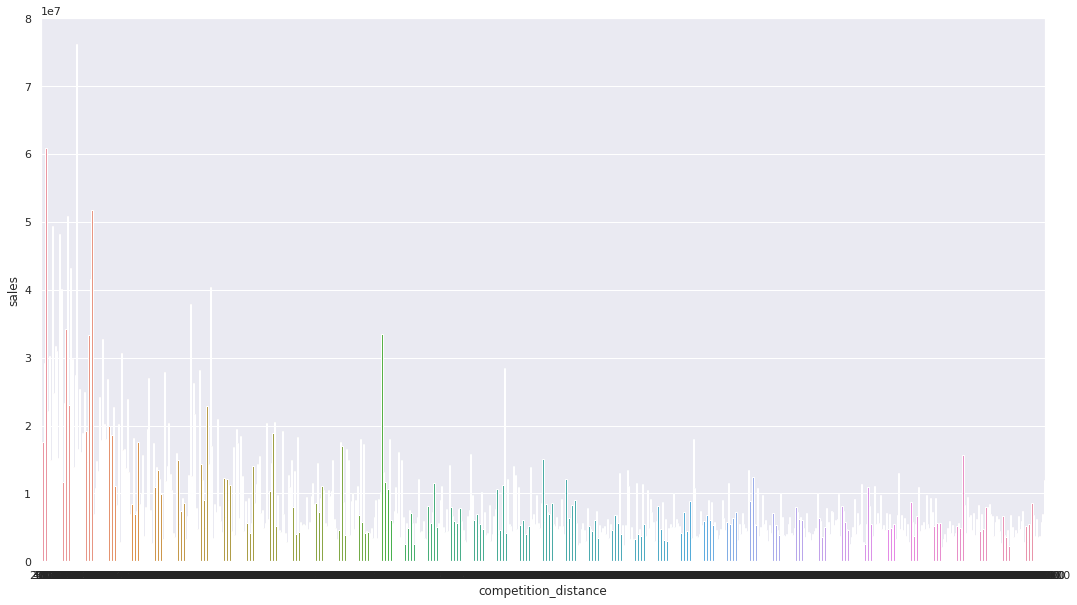

In [ ]:
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()
# Ficou ruim de enxergar, preciso melhorar os bins
sns.barplot( x = 'competition_distance', y = 'sales', data=aux1)

In [ ]:
# Como o gráfico ficou ruim para enxergar Vamos lá fazer algumas modificações

# criar os intervalos (bins)
bins = list(np.arange(0,20000,1000))
# preciso saber em qual grupo ele encaixa
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins = bins)
aux1.head()

,competition_distance,sales,competition_distance_binned
0,20.0,4579807,"(0, 1000]"
1,30.0,17552666,"(0, 1000]"
2,40.0,29261626,"(0, 1000]"
3,50.0,60835848,"(0, 1000]"
4,60.0,22088359,"(0, 1000]"


In [ ]:
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
aux2.head()

,competition_distance_binned,sales
0,"(0, 1000]",1832415839
1,"(1000, 2000]",918682669
2,"(2000, 3000]",610405362
3,"(3000, 4000]",378745560
4,"(4000, 5000]",325665741


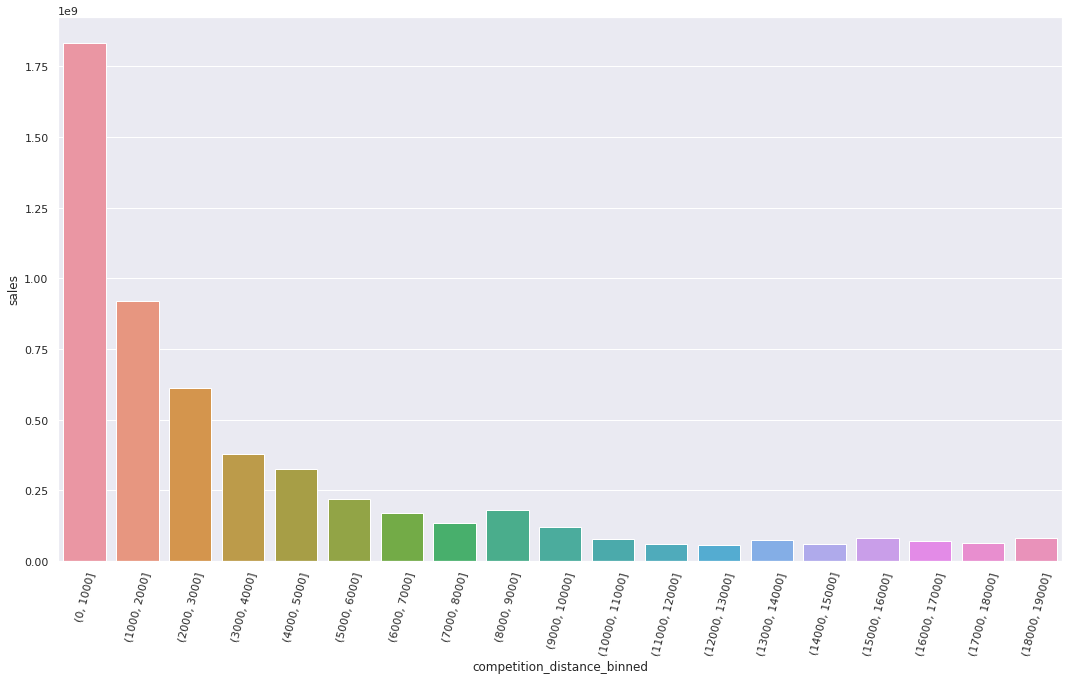

In [ ]:
grafic = sns.barplot(x='competition_distance_binned', y = 'sales', data = aux2)
plt.xticks(rotation=75);
# COMPETIDORES PRÓXIMOS PERTO VENDEM MAIS para essa empresa

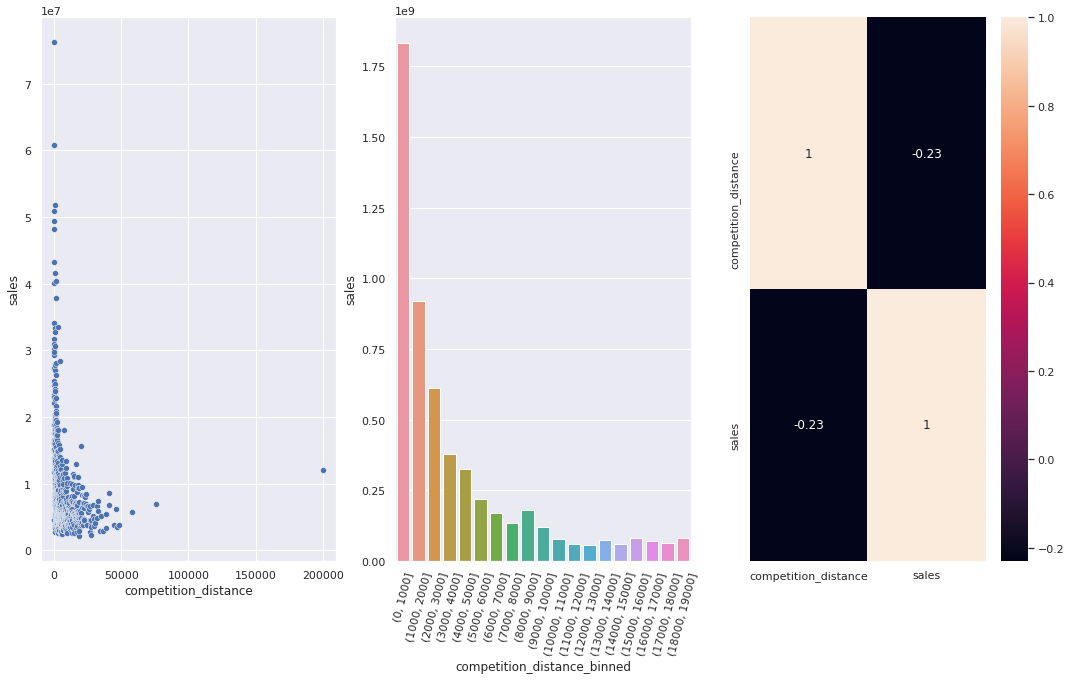

In [ ]:
plt.subplot(1,3,1)
sns.scatterplot(x='competition_distance',y='sales',data=aux1)

plt.subplot(1,3,2)
grafic = sns.barplot(x='competition_distance_binned', y = 'sales', data = aux2)
plt.xticks(rotation=75)

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method = 'pearson'), annot = True );

Veja o gráfico de correlação acima, Sales x Competition_Distance = -0.23... O negativo significa que temos uma razão inversamente proporcional, ou seja, quanto mais distante o concorrente está, menor a venda.

Além disso, iremos utilizar a variável Competition_distance, pois ela tem -0.23 de correlação com SALES

<span style='color:blue'>**corr(method='pearson')** -> vai de -1 até 1... Ele analisa a correlação entre as variáveis da seguinte maneira, se for negativo, significa que são inversamente proporcionais, se for positivo significa que são diretamente proporcionais... se for zero, é por que não apresentam correlação, de modo geral quando mais próximo de zero menos correlação apresentam as variáveis.

### **Hipótese 3** Lojas com competidores à mais tempo deveriam vender mais 

<span style='color:red'>**FALSA**</span> vendem menos...


<span style = 'color:green'>**insights** => Competidores mais tempo, vendem menos</span>

<span style = 'color:blue'>**Relevância para o modelo** => minha visão: fraca, corr_pearson: -0.1 </span>

In [ ]:
aux1 = df4[['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
aux1.tail()

,competition_time_month,sales
371,1403,153074
372,1404,155301
373,1405,154513
374,1406,158205
375,1407,38882


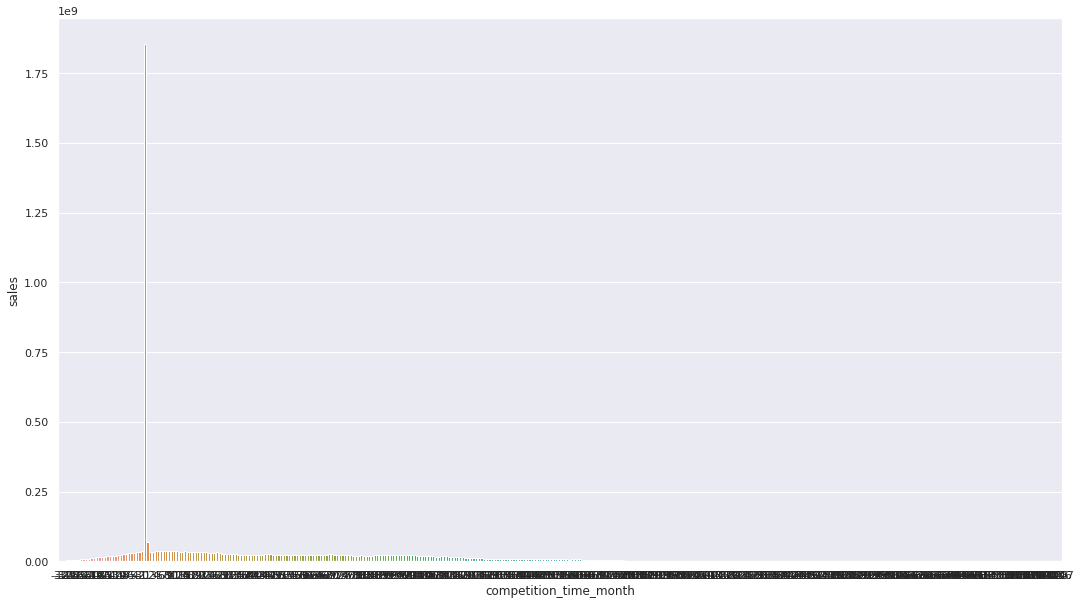

In [ ]:
sns.barplot(x=aux1['competition_time_month'], y = aux1['sales'])
# ruim de enxergar...

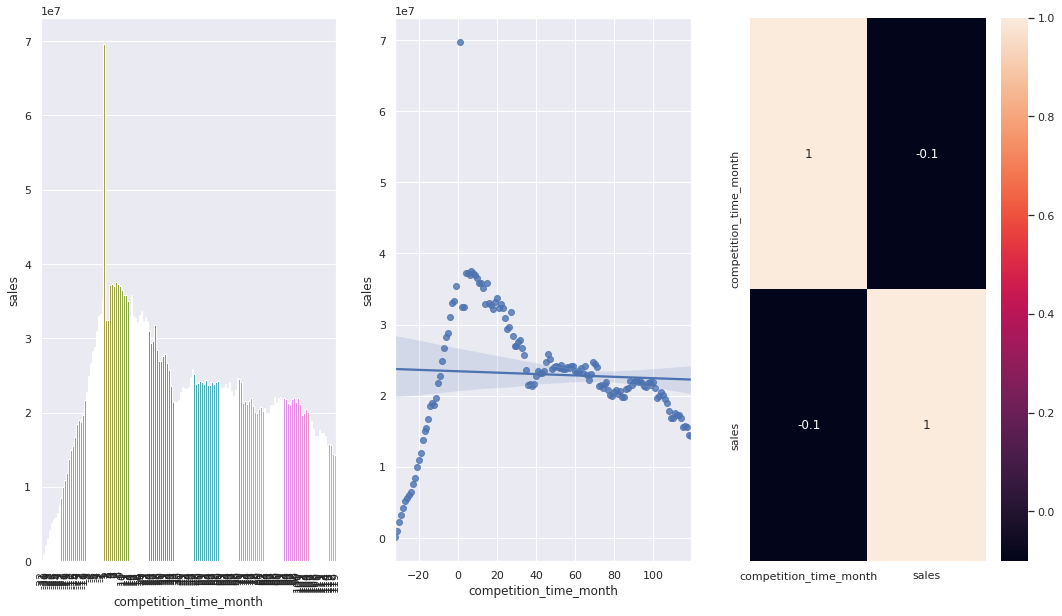

In [ ]:
plt.subplot(1,3,1)
# vamos fazer um filtro para visualizar melhor
aux2 = aux1[ (aux1['competition_time_month'] <120) & (aux1['competition_time_month'] != 0) ]
sns.barplot(x=aux2['competition_time_month'], y = aux2['sales'])
plt.xticks(rotation=90);

plt.subplot(1,3,2)
sns.regplot(x = 'competition_time_month', y = 'sales', data = aux2)

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot = True)

Apresenta uma correlação muito baixa, -0.1, talvez nem seja relevante para o modelo de Sales (vamos deixar ver a opinião do algorítimo depois)

### **Hipótese 4** Lojas com promoções ativas por mais temo deveriam vender mais. 

<span style='color:red'>**FALSA**</span> vendem menos após um certo período de tempo


<span style = 'color:green'>**insights** => Vendem menos, provavelmente deve ser um insight </span>

<span style = 'color:blue'>**Relevância para o modelo** => minha visão: fraca, corr_pearson: -0.029 </span>

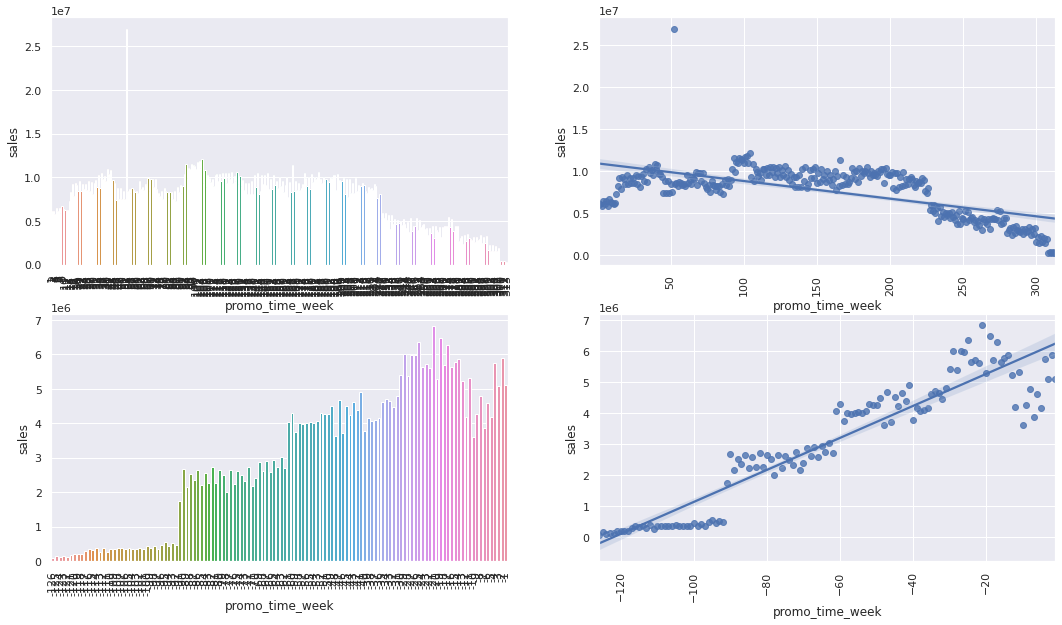

In [ ]:
aux1 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()
#sns.barplot(x = 'promo_time_week', y = 'sales', data = aux1) # MUITOS DADOS... fazer filtro

aux2 = aux1[aux1['promo_time_week'] > 0 ] # promo extendida
aux3 = aux1[aux1['promo_time_week'] < 0 ] # promo normal

plt.subplot(2,2,1)
sns.barplot(x = 'promo_time_week', y = 'sales', data = aux2)
plt.xticks(rotation=90);

plt.subplot(2,2,2)
sns.regplot(x = 'promo_time_week', y = 'sales', data = aux2)
plt.xticks(rotation=90);

plt.subplot(2,2,3)
sns.barplot(x = 'promo_time_week', y = 'sales', data = aux3)
plt.xticks(rotation=90);

plt.subplot(2,2,4)
sns.regplot(x = 'promo_time_week', y = 'sales', data = aux3)
plt.xticks(rotation=90);

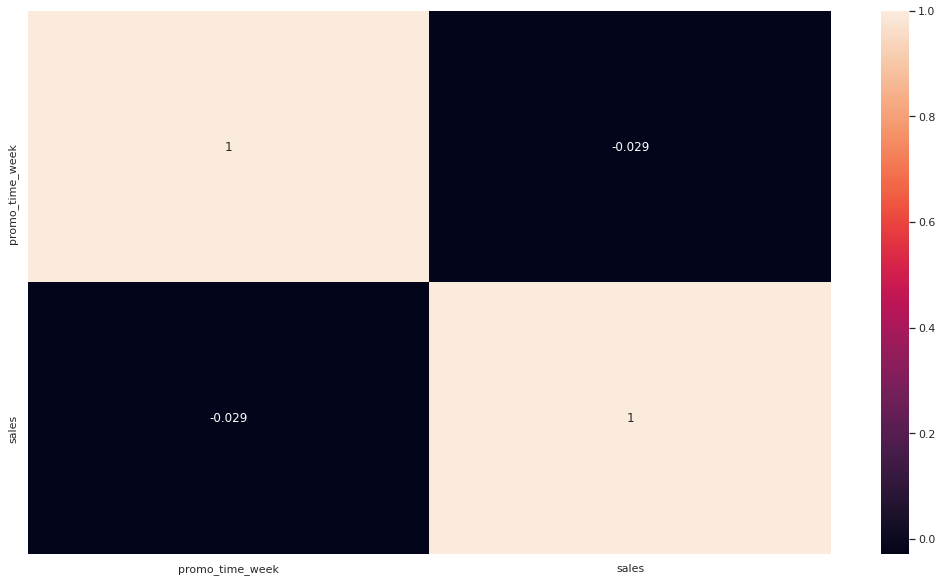

In [ ]:
sns.heatmap(aux1.corr(),annot = True)

Correlação muito baixa, de -0.029, talvez nem entre no modelo

### ~**Hipótese 5** Lojas com mais dias de promoção deveriam vender mais.~

### **Hipótese 6** Lojas com mais promoções consecutivas deveriam vender mais.

<span style='color:red'>**FALSA**</span> Lojas com mais promoções consecutivas vendem menos


<span style = 'color:green'>**insights** => Provavelmente será um insight</span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão: fraca, corr_pearson: nda </span>

In [ ]:
aux1 = df4[['promo','promo2','sales']].groupby(['promo','promo2']).sum().reset_index()
aux1.head()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


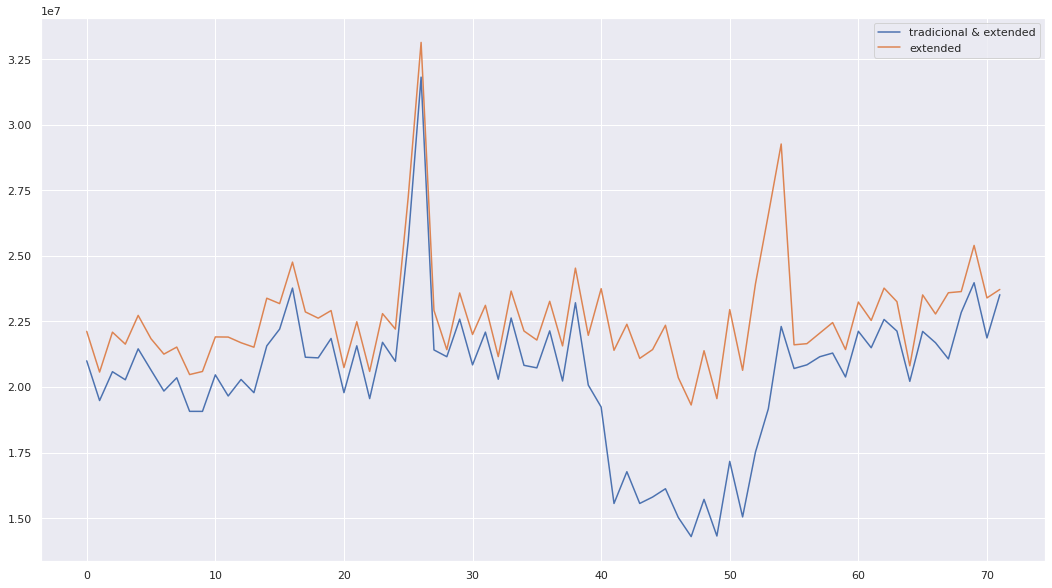

In [ ]:
aux1 = df4[ ( df4['promo'] == 1 ) & ( df4['promo2'] == 1 )][['year_week','sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4[ ( df4['promo'] == 1 ) & ( df4['promo2'] == 0 )][['year_week','sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax=ax)

ax.legend( labels = ['tradicional & extended','extended'] )

Exceto pelo intervalo de 40 a 55, não houve uma variação significativa, logo não deve contribuir tanto para o aprendizado do modelo.

Pois os modelos de ML aprendem de acordo com a variabilidade dos dados... se os dados carregam sempre comportamentos próximos, eles acabam por não evoluir mais... Por isso essa variável será de pouca importância para o modelo, pois só tem um trecho com informação relevante

### **Hipótese 7** Lojas abertas no feriado de natal deveriam vender mais

<span style='color:red'>**FALSA**</span> No natal vende menos


<span style = 'color:green'>**insights** => NÃO DEVERÁ SER... POIS PROVAVELMENTE AS EMPRESAS JÁ SABEM DISSO </span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão:.... , corr_pearson: n dá para fazer com strings </span>

In [ ]:
df4['state_holiday'].unique()

array(['regular_day', 'public_holiday', 'easter_holiday', 'christmas'],
      dtype=object)

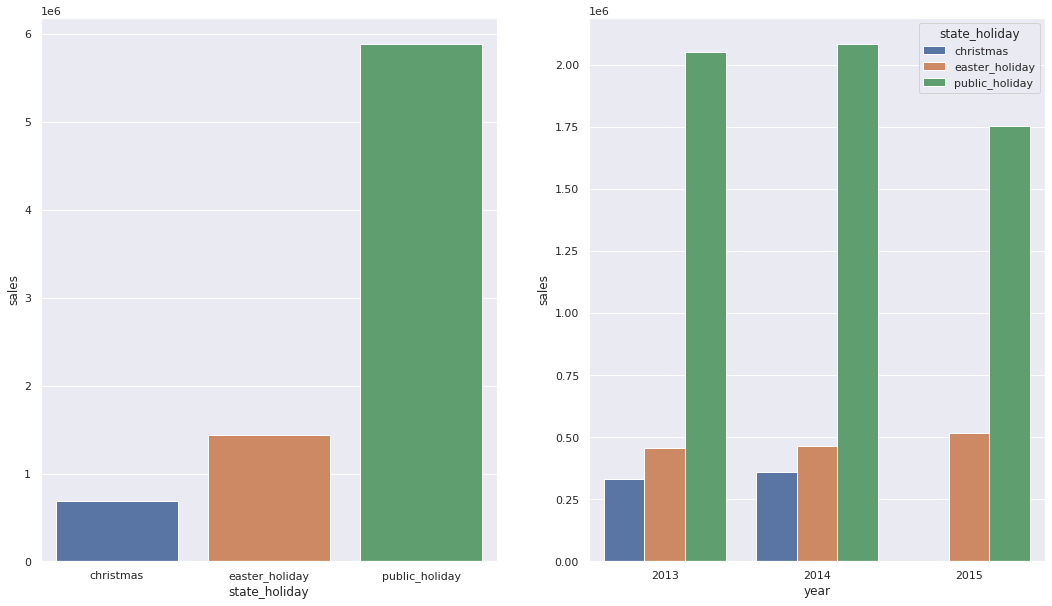

In [ ]:
plt.subplot(1,2,1)
aux = df4[df4['state_holiday']!='regular_day']
aux1 = aux[['state_holiday','sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x = 'state_holiday', y = 'sales', data = aux1);


plt.subplot(1,2,2)
aux2 = aux[['year','state_holiday','sales']].groupby(['year','state_holiday']).sum().reset_index()
sns.barplot(x='year', y='sales', hue = 'state_holiday',data=aux2);

### **Hipótese 8** Lojas deveriam vender mais ao longo dos anos

<span style='color:red'>**FALSA**</span> vende menos


<span style = 'color:green'>**insights** => NÃO DEVERÁ SER... POIS PROVAVELMENTE AS EMPRESAS JÁ SABEM DISSO </span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão: Forte , corr_pearson: -0.92 </span>

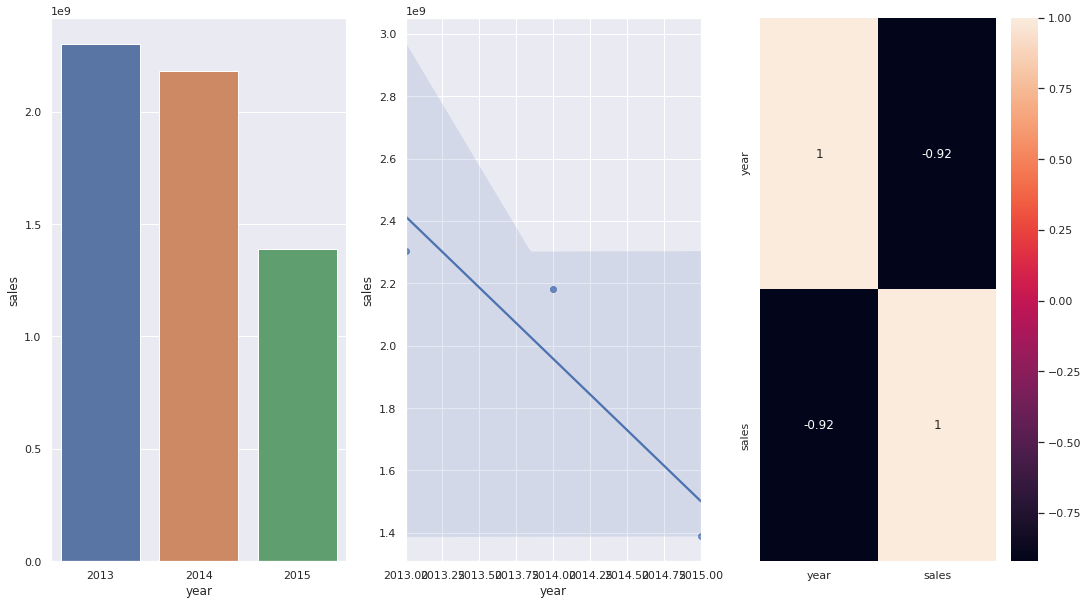

In [ ]:
aux1 = df4[['year','sales']].groupby('year').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x= 'year', y = 'sales', data = aux1);
plt.subplot(1,3,2)
sns.regplot(x= 'year', y = 'sales', data = aux1);
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(),annot=True);

Correlação Year x Sales = -0.92... uma correlação muito forte, indica que conforme os anos aumentam, as vendas vão caindo (por isso o negativo... indica uma decreção)

### **Hipótese 9** Lojas deveriam vender mais no segundo semetre do ano

<span style='color:red'>**FALSA**</span> vendem menos


<span style = 'color:green'>**insights** => Não gera um insight, pois depende muito do negócio da empresa... por exemplo, farmácias vendem menos no segundo semestre </span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão: Forte , corr_pearson: -0.75 </span>

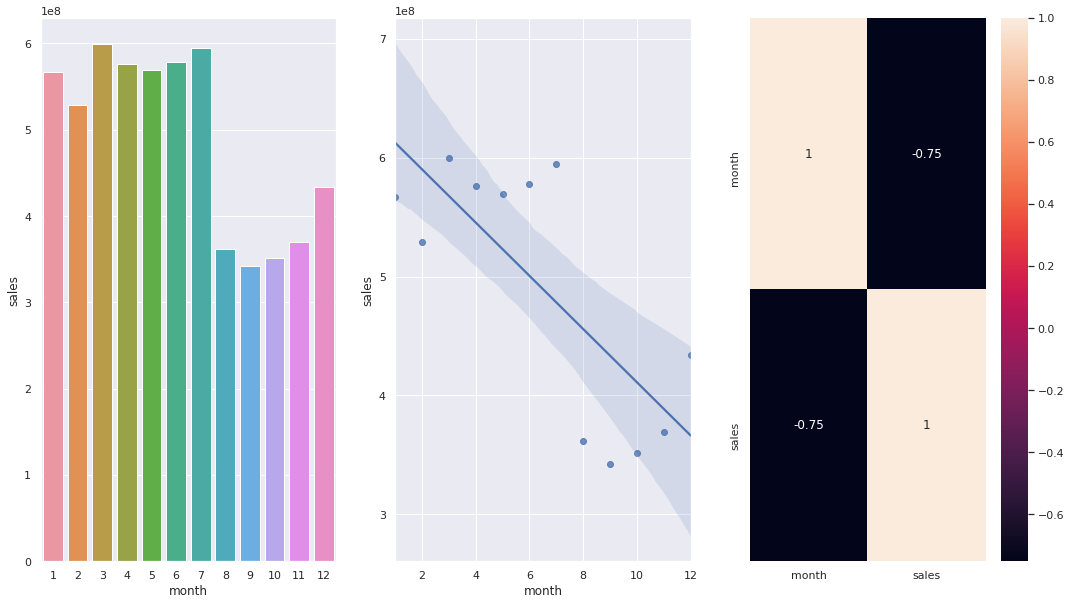

In [ ]:
aux1 = df4[['month','sales']].groupby('month').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x= 'month', y = 'sales', data = aux1);
plt.subplot(1,3,2)
sns.regplot(x= 'month', y = 'sales', data = aux1);
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(),annot=True);

As Lojas da Rossman vendem menos após o segundo semestre!!! 

### **Hipótese 10** Lojas deveriam vender mais depois do dia 10 de cada mês

<span style='color:green'>**TRUE**</span> vendem mais após dia 10


<span style = 'color:green'>**insights** => não deve ser um insight, pois as pessoas acompanham isso na empresa </span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão: Média , corr_pearson: -0.35 </span>

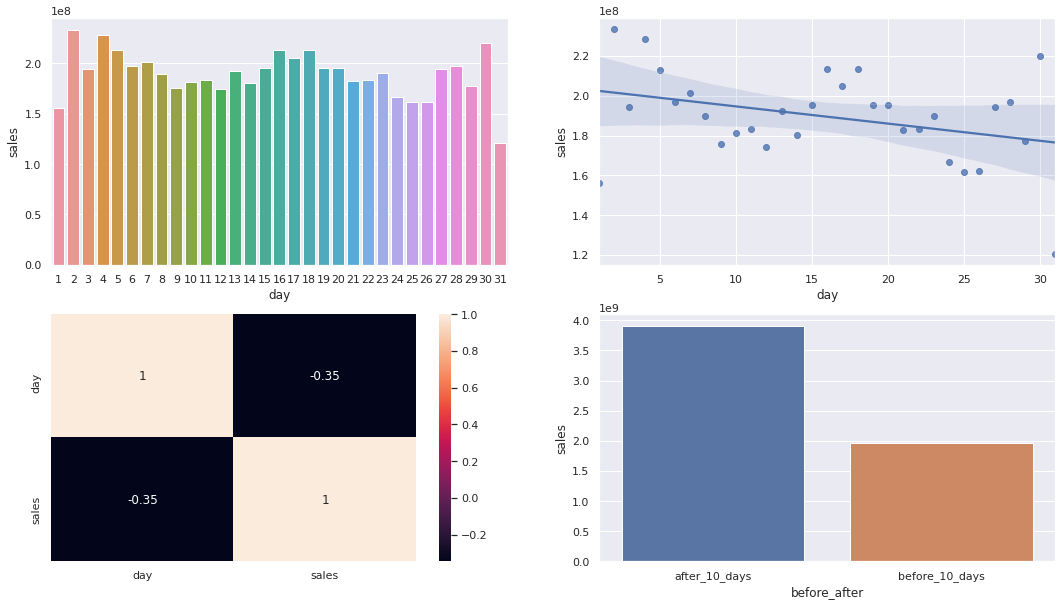

In [ ]:
aux1 = df4[['day','sales']].groupby('day').sum().reset_index()

plt.subplot(2,2,1)
sns.barplot(x= 'day', y = 'sales', data = aux1);

plt.subplot(2,2,2)
sns.regplot(x= 'day', y = 'sales', data = aux1);

plt.subplot(2,2,3)
sns.heatmap(aux1.corr(),annot=True);

plt.subplot(2,2,4)
aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_days' if x <= 10 else 'after_10_days'  )
aux2 = aux1[['before_after','sales']].groupby('before_after').sum().reset_index()
sns.barplot(x='before_after',y='sales',data=aux2)

Você vende menos antes dos 10 dias... porém, você tem desigualdade na quantidade de dias... antes dos 10 você tem 10 dias de venda... após você tem 20 em um mẽs

### **Hipótese 11** Lojas deveriam vender menos aos finais de semana.


<span style='color:green'>**TRUE**</span> vendem menos no fds


<span style = 'color:green'>**insights** => não deve ser um insight, pois as pessoas acompanham isso na empresa </span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão: Alta , corr_pearson: -0.76 </span>

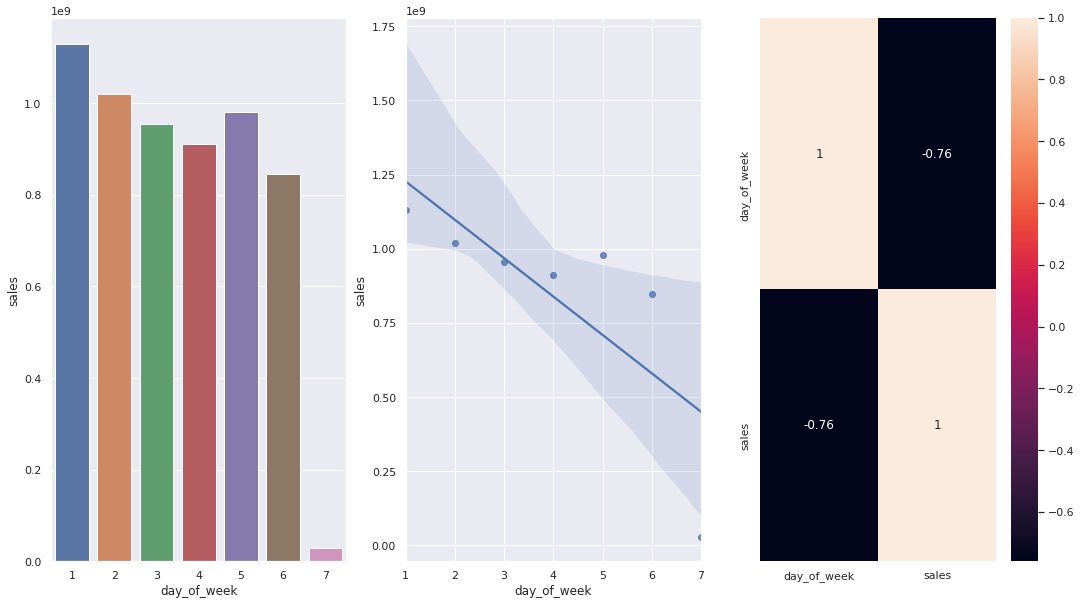

In [ ]:
aux1 = df4[['day_of_week','sales']].groupby('day_of_week').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x= 'day_of_week', y = 'sales', data = aux1);

plt.subplot(1,3,2)
sns.regplot(x= 'day_of_week', y = 'sales', data = aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(),annot=True);



Muitas empresas nem sabem disso, interessante observar que Segundas, terça e sexta são dias bem movimentados... já os finais de semana não

### **Hipótese 12** Lojas deveriam vender menos durante os feriados escolares.

Depende do mês, pode ocorrer uma inversão


<span style='color:green'>**TRUE**</span> vendem menos durante os feriados escolares, exceto nos meses de <span style='color:red'>julho e agosto


<span style = 'color:green'>**insights** => não deve ser um insight, pois as pessoas acompanham isso na empresa </span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão: Média pra forte (por causa dos meses 7 e 8 ter essa inversão de gastos nos feriados escolares com relação aos outros meses, isso provavelmente irá ser relevante para o modelo) , corr_pearson: -0.22 e -0.82 </span>

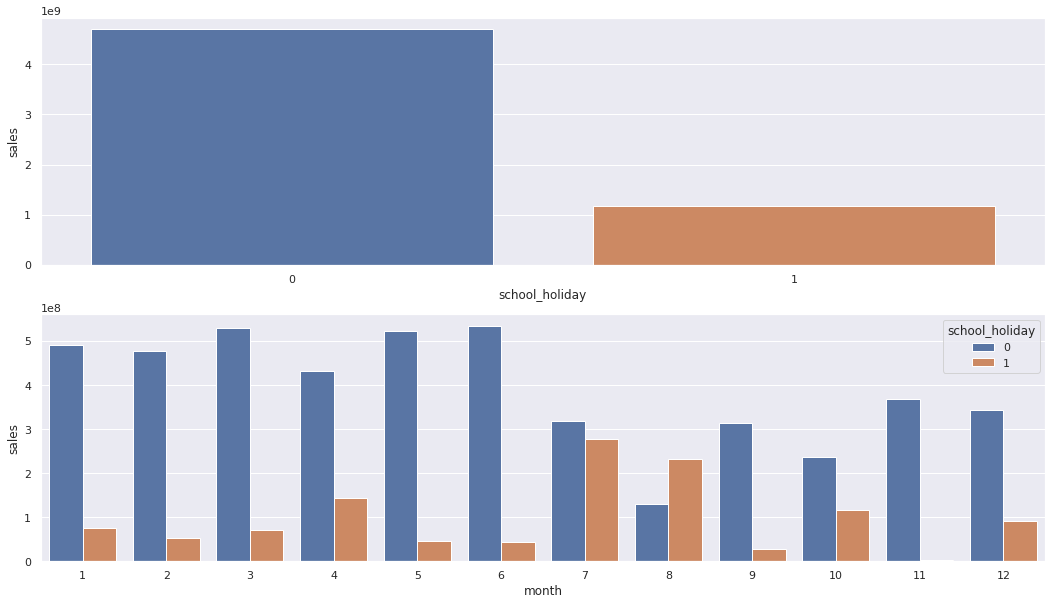

In [ ]:
plt.subplot(2,1,1)
aux1 = df4[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()
sns.barplot(x='school_holiday',y='sales',data=aux1)

plt.subplot(2,1,2)
aux2 = df4[['month','school_holiday','sales']].groupby(['month','school_holiday']).sum().reset_index()
sns.barplot(x='month',y='sales',hue='school_holiday',data=aux2);

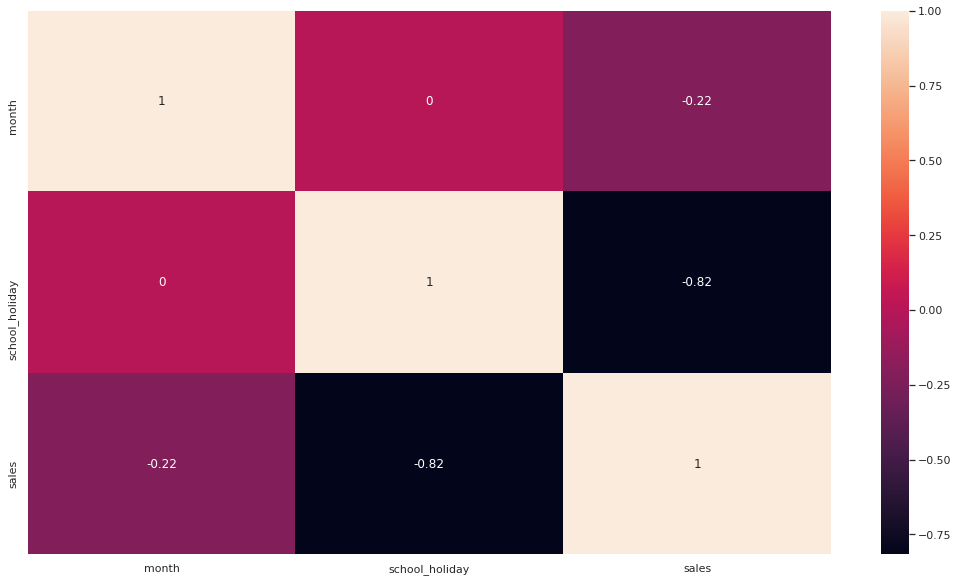

In [ ]:
sns.heatmap( aux2.corr(),annot=True)

## 4.3 Análise Multivariada

Analisa-se várias variáveis ao mesmo tempo com o resultado e também analisa-se as variáveis entre sí.

**funcionamento** - Os modelos de ML tem como uma das premissas a navalha de Occam, o qual **um modelo com menos complexidade deve alcançar um aprendizado mais generelizado**. Uma das maneiras de se diminuir a complexidade de um modelo é **diminuindo o número de informações não relevantes**. Uma dessas informações não relevantes são colunas que contém **características semelhantes**. Uma solução para auxiliar a remoção das variáveis com perfil mais parecido, seria o clustermap, o qual é uma boa forma de minimizar a complexidade do modelo. Lembrando, que o Clustermap, agrupa as linhas e colunas com mais informações similares, e apartir delas cria-se clusters... o qual esses cluster começam a ser comparado com outras colunas/linhas e forma novos clusters... até chegar no último cluster.

### 4.3.1 Numerical Attribute

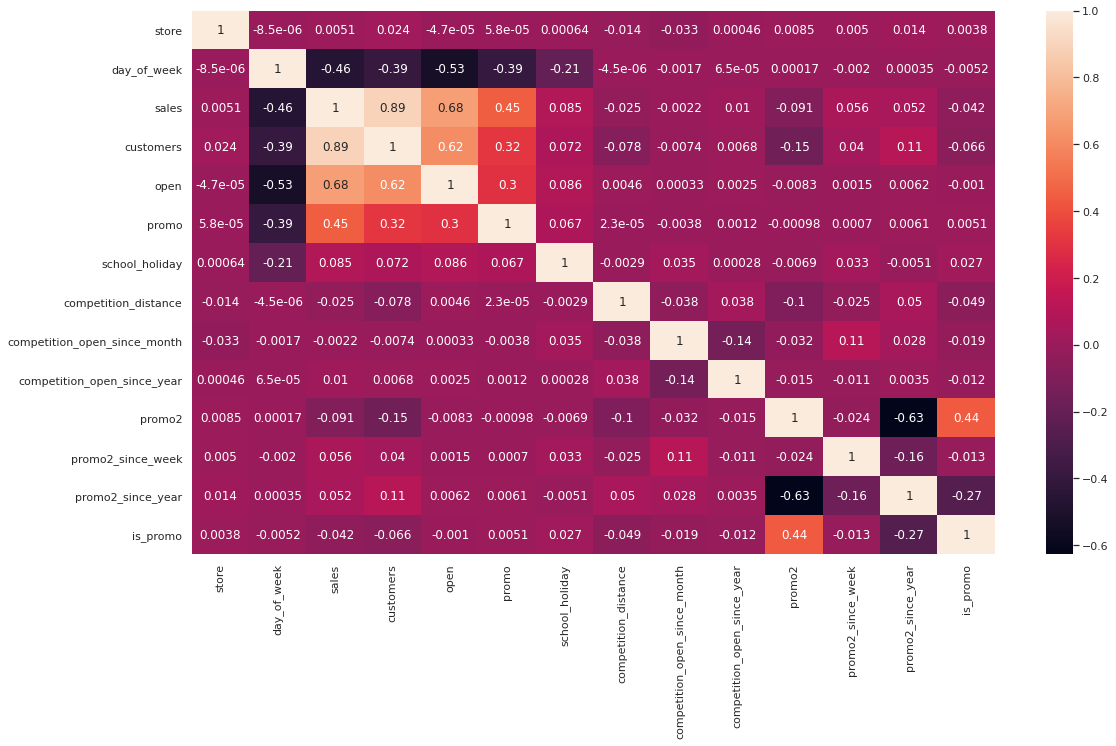

In [ ]:
correlation = num_attributes.corr()

sns.heatmap(correlation,annot=True)

Observe que a correlação de SALES e CUSTOMERS é muito alta 0.89, que indica uma alta correlação, e além disso é possitiva, que significa que quanto mais costumers na loja, mais vendas teremos. O único problema, é que não temos a quantidade de costumers nas próximas 6 semanas... então é uma variável descartada já... ( a não ser que você faça um machinea Learning para prever quantos Costumers teremos na loja nas próximas 6 semanas... e insira o valor dos customers neste projeto final)

### 4.3.2 Categorical Attribute

# <span style='color:blue'>Modelagem dos Dados

## Passo 5 - Preparar os Dados

## Passo 6 - Feature Selection

# <span style='color:blue'>Machine Leaning

## Passo 7 - Modelos de ML

## Passo 8 - Hyperparemeter Fine Tuning

# <span style='color:blue'>Avaliação do Modelo

## Passo 9 - Interpretação do Modelo

# <span style='color:green'>Deploy Model

## Passo 10 - Colocar modelo em produção

# 4.0 Passo 4 - Análise Exploratória de Dados (EDA - Exploration Data Analysis)

**objetivo da EDA**

- Ganhar experiência de Negócio
- Validar Hipóteses de Negócio (**insights** novos)
- Selecionar Variáveis importantes para o Modelo (fazer uma seleção preliminar para comparar com a análise futura usando algorítimos de escolha de variáveis)

**Insights** é tudo que você choca a crença de alguém, por exemplo, a pessoa acredita em uma hipótese, e você através dos dados mostra totalmente o inverso... isso é um Insight... Vale ressaltar que você não gera um Insight quando as pessoas já sabem de algo ( exemplo: lojas antigas vendem menos ao longo do ano... as pessoas que trabalham na empresa já sabem disso, logo, mesmo você comprovando isso com dados, você não gerou um insight)

In [22]:
df4 = df3.copy()

In [ ]:
df4.head(3)

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226


## 4.1 Análise Univariada

Analisa-se apenas uma variável (agente)

### 4.1.1 Response Variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


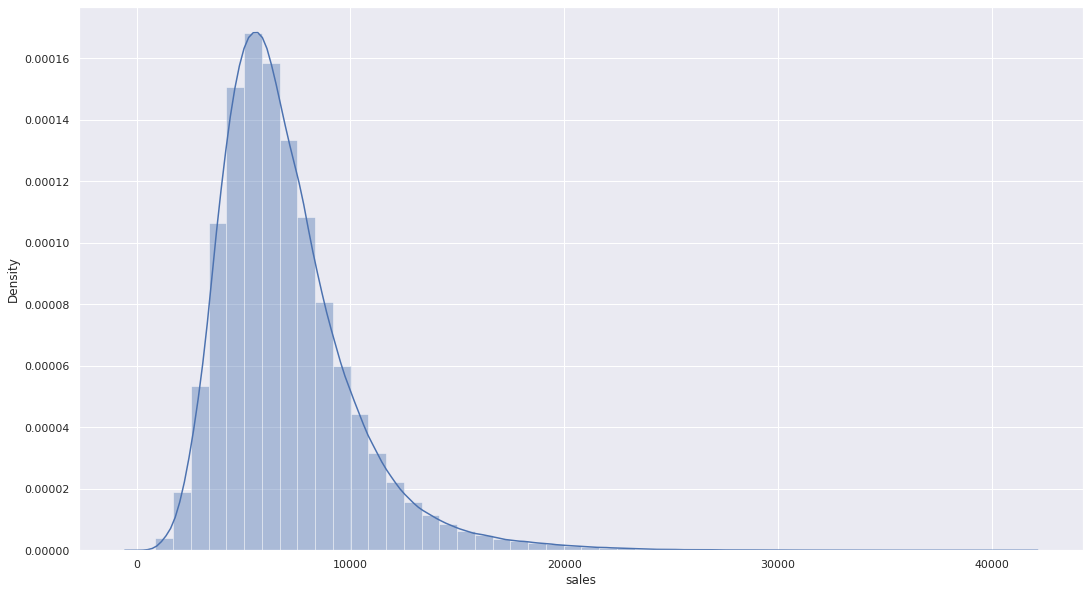

In [ ]:
sns.distplot(df4['sales']) # Sales = RESPOSTA = FENÔMENO = Objetivo que queremos modelar

Veja que a distribuição acima está bem próxima de uma distribuição normal (gaussiana). Por que se importar com isso? Porque os algoritimos de ML eles são criados em algumas premissas... por exemplo, que os dados sejam INDEPENDENTES e normalmente distribuidos (gauss). Quanto mais próximo de uma normal for sua RESPOSTA/SAÍDA/FENÔMENO, melhor seu modelo irá performar. Para isso você pode fazer algumas transformações

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


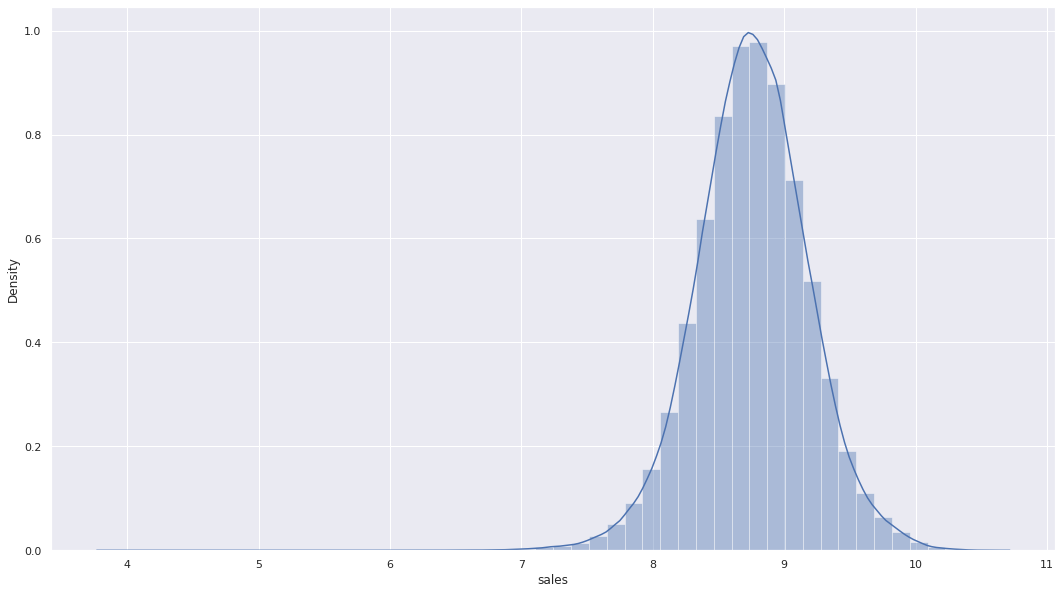

In [ ]:
# np.log1p - multiplica todos os valores de vendas por um log
sns.distplot(np.log1p(df4['sales']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


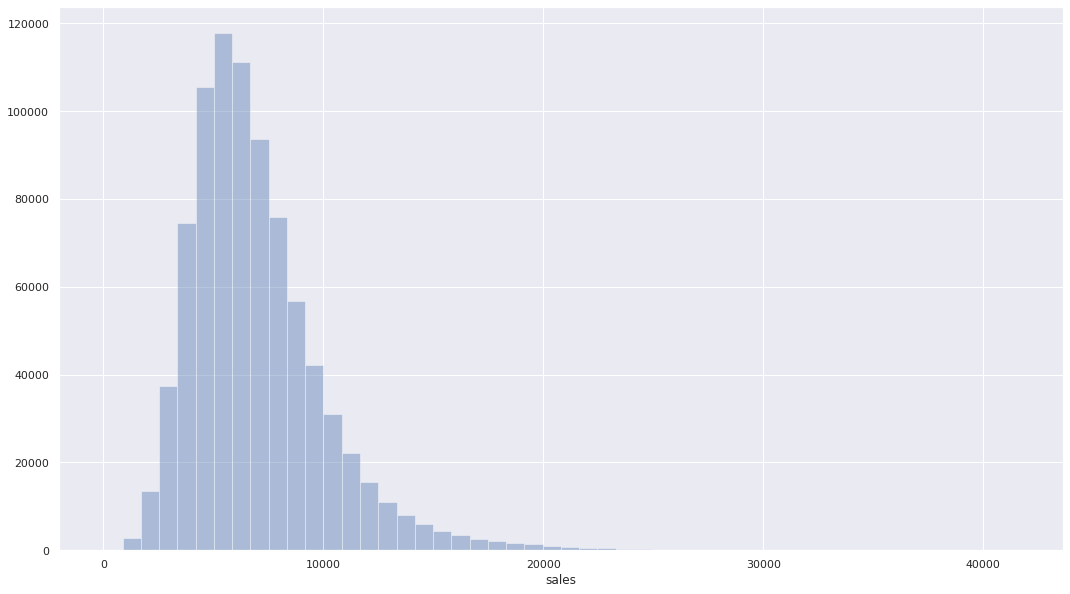

In [ ]:
sns.distplot( df4['sales'], kde = False ) # Sales = RESPOSTA = FENÔMENO = Objetivo que queremos modelar

# Aqui conseguimos ver os eixos y com os números reais

### 4.1.2 Numerical Variable

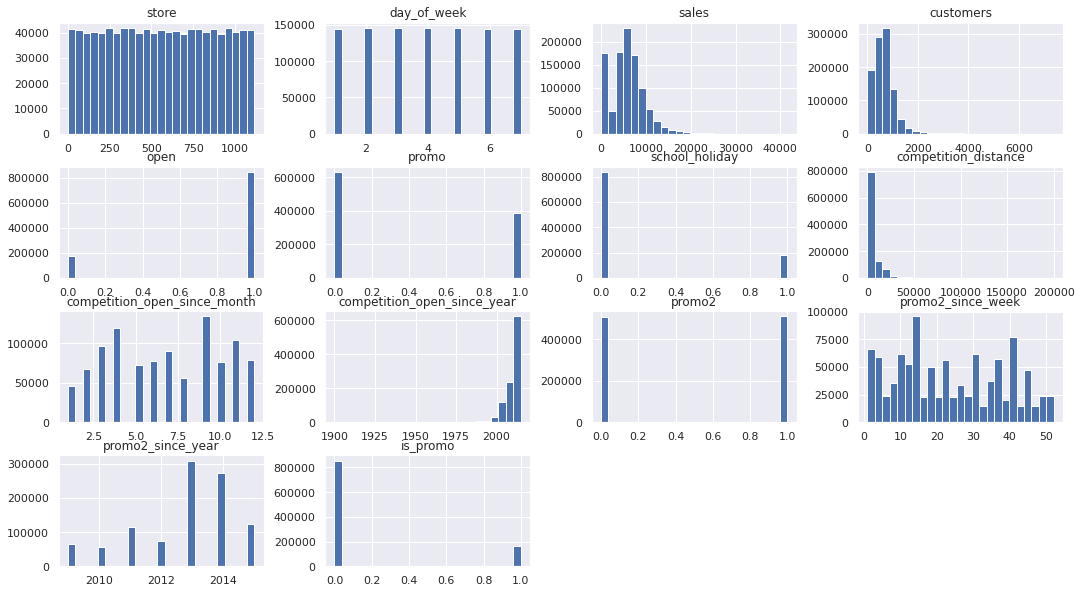

In [ ]:
num_attributes.hist(bins = 25); #  bins = São as divisões de intervalos

### 4.1.3 Categorical Variable

In [23]:
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

In [24]:
df4['state_holiday'].unique()

array(['regular_day', 'public_holiday', 'easter_holiday', 'christmas'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


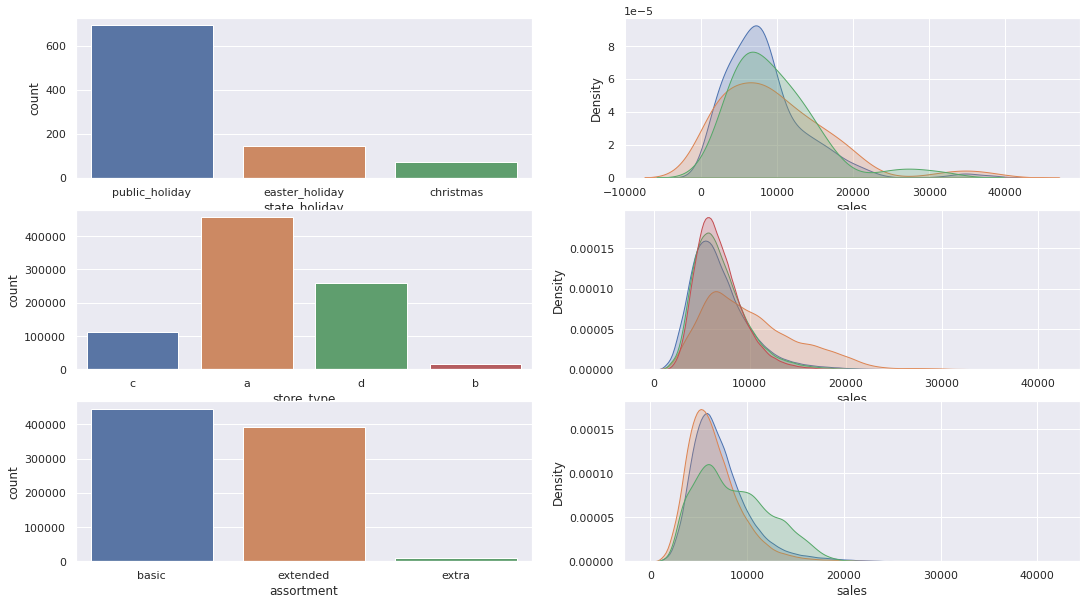

In [ ]:
# Vamos plotar CONTAGEM x DISTRIBUIÇÃO


# State_Holiday
plt.subplot( 3, 2 ,1 ) # linha,coluna,pos

a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot( a['state_holiday'] )

plt.subplot( 3 , 2, 2)

sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday' , shade = True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label = 'easter_holiday' , shade = True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], label = 'christmas' , shade = True )

# Store_type
plt.subplot( 3, 2 ,3 ) # linha,coluna,pos

sns.countplot( df4['store_type'] )

plt.subplot( 3, 2 ,4 ) # linha,coluna,pos

sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label = 'a' , shade = True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label = 'b' , shade = True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label = 'c' , shade = True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label = 'd' , shade = True )

# Assortment
plt.subplot( 3, 2 ,5 ) # linha,coluna,pos

sns.countplot( df4['assortment'] )

plt.subplot( 3, 2 ,6 ) # linha,coluna,pos

sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label = 'extended' , shade = True )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label = 'basic' , shade = True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label = 'extra' , shade = True )



## 4.2 Análise Bivariada

Analisa-se apenas uma variável (agente) com o resultado (fenômeno... nosso objetivo)

### **Hipótese 1** Lojas com sortimento maior, deveriam vender mais

<span style='color:red'>**FALSA**</span> vendem menos...

<span style = 'color:green'>**insights** => Lojas com sortimento maior, vendem menos</span>

<span style = 'color:blue'>**Relevância para o modelo** => minha visão: fraca, corr_pearson: não dá para aplicar em string </span>

In [ ]:
aux1 = df4[['assortment','sales']].groupby('assortment').sum().reset_index()
aux1

,assortment,sales
0,basic,2945750070
1,extended,2856484241
2,extra,70946312


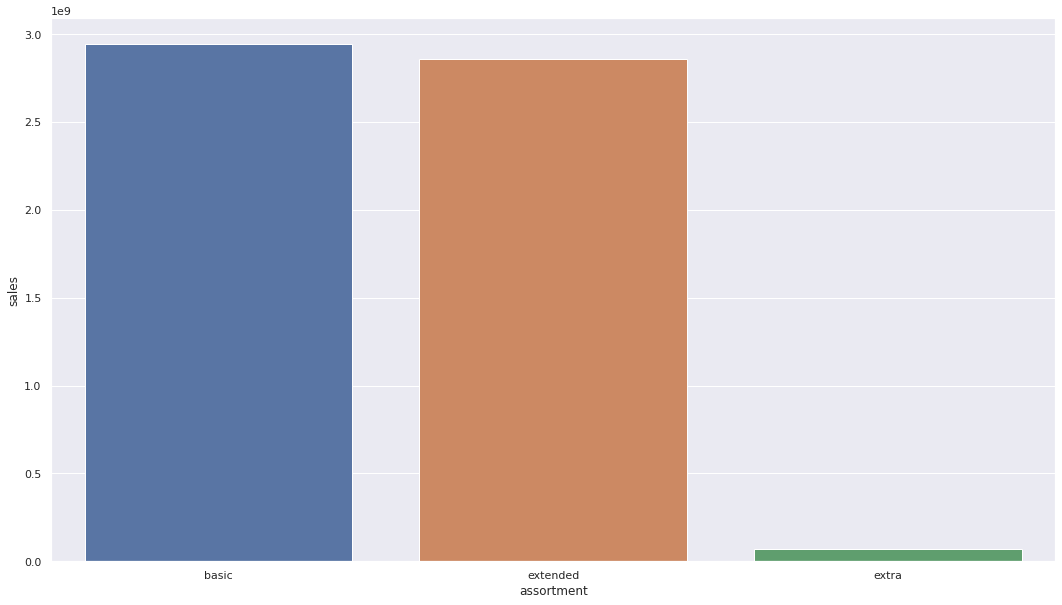

In [ ]:
sns.barplot( x = 'assortment', y = 'sales', data = aux1)

In [ ]:
aux2 = df4[['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
aux2.head()

,year_week,assortment,sales
0,2013-00,basic,13434262
1,2013-00,extended,12425669
2,2013-00,extra,269404
3,2013-01,basic,26007250
4,2013-01,extended,22917693


In [ ]:
aux3 = aux2.pivot(index = 'year_week', columns ='assortment' , values ='sales' )
aux3.head()

assortment,basic,extended,extra
year_week,,,
2013-00,13434262,12425669,269404
2013-01,26007250,22917693,350279
2013-02,17970974,16029584,377207
2013-03,24392076,21243431,404662
2013-04,19972891,18130077,363061


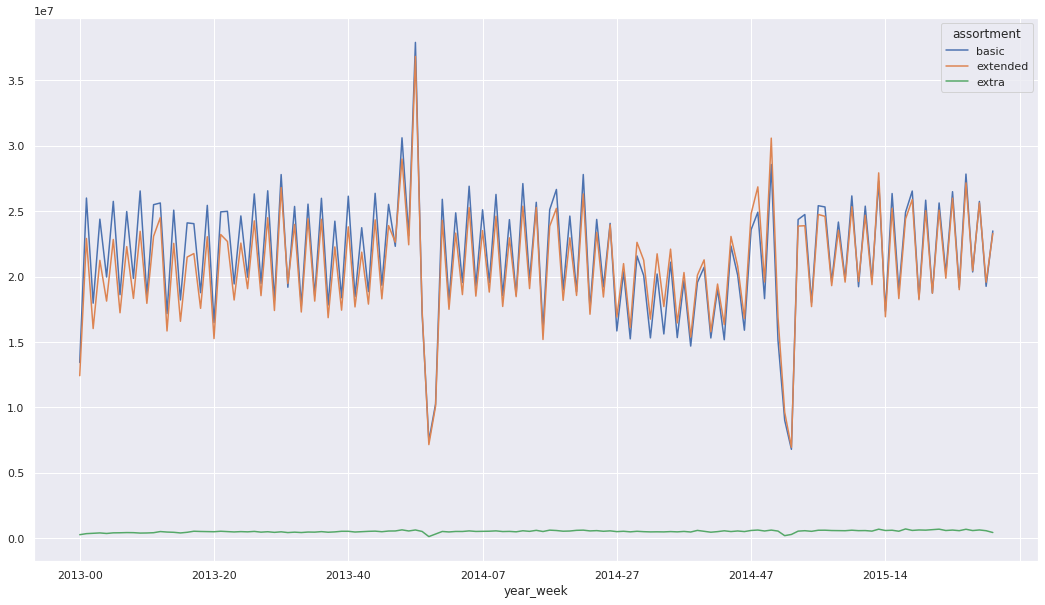

In [ ]:
aux3.plot()

Essa será uma variável importante para o modelo, pois o Extra tem um volume e comportamento muito diferentes do extended e basic.

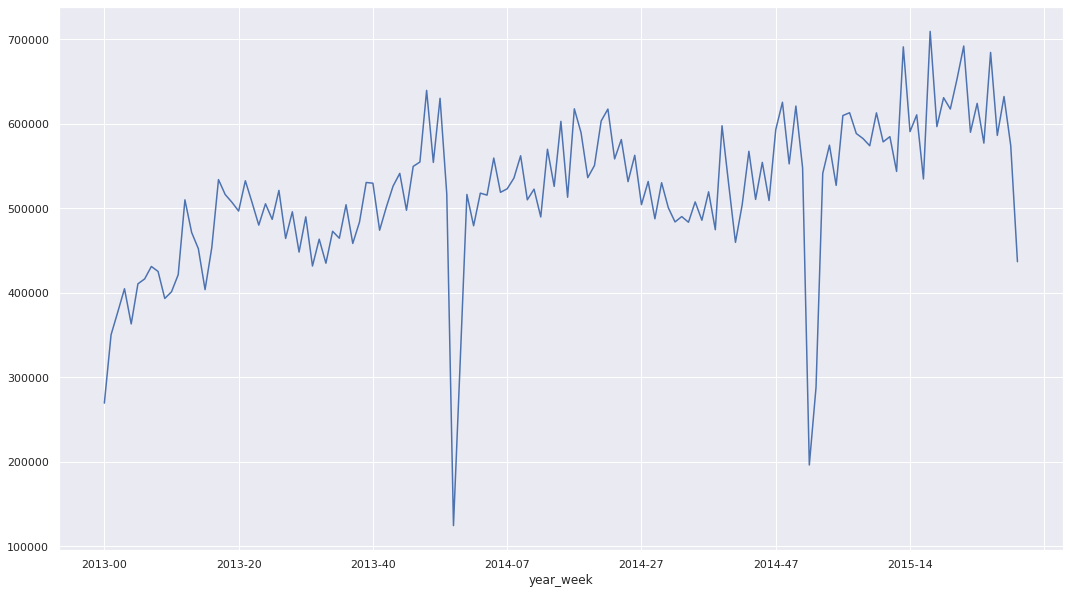

In [ ]:
aux3['extra'].plot()

In [ ]:
aux1

,assortment,sales
0,basic,2945750070
1,extended,2856484241
2,extra,70946312


In [ ]:

# Não dá para fazer o CORR, pois o assortment é STRING
#sns.heatmap( df4[['sales','assortment']].corr(method= 'pearson'), annot = True)

### **Hipótese 2** Lojas com competidores mais próximos deveriam vender menos

<span style='color:red'>**FALSA**</span> vendem mais...


<span style = 'color:green'>**insights** => Competidores próximos, vendem mais</span>

<span style = 'color:blue'>**Relevância para o modelo** => minha visão: média, corr_pearson: -0.2 </span>

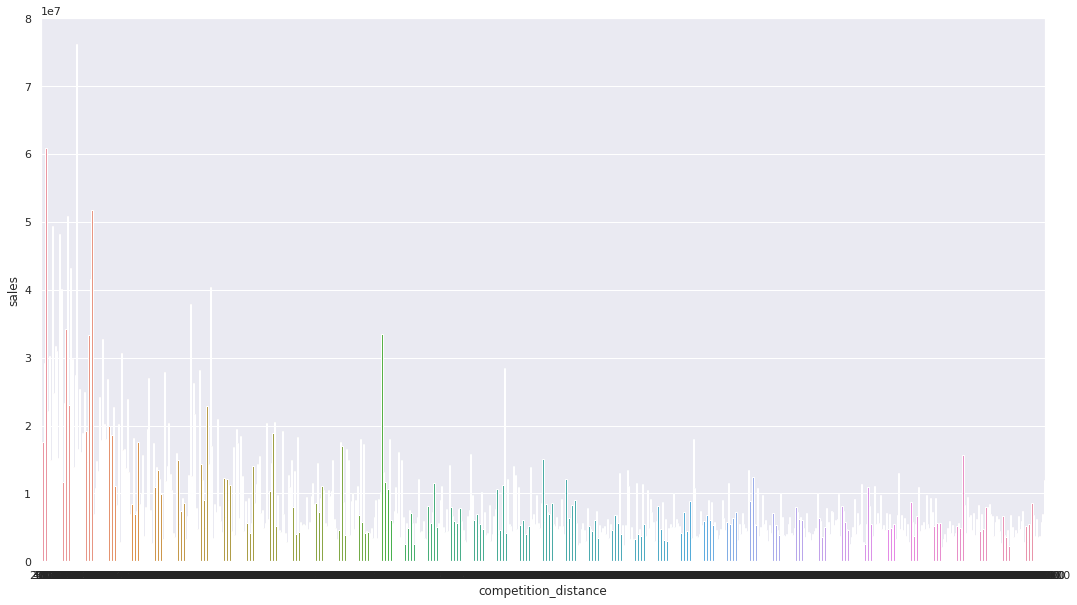

In [ ]:
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()
# Ficou ruim de enxergar, preciso melhorar os bins
sns.barplot( x = 'competition_distance', y = 'sales', data=aux1)

In [ ]:
# Como o gráfico ficou ruim para enxergar Vamos lá fazer algumas modificações

# criar os intervalos (bins)
bins = list(np.arange(0,20000,1000))
# preciso saber em qual grupo ele encaixa
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins = bins)
aux1.head()

,competition_distance,sales,competition_distance_binned
0,20.0,4579807,"(0, 1000]"
1,30.0,17552666,"(0, 1000]"
2,40.0,29261626,"(0, 1000]"
3,50.0,60835848,"(0, 1000]"
4,60.0,22088359,"(0, 1000]"


In [ ]:
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
aux2.head()

,competition_distance_binned,sales
0,"(0, 1000]",1832415839
1,"(1000, 2000]",918682669
2,"(2000, 3000]",610405362
3,"(3000, 4000]",378745560
4,"(4000, 5000]",325665741


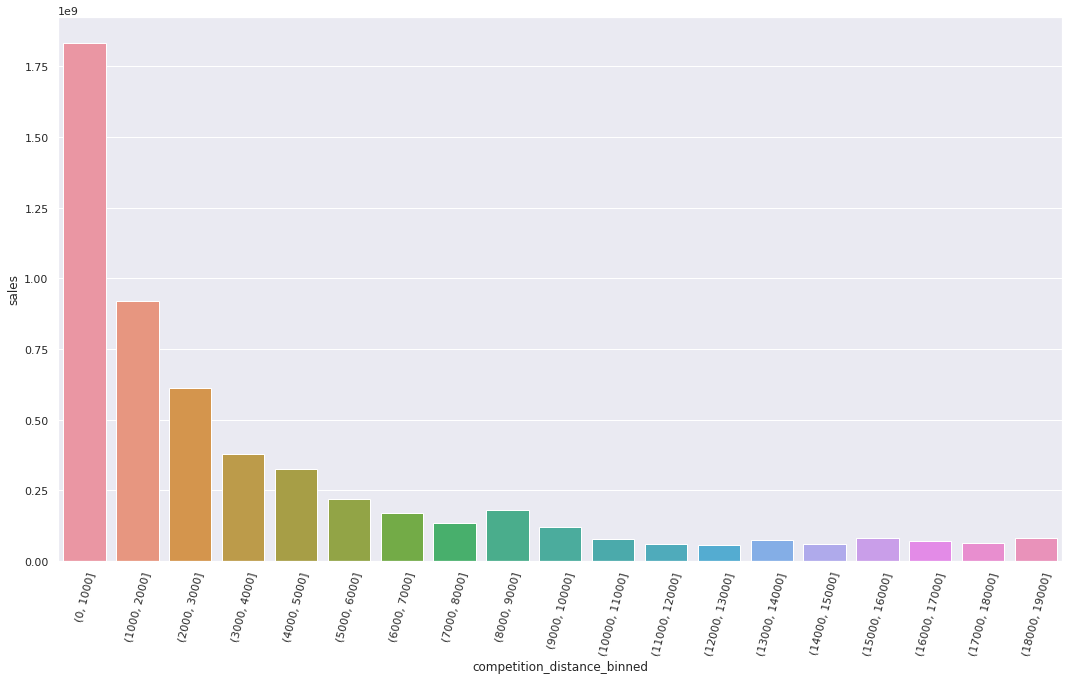

In [ ]:
grafic = sns.barplot(x='competition_distance_binned', y = 'sales', data = aux2)
plt.xticks(rotation=75);
# COMPETIDORES PRÓXIMOS PERTO VENDEM MAIS para essa empresa

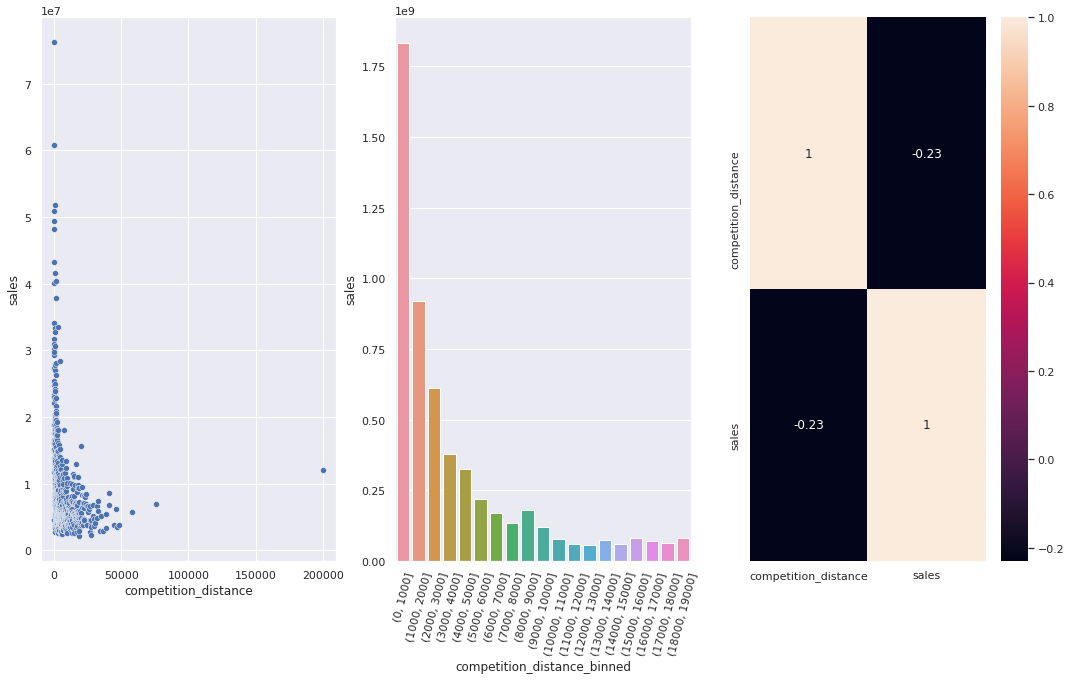

In [ ]:
plt.subplot(1,3,1)
sns.scatterplot(x='competition_distance',y='sales',data=aux1)

plt.subplot(1,3,2)
grafic = sns.barplot(x='competition_distance_binned', y = 'sales', data = aux2)
plt.xticks(rotation=75)

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method = 'pearson'), annot = True );

Veja o gráfico de correlação acima, Sales x Competition_Distance = -0.23... O negativo significa que temos uma razão inversamente proporcional, ou seja, quanto mais distante o concorrente está, menor a venda.

Além disso, iremos utilizar a variável Competition_distance, pois ela tem -0.23 de correlação com SALES

<span style='color:blue'>**corr(method='pearson')** -> vai de -1 até 1... Ele analisa a correlação entre as variáveis da seguinte maneira, se for negativo, significa que são inversamente proporcionais, se for positivo significa que são diretamente proporcionais... se for zero, é por que não apresentam correlação, de modo geral quando mais próximo de zero menos correlação apresentam as variáveis.

### **Hipótese 3** Lojas com competidores à mais tempo deveriam vender mais 

<span style='color:red'>**FALSA**</span> vendem menos...


<span style = 'color:green'>**insights** => Competidores mais tempo, vendem menos</span>

<span style = 'color:blue'>**Relevância para o modelo** => minha visão: fraca, corr_pearson: -0.1 </span>

In [ ]:
aux1 = df4[['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
aux1.tail()

,competition_time_month,sales
371,1403,153074
372,1404,155301
373,1405,154513
374,1406,158205
375,1407,38882


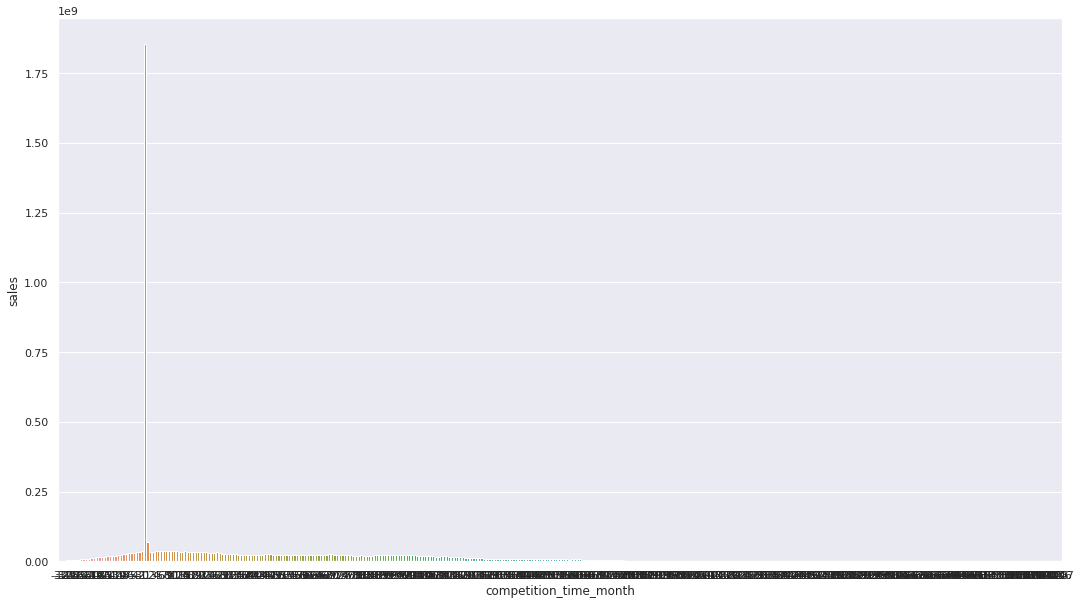

In [ ]:
sns.barplot(x=aux1['competition_time_month'], y = aux1['sales'])
# ruim de enxergar...

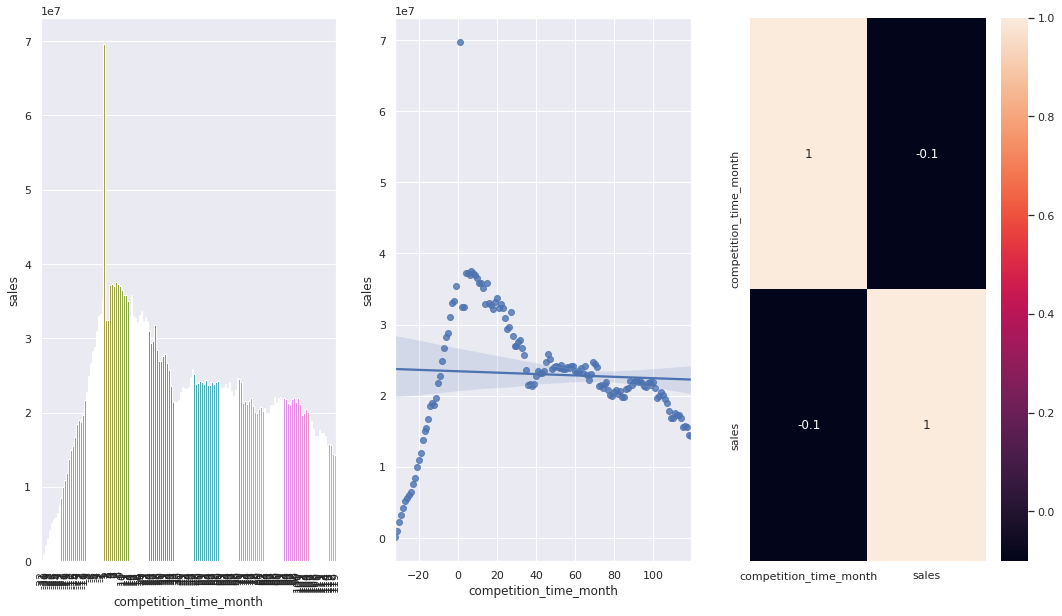

In [ ]:
plt.subplot(1,3,1)
# vamos fazer um filtro para visualizar melhor
aux2 = aux1[ (aux1['competition_time_month'] <120) & (aux1['competition_time_month'] != 0) ]
sns.barplot(x=aux2['competition_time_month'], y = aux2['sales'])
plt.xticks(rotation=90);

plt.subplot(1,3,2)
sns.regplot(x = 'competition_time_month', y = 'sales', data = aux2)

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot = True)

Apresenta uma correlação muito baixa, -0.1, talvez nem seja relevante para o modelo de Sales (vamos deixar ver a opinião do algorítimo depois)

### **Hipótese 4** Lojas com promoções ativas por mais temo deveriam vender mais. 

<span style='color:red'>**FALSA**</span> vendem menos após um certo período de tempo


<span style = 'color:green'>**insights** => Vendem menos, provavelmente deve ser um insight </span>

<span style = 'color:blue'>**Relevância para o modelo** => minha visão: fraca, corr_pearson: -0.029 </span>

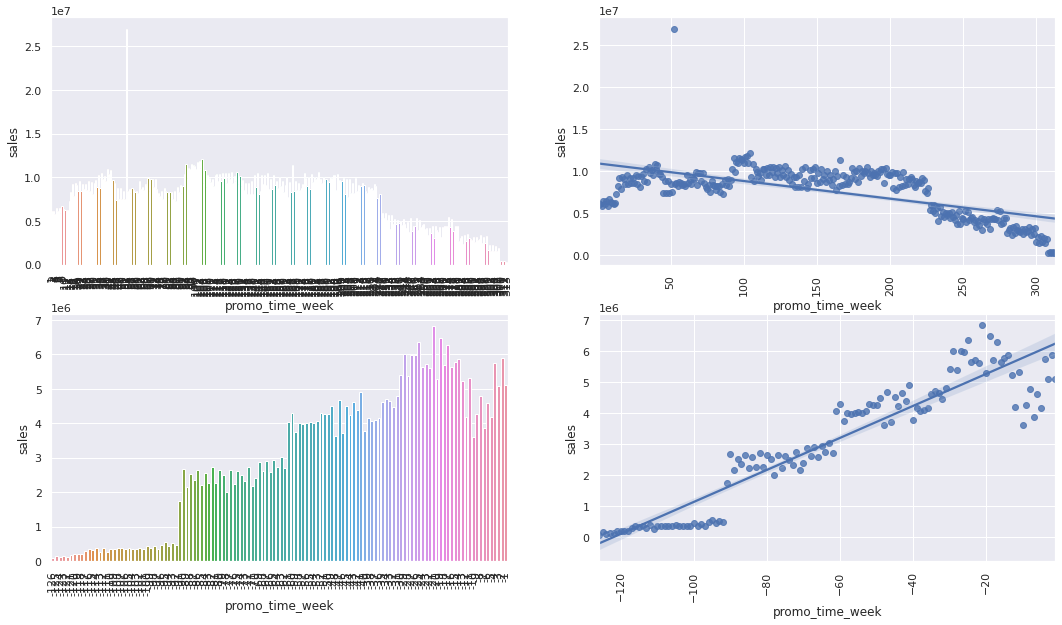

In [ ]:
aux1 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()
#sns.barplot(x = 'promo_time_week', y = 'sales', data = aux1) # MUITOS DADOS... fazer filtro

aux2 = aux1[aux1['promo_time_week'] > 0 ] # promo extendida
aux3 = aux1[aux1['promo_time_week'] < 0 ] # promo normal

plt.subplot(2,2,1)
sns.barplot(x = 'promo_time_week', y = 'sales', data = aux2)
plt.xticks(rotation=90);

plt.subplot(2,2,2)
sns.regplot(x = 'promo_time_week', y = 'sales', data = aux2)
plt.xticks(rotation=90);

plt.subplot(2,2,3)
sns.barplot(x = 'promo_time_week', y = 'sales', data = aux3)
plt.xticks(rotation=90);

plt.subplot(2,2,4)
sns.regplot(x = 'promo_time_week', y = 'sales', data = aux3)
plt.xticks(rotation=90);

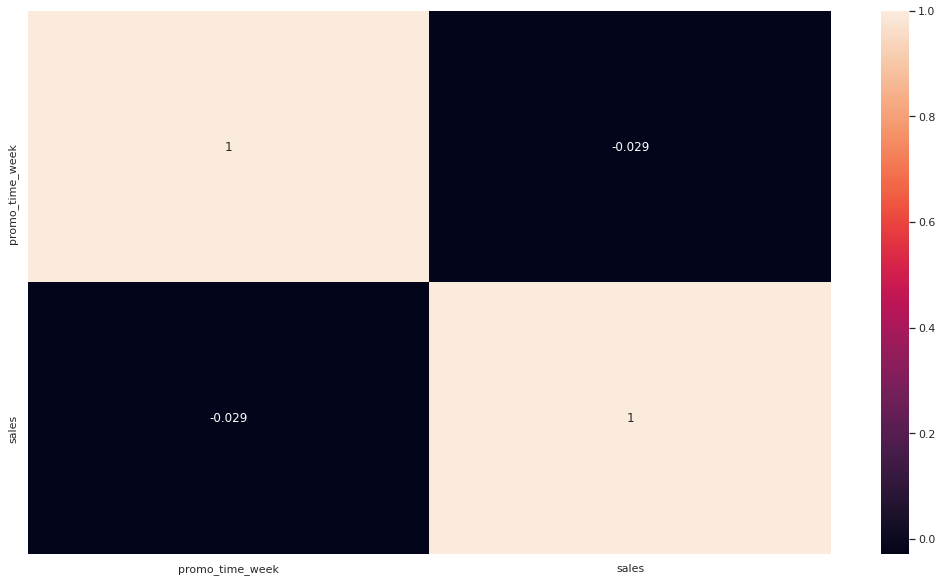

In [ ]:
sns.heatmap(aux1.corr(),annot = True)

Correlação muito baixa, de -0.029, talvez nem entre no modelo

### ~**Hipótese 5** Lojas com mais dias de promoção deveriam vender mais.~

### **Hipótese 6** Lojas com mais promoções consecutivas deveriam vender mais.

<span style='color:red'>**FALSA**</span> Lojas com mais promoções consecutivas vendem menos


<span style = 'color:green'>**insights** => Provavelmente será um insight</span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão: fraca, corr_pearson: nda </span>

In [ ]:
aux1 = df4[['promo','promo2','sales']].groupby(['promo','promo2']).sum().reset_index()
aux1.head()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


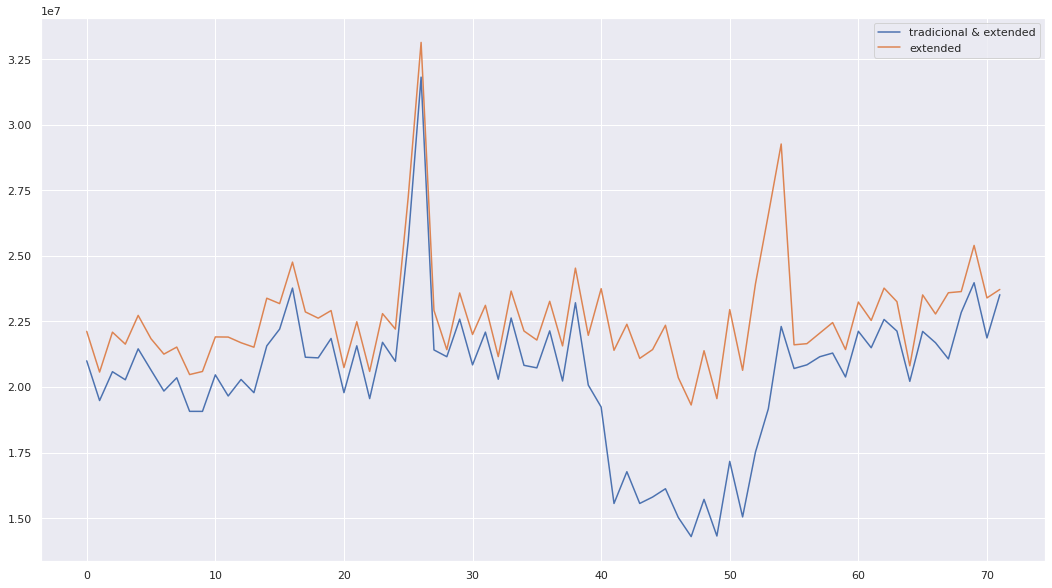

In [ ]:
aux1 = df4[ ( df4['promo'] == 1 ) & ( df4['promo2'] == 1 )][['year_week','sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4[ ( df4['promo'] == 1 ) & ( df4['promo2'] == 0 )][['year_week','sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax=ax)

ax.legend( labels = ['tradicional & extended','extended'] )

Exceto pelo intervalo de 40 a 55, não houve uma variação significativa, logo não deve contribuir tanto para o aprendizado do modelo.

Pois os modelos de ML aprendem de acordo com a variabilidade dos dados... se os dados carregam sempre comportamentos próximos, eles acabam por não evoluir mais... Por isso essa variável será de pouca importância para o modelo, pois só tem um trecho com informação relevante

### **Hipótese 7** Lojas abertas no feriado de natal deveriam vender mais

<span style='color:red'>**FALSA**</span> No natal vende menos


<span style = 'color:green'>**insights** => NÃO DEVERÁ SER... POIS PROVAVELMENTE AS EMPRESAS JÁ SABEM DISSO </span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão:.... , corr_pearson: n dá para fazer com strings </span>

In [ ]:
df4['state_holiday'].unique()

array(['regular_day', 'public_holiday', 'easter_holiday', 'christmas'],
      dtype=object)

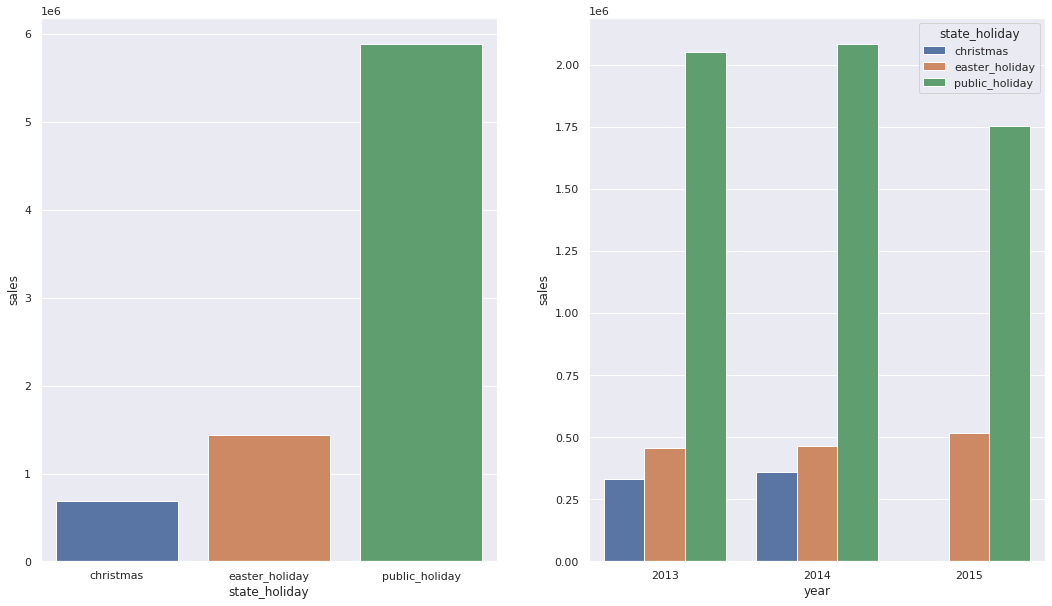

In [ ]:
plt.subplot(1,2,1)
aux = df4[df4['state_holiday']!='regular_day']
aux1 = aux[['state_holiday','sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x = 'state_holiday', y = 'sales', data = aux1);


plt.subplot(1,2,2)
aux2 = aux[['year','state_holiday','sales']].groupby(['year','state_holiday']).sum().reset_index()
sns.barplot(x='year', y='sales', hue = 'state_holiday',data=aux2);

### **Hipótese 8** Lojas deveriam vender mais ao longo dos anos

<span style='color:red'>**FALSA**</span> vende menos


<span style = 'color:green'>**insights** => NÃO DEVERÁ SER... POIS PROVAVELMENTE AS EMPRESAS JÁ SABEM DISSO </span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão: Forte , corr_pearson: -0.92 </span>

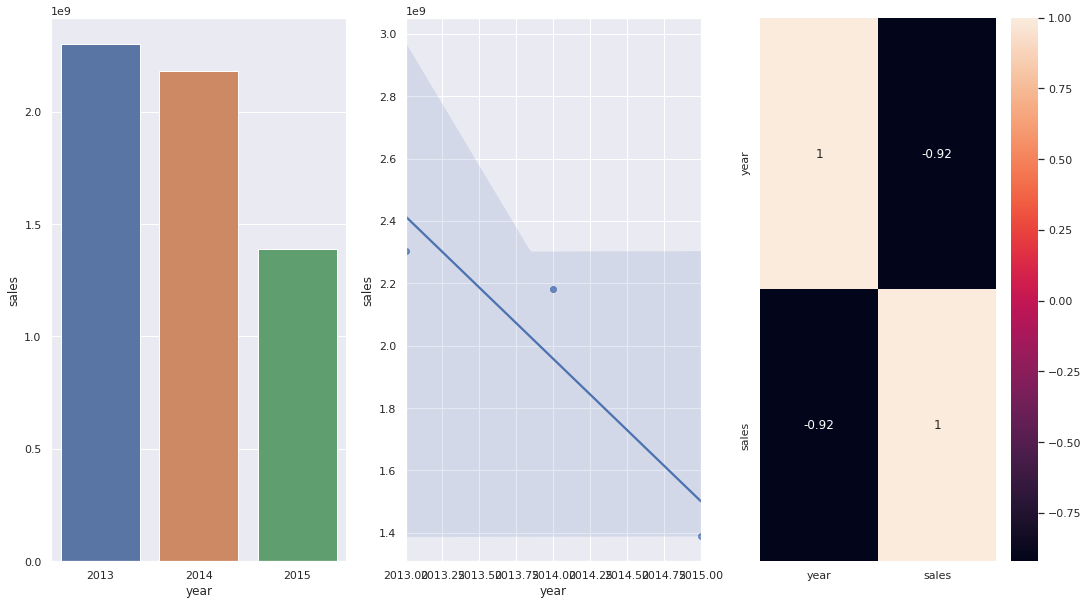

In [ ]:
aux1 = df4[['year','sales']].groupby('year').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x= 'year', y = 'sales', data = aux1);
plt.subplot(1,3,2)
sns.regplot(x= 'year', y = 'sales', data = aux1);
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(),annot=True);

Correlação Year x Sales = -0.92... uma correlação muito forte, indica que conforme os anos aumentam, as vendas vão caindo (por isso o negativo... indica uma decreção)

### **Hipótese 9** Lojas deveriam vender mais no segundo semetre do ano

<span style='color:red'>**FALSA**</span> vendem menos


<span style = 'color:green'>**insights** => Não gera um insight, pois depende muito do negócio da empresa... por exemplo, farmácias vendem menos no segundo semestre </span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão: Forte , corr_pearson: -0.75 </span>

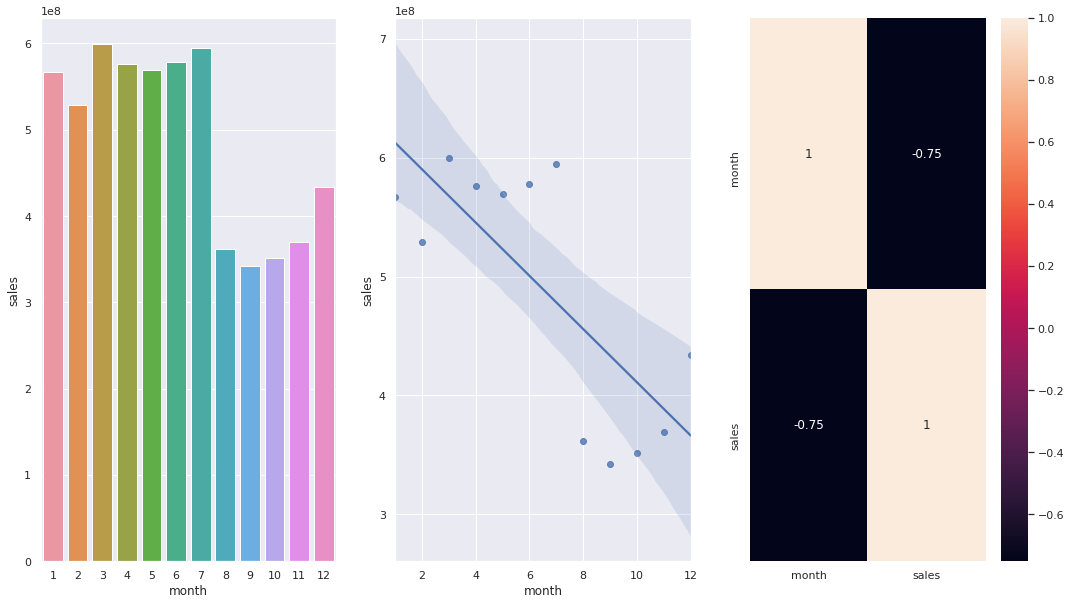

In [ ]:
aux1 = df4[['month','sales']].groupby('month').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x= 'month', y = 'sales', data = aux1);
plt.subplot(1,3,2)
sns.regplot(x= 'month', y = 'sales', data = aux1);
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(),annot=True);

As Lojas da Rossman vendem menos após o segundo semestre!!! 

### **Hipótese 10** Lojas deveriam vender mais depois do dia 10 de cada mês

<span style='color:green'>**TRUE**</span> vendem mais após dia 10


<span style = 'color:green'>**insights** => não deve ser um insight, pois as pessoas acompanham isso na empresa </span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão: Média , corr_pearson: -0.35 </span>

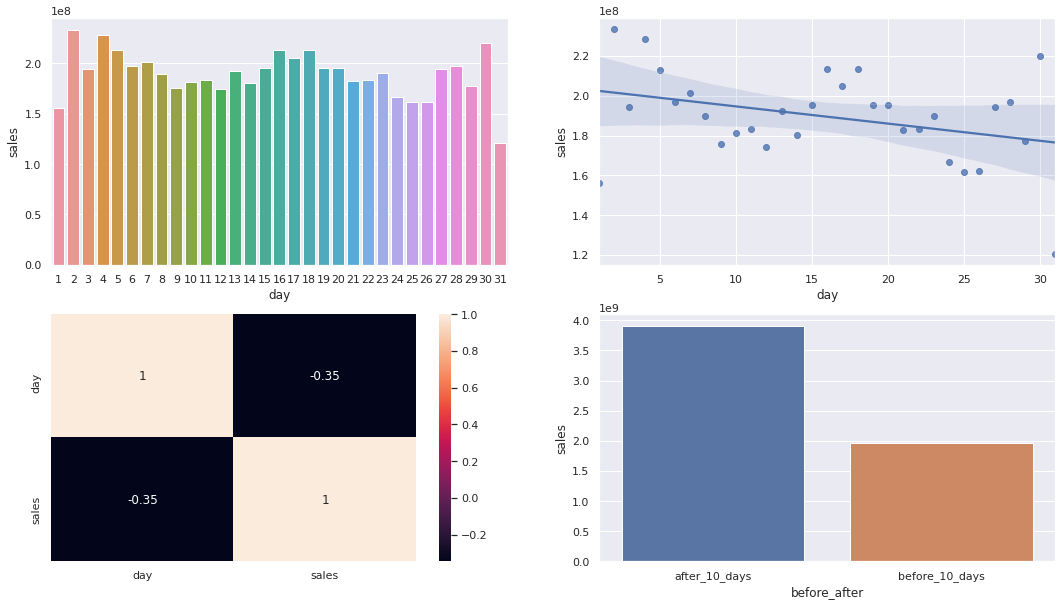

In [ ]:
aux1 = df4[['day','sales']].groupby('day').sum().reset_index()

plt.subplot(2,2,1)
sns.barplot(x= 'day', y = 'sales', data = aux1);

plt.subplot(2,2,2)
sns.regplot(x= 'day', y = 'sales', data = aux1);

plt.subplot(2,2,3)
sns.heatmap(aux1.corr(),annot=True);

plt.subplot(2,2,4)
aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_days' if x <= 10 else 'after_10_days'  )
aux2 = aux1[['before_after','sales']].groupby('before_after').sum().reset_index()
sns.barplot(x='before_after',y='sales',data=aux2)

Você vende menos antes dos 10 dias... porém, você tem desigualdade na quantidade de dias... antes dos 10 você tem 10 dias de venda... após você tem 20 em um mẽs

### **Hipótese 11** Lojas deveriam vender menos aos finais de semana.


<span style='color:green'>**TRUE**</span> vendem menos no fds


<span style = 'color:green'>**insights** => não deve ser um insight, pois as pessoas acompanham isso na empresa </span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão: Alta , corr_pearson: -0.76 </span>

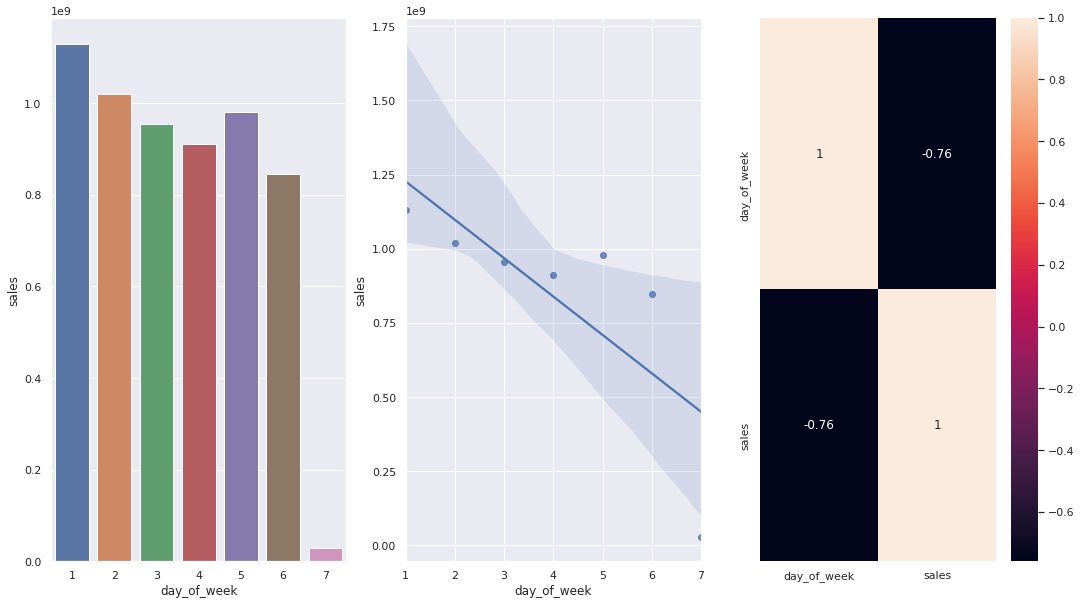

In [ ]:
aux1 = df4[['day_of_week','sales']].groupby('day_of_week').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x= 'day_of_week', y = 'sales', data = aux1);

plt.subplot(1,3,2)
sns.regplot(x= 'day_of_week', y = 'sales', data = aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(),annot=True);



Muitas empresas nem sabem disso, interessante observar que Segundas, terça e sexta são dias bem movimentados... já os finais de semana não

### **Hipótese 12** Lojas deveriam vender menos durante os feriados escolares.

Depende do mês, pode ocorrer uma inversão


<span style='color:green'>**TRUE**</span> vendem menos durante os feriados escolares, exceto nos meses de <span style='color:red'>julho e agosto


<span style = 'color:green'>**insights** => não deve ser um insight, pois as pessoas acompanham isso na empresa </span>


<span style = 'color:blue'>**Relevância para o modelo** => minha visão: Média pra forte (por causa dos meses 7 e 8 ter essa inversão de gastos nos feriados escolares com relação aos outros meses, isso provavelmente irá ser relevante para o modelo) , corr_pearson: -0.22 e -0.82 </span>

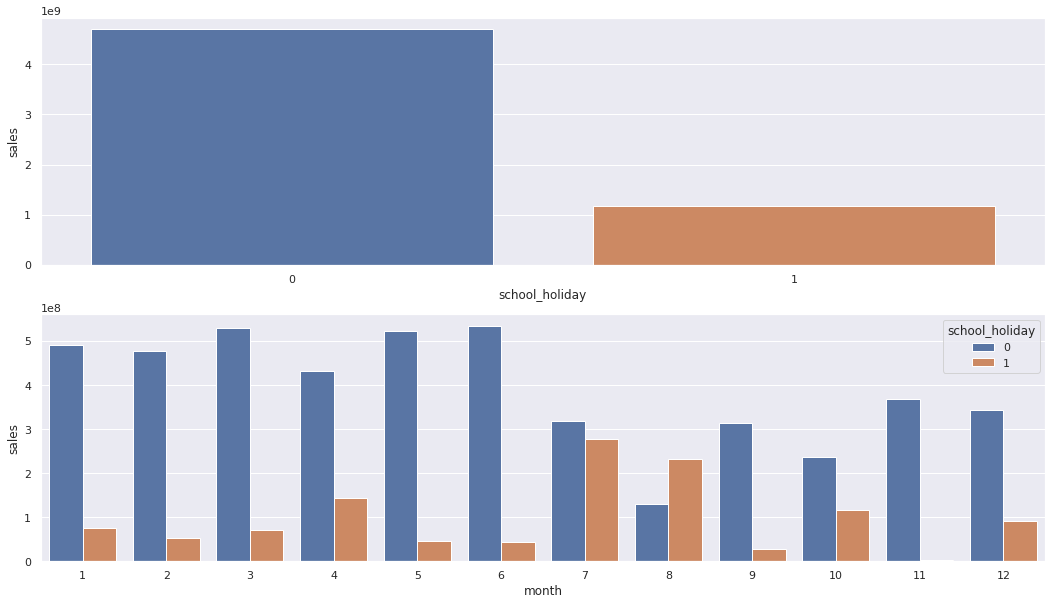

In [ ]:
plt.subplot(2,1,1)
aux1 = df4[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()
sns.barplot(x='school_holiday',y='sales',data=aux1)

plt.subplot(2,1,2)
aux2 = df4[['month','school_holiday','sales']].groupby(['month','school_holiday']).sum().reset_index()
sns.barplot(x='month',y='sales',hue='school_holiday',data=aux2);

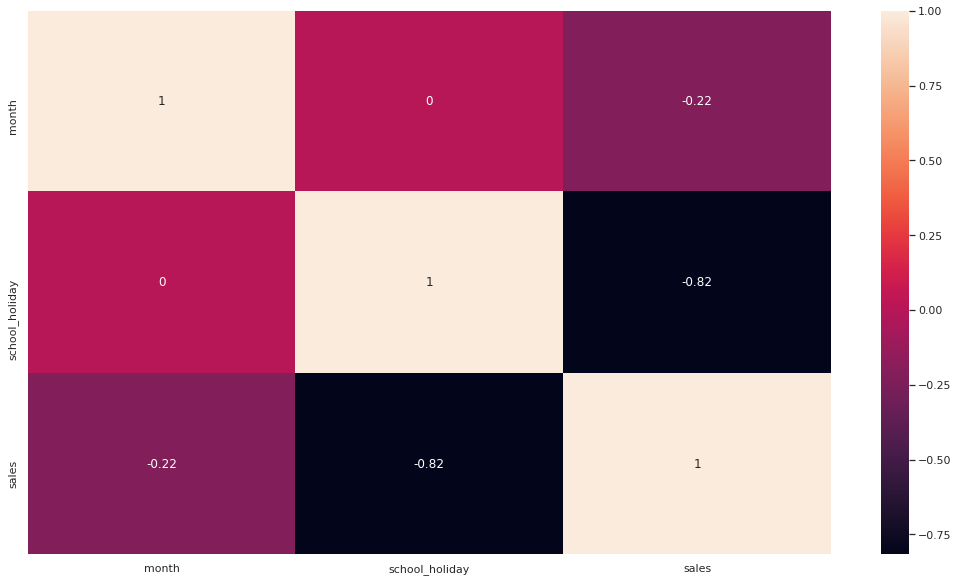

In [ ]:
sns.heatmap( aux2.corr(),annot=True)

## 4.3 Análise Multivariada

Analisa-se várias variáveis ao mesmo tempo com o resultado e também analisa-se as variáveis entre sí.

**funcionamento** - Os modelos de ML tem como uma das premissas a navalha de Occam, o qual **um modelo com menos complexidade deve alcançar um aprendizado mais generelizado**. Uma das maneiras de se diminuir a complexidade de um modelo é **diminuindo o número de informações não relevantes**. Uma dessas informações não relevantes são colunas que contém **características semelhantes**. Uma solução para auxiliar a remoção das variáveis com perfil mais parecido, seria o clustermap, o qual é uma boa forma de minimizar a complexidade do modelo. Lembrando, que o Clustermap, agrupa as linhas e colunas com mais informações similares, e apartir delas cria-se clusters... o qual esses cluster começam a ser comparado com outras colunas/linhas e forma novos clusters... até chegar no último cluster.

### 4.3.1 Numerical Attribute

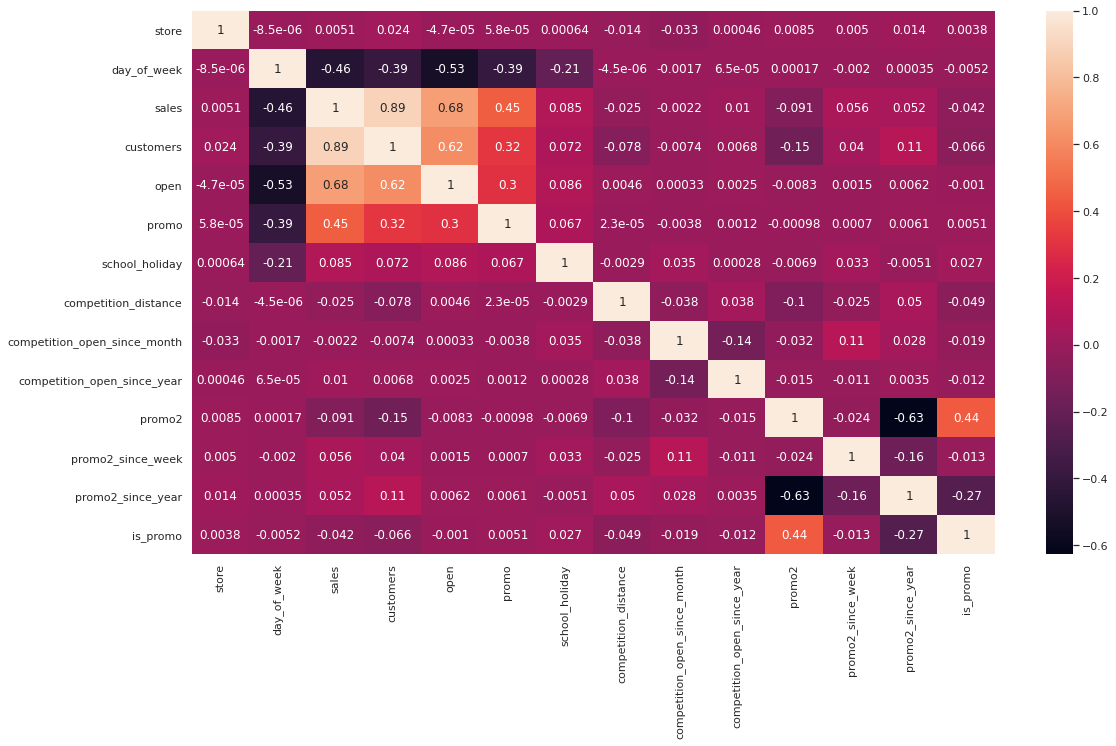

In [ ]:
correlation = num_attributes.corr()

sns.heatmap(correlation,annot=True)

Observe que a correlação de SALES e CUSTOMERS é muito alta 0.89, que indica uma alta correlação, e além disso é possitiva, que significa que quanto mais costumers na loja, mais vendas teremos. O único problema, é que não temos a quantidade de costumers nas próximas 6 semanas... então é uma variável descartada já... ( a não ser que você faça um machinea Learning para prever quantos Costumers teremos na loja nas próximas 6 semanas... e insira o valor dos customers neste projeto final)

### 4.3.2 Categorical Attribute

O problema, é que não podemos usar a função corr() aplicando o método de pearson aqui, pois esse método não consegue ser aplicado entre atributos categóricos e entre atributos categóricos e numéricos. Logo iremos usar o método **Cramer V**. Vale lembrar que o V de Cramer vai de 0 até 1... Logo, não é igual ao pearson que correlaciona de -1 até 1.

In [ ]:
# Pegar novamente os atributos de categoria (execeto o year_week que está como OBJECT mas é data)
a = df4.select_dtypes(include='object')
a.head()

,state_holiday,store_type,assortment,year_week
0,regular_day,c,basic,2015-30
1,regular_day,a,basic,2015-30
2,regular_day,a,basic,2015-30
3,regular_day,c,extended,2015-30
4,regular_day,a,basic,2015-30


<img src = "./img/cramer_v.png">

In [ ]:
pd.crosstab(a['state_holiday'],a['store_type']) # Confuse Matriz

store_type,a,b,c,d
state_holiday,,,,
christmas,4,66,0,1
easter_holiday,36,100,0,9
public_holiday,236,285,65,108
regular_day,456766,15109,112903,258650


In [ ]:
"""def cramer_v(x,y): # Sem correcao
    cm = pd.crosstab(x,y).as_matrix() # Confuse Matriz
    chi2 = ss.chi2_contingency( cm )[0] # Chi2 derivado de Pearson # cm = Confuse Matriz
    n = cm.sum()
    r, k = cm.shape
    v = np.sqrt( ( chi2 / n ) / min( k-1 , r-1 ) )
    return v"""

'def cramer_v(x,y): # Sem correcao\n    cm = pd.crosstab(x,y).as_matrix() # Confuse Matriz\n    chi2 = ss.chi2_contingency( cm )[0] # Chi2 derivado de Pearson # cm = Confuse Matriz\n    n = cm.sum()\n    r, k = cm.shape\n    v = np.sqrt( ( chi2 / n ) / min( k-1 , r-1 ) )\n    return v'

In [ ]:
cramer_v(a['state_holiday'],a['store_type'])

0.07106469715258833

<img src = "./img/cramer_v_correcao.png">

In [ ]:
"""# Fazer correcao
def cramer_v(x,y):
    cm = pd.crosstab(x,y).as_matrix() # Confuse Matriz
    chi2 = ss.chi2_contingency( cm )[0] # Chi2 derivado de Pearson # cm = Confuse Matriz
    n = cm.sum()
    r, k = cm.shape
    
    
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)

    v = np.sqrt( ( chi2corr / n ) / min( kcorr-1 , rcorr-1 ) )
    return v
"""

'# Fazer correcao\ndef cramer_v(x,y):\n    cm = pd.crosstab(x,y).as_matrix() # Confuse Matriz\n    chi2 = ss.chi2_contingency( cm )[0] # Chi2 derivado de Pearson # cm = Confuse Matriz\n    n = cm.sum()\n    r, k = cm.shape\n    \n    \n    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))\n    kcorr = k - (k-1)**2/(n-1)\n    rcorr = r - (r-1)**2/(n-1)\n\n    v = np.sqrt( ( chi2corr / n ) / min( kcorr-1 , rcorr-1 ) )\n    return v\n'

In [ ]:
cramer_v(a['state_holiday'],a['store_type'])

0.07106469715258833

In [ ]:
a1 = cramer_v(a['state_holiday'],a['state_holiday'])
a2 = cramer_v(a['state_holiday'],a['store_type'])
a3 = cramer_v(a['state_holiday'],a['assortment'])

a4 = cramer_v(a['store_type'],a['state_holiday'])
a5 = cramer_v(a['store_type'],a['store_type'])
a6 = cramer_v(a['store_type'],a['assortment'])

a7 = cramer_v(a['assortment'],a['state_holiday'])
a8 = cramer_v(a['assortment'],a['store_type'])
a9 = cramer_v(a['assortment'],a['assortment'])

d = pd.DataFrame( {
    'state_holiday': [a1,a2,a3],
    'store_type': [a4,a5,a6],
    'assortment': [a7,a8,a9]
})

d

,state_holiday,store_type,assortment
0,1.000002,0.071065,0.067546
1,0.071065,1.000002,0.538457
2,0.067546,0.538457,1.000001


In [ ]:
d = d.set_index(d.columns)
d

,state_holiday,store_type,assortment
state_holiday,1.000002,0.071065,0.067546
store_type,0.071065,1.000002,0.538457
assortment,0.067546,0.538457,1.000001


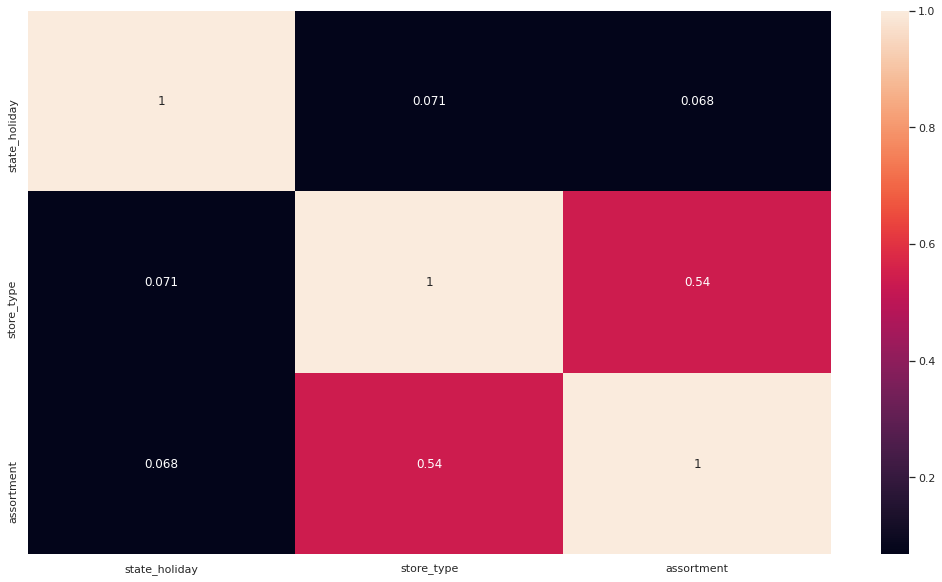

In [ ]:
# Agora finalmente podemos fazer o gráfico de
# correlaçao com o heatmap

sns.heatmap(d,annot=True)

# 5.0 Passo 5 - Preparação dos Dados

In [25]:
df5 = df4.copy()

**Três tipos de preparação dos dados**

**normalização**
- Rescala o centro para 0 com desvio-padrão igual a 1. (modo geral, maior valor vale 1 e o resto é a razão dele)
- Utilizada para <span style='color:blue'>distribuições Normais (gaussiana)

**rescaling**
- Rescala para o intervalo entre 0 e 1
- útil para distribuições <span style='color:red'> NÃO Gaussianas (Normal)

  
**Transformação de Grandeza e Natureza**   

A trasnformação de grandeza tem como objetivo trazer a sua variável resposta mais próximo possível de uma Gaussiana/Normal. A transformação de Natureza tem como objetivo trazer a natureza real dos seus dados. Exemplo de transformação de grandeza, os algorítims de ML foram criados em cima de algumas premissas, uma delas é que as dados apresentem uma distribuição normal, sendo assim, quanto mais próximo de uma normal, melhor será a accuracy do seu modelo.
    
**transformação tipo 1 - (encoding)**
- Conversão de Features categóricas para numérica

**trasnformação tipo 2 - transformação de Natureza**
- Ele pega características cíclicas e passa isso para o modelo (exemplo: 12 meses dentro de 1 ano... veja que 12 meses é ciclico). Logo, JAN está longe de DEZ do mesmo ano, mas no ano posterior DEZ está próximo de JAN, então ela tenta equilibrar essa diferença.


**OBSERVAÇÃO**
- Encode -> Fazer variáveis categóricas virarem NÚMEROS

- Normalização da escala -> é necessário normalizar a escala, pois os modelos tendem a dar mais importância para variáveis com ranges maiores.

## 5.1 Normalização

Não temos distribuição com aspecto gaussiano para aplicar

## 5.2 Rescaling

**Min-Max Scaler**

$\Large x_{new} = \frac{x_{i}- \mu}{x_{max}-x_{min}}$

Grande problema de se aplicar essa transformação é na presença de OUTLIERS, pois ela colocar os valores muito próximo de ZERO.

**Robust Scaler**

$\Large x_{new} = \frac{x_{i}- Q_{1}(x)}{ Q_{3}(x)-  Q_{1}(x)}$

Aplicando esta transformação, o problema dos OUTLIERS não irão interferir mais, pois você se baseia na diferença entre os (quartis) Q1 e Q3... que é onde estão a maior concentração de valores

In [ ]:
# Variáveis Não cíclicas

# Competition Distance
# year
# competition time month
# promo time week

Agora eu irei definir quais transformações utilizar, **se tiver outliers... uso a Robust Scaler**, caso contrário, **irei utilizar a Min-Max Scaler**.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


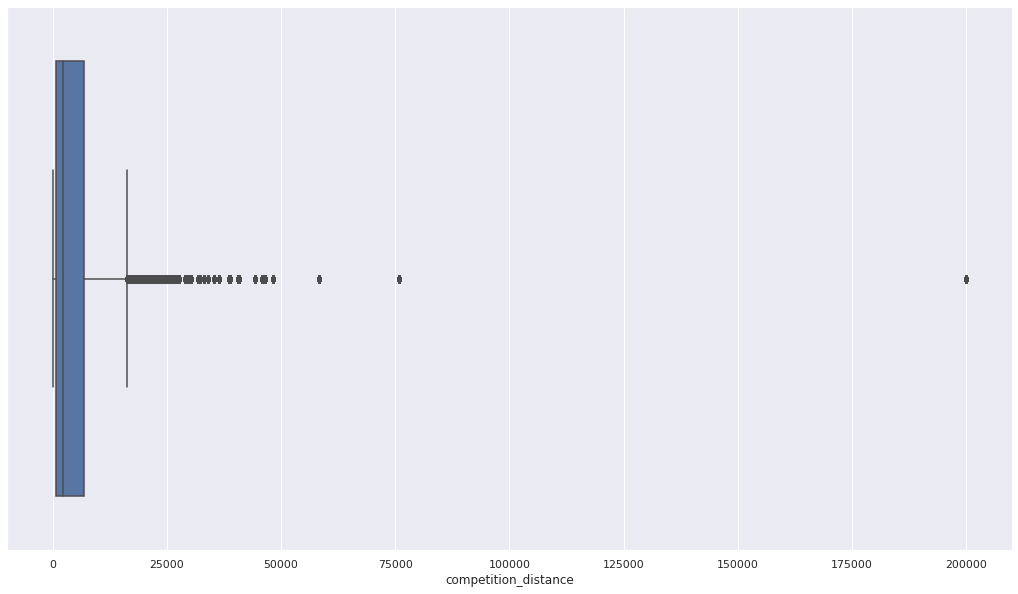

In [ ]:
sns.boxplot(df5['competition_distance'])

# TEM OUTLIEARs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


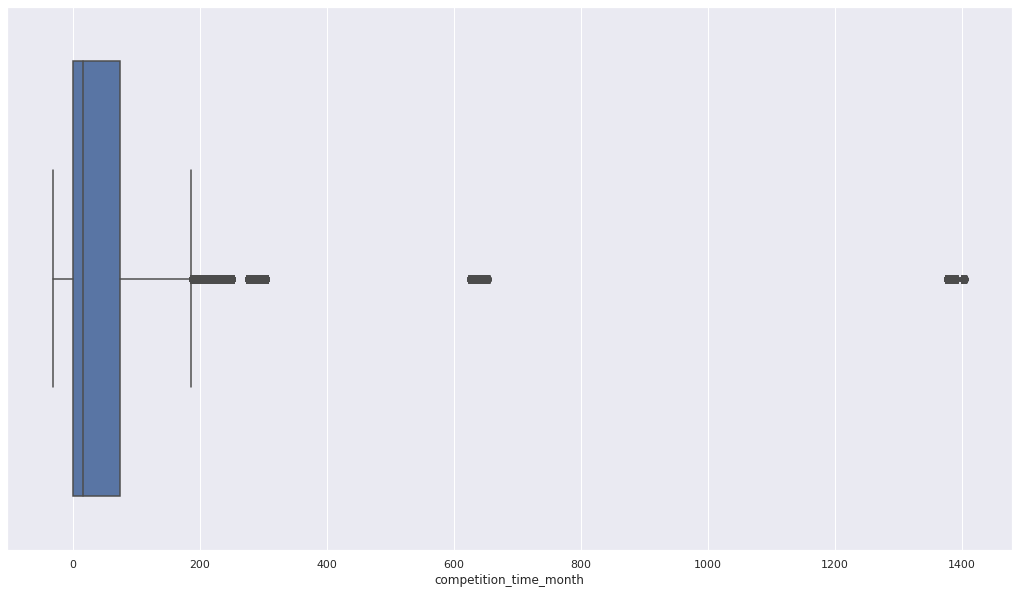

In [ ]:
sns.boxplot(df5['competition_time_month'])

# TEM OUTLIEARs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


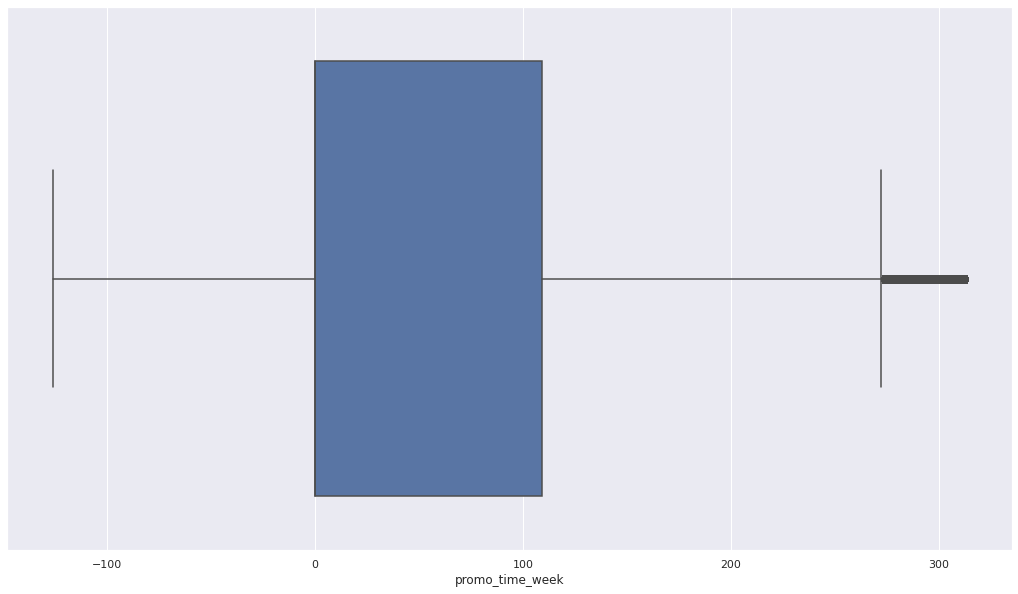

In [ ]:
sns.boxplot(df5['promo_time_week'])

# Os OUTLIEARs NÃO são relevantes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


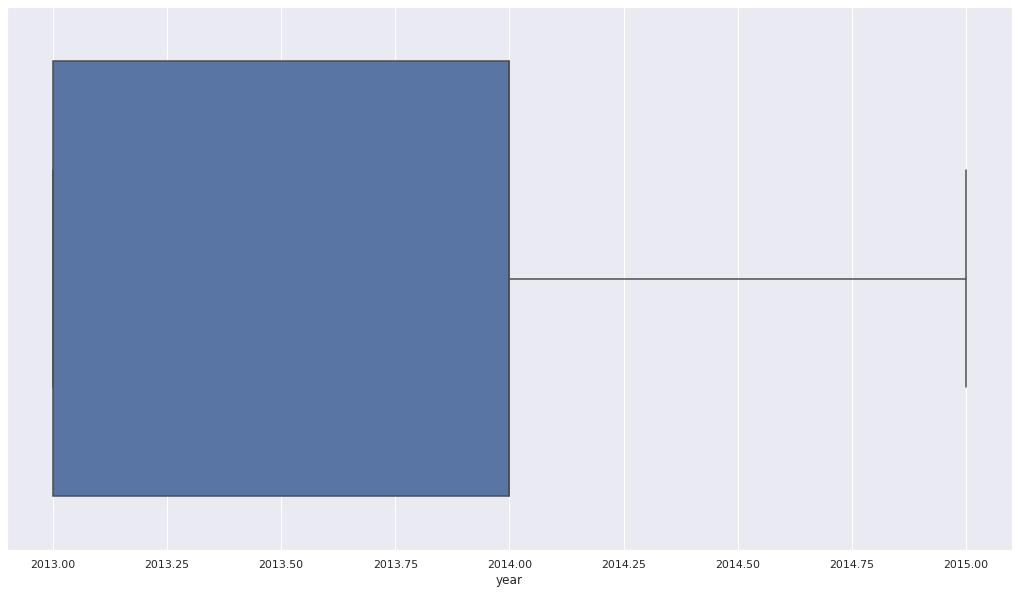

In [ ]:
sns.boxplot(df5['year'])
# Os OUTLIEARs NÃO são relevantes

In [ ]:
#from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [27]:
# Variáveis Não cíclicas
rs = RobustScaler()
mms = MinMaxScaler()
# Competition Distance (Robust Scaler)
df5['competition_distance']= rs.fit_transform( df5[['competition_distance']].values )
# salvar
pickle.dump( rs, open('parameter/competition_distance_scaler.pkl','wb'))

# competition time month (Robust Scaler)
df5['competition_time_month']= rs.fit_transform( df5[['competition_time_month']].values )
# salvar
pickle.dump( rs, open('parameter/competition_time_month_scaler.pkl','wb'))

# promo time week (MinMaxScaler)
df5['promo_time_week']= mms.fit_transform( df5[['promo_time_week']].values )
# salvar
pickle.dump( mms, open('parameter/promo_time_week_scaler.pkl','wb'))

# year
df5['year']= mms.fit_transform( df5[['year']].values )
# salvar
pickle.dump( mms, open('parameter/year_scaler.pkl','wb'))



In [ ]:
# Veja como ele escalou os anos... 1; 0.5; 0
pd.unique(df5['year']) # temos só 3 anos

array([1. , 0.5, 0. ])

In [ ]:
df5[['competition_distance','competition_time_month','promo_time_week','year']].sample(5)


,competition_distance,competition_time_month,promo_time_week,year
489038,-0.008065,-0.216216,0.419134,0.5
128389,0.224194,1.418919,0.886105,1.0
955737,-0.183871,-0.216216,0.287016,0.0
395192,0.000000,-0.256757,0.669704,0.5
324238,0.229032,1.905405,0.774487,0.5


## 5.3 Transformation

**encoding**

Existem mais de 10 tipos de encodings para variáveis categóricas. Qual utilizar? Somente com um bom feeling você saberá qual usar. Vamos analisar um por um dos mais utilizados.

### One Hot Encoding

<img src = './img/one_hot_encoding.png'>

Grande problema é que ele cria muitas colunas quando você tem muitos níveis de categoria... Isso bate de frento com o que discutimos anteriormente sobre a Navalha de Occam (quanto mais colunas, mais complexo, menor a generalização em ML)

Quando utilizar: Variáveis categóricas que representam ESTADO, exemplo: Aberto/Fechado , dia normal / Feriado ....

### Label Encoding

<img src = './img/label_encoding.png'>

Troca os tipos das variáveis categóricas por números.

Quando funciona bem: Quando você tem variáveis que são nomes, algo que não tem uma relação... exemplo: nomes

### Ordinal Encoding

<img src = './img/ordinal_encoding.png'>

É muito utilizado quando você tem relação de ordem de maior pro menor ou algo do tipo (exemplo temperatura).Por exemplo, cores, é algo que não precisamos utilizar o Ordinal... pois não há ORDEM ... neste caso das cores poderia utilizar Label Encoding, pois ele é apenas para transformar os nomes em números sem qualquer relação

### Target Encoding

<img src = './img/target_encoding.png'>

O nome Target surgiu pois ele leva em consideração a variável resposta (neste caso vendas). Exemplo com a temperatura, se sua loja vendeu mais em dias Hot, então ele terá um valor maior do que para dias Cold.

### Frequency Encoding

<img src = './img/frequency_encoding.png'>

Muito parecido com o Target, mas neste caso, ele encontra esses valores por contagens de ocorrências. Exemplo: Marca de carros

### Embedding Encoding

<img src = './img/embedding_encoding.png'>

Muito utilizado em NLP ( neuro-linguistic Programming)

### 5.3.1 Encoding

In [ ]:
#from sklearn.preprocessing import LabelEncoder

In [28]:
# state_holiday - One hot Encoding
df5 = pd.get_dummies(df5,prefix=['state_holiday'],columns=['state_holiday'])

# store_type - Label Encoding (vamos trocar apenas as letras por números, pois não há uma ordem de grandeza)
le = LabelEncoder()
df5['store_type']= le.fit_transform(df5['store_type'])
# salvar
pickle.dump( le, open('parameter/store_type_scaler.pkl','wb'))


# assortment - Ordinak Encoding ( existem uma ordem de grandeza agora, basic < extra < extended )
assortment_dict = {'basic':1,'extra':2, 'extended':3} 
df5['assortment'] = df5['assortment'].map(assortment_dict)

### 5.3.2 Transformação da Variável <span style='color:red'> Resposta (Sales)

Objetivo de Todas as transformações: Tenta trazer distribuições que apresentam um skew mais a direita ou esquerda, mais próximo de uma normal.

**logarithm Transformation** -Aplicar o Log em todas as variáveis resposta.

**Box-Cox Transformation** - (Formula)

**Cube-Root Transformation** - Extrair a raiz cúbica de todos os valores.

**Square-Root Transformation** - Extrair a raiz quadrada de todos os valores.

**Sine and Cosine Transformation** - ... seno e cosseno.


#### 5.3.2.1 Logarithm Transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


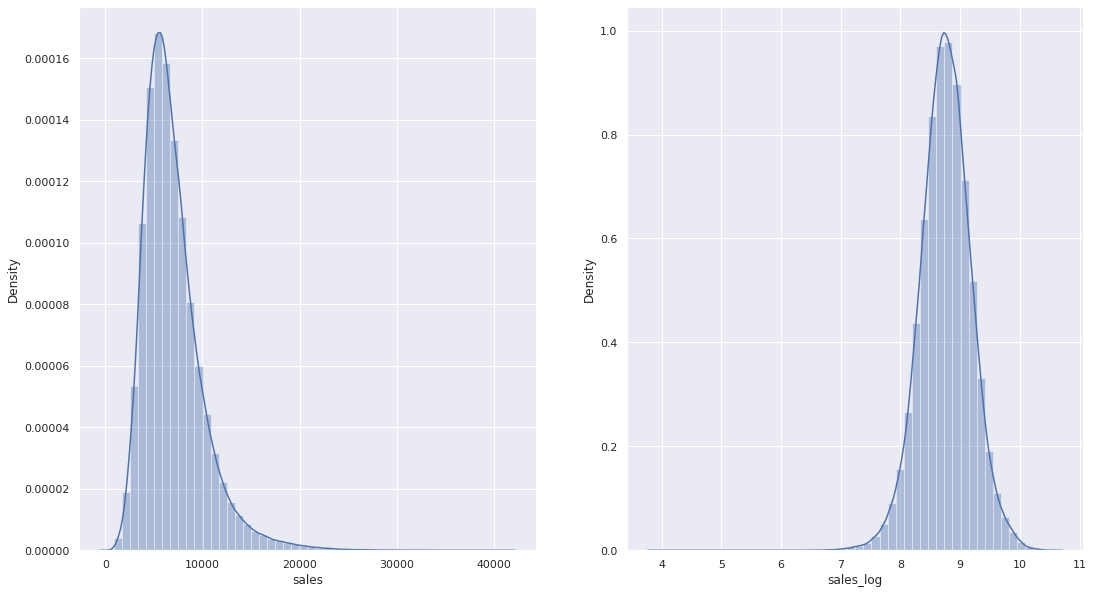

In [ ]:
# Distribuição das vendas antes da transformação
plt.subplot(1,2,1)
sns.distplot(df5['sales'])

# aplicando a transformação Log
plt.subplot(1,2,2)
df5['sales_log'] = np.log1p(df5['sales'])
sns.distplot(df5['sales_log'])



#### 5.3.2.2 Box-Cox Transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


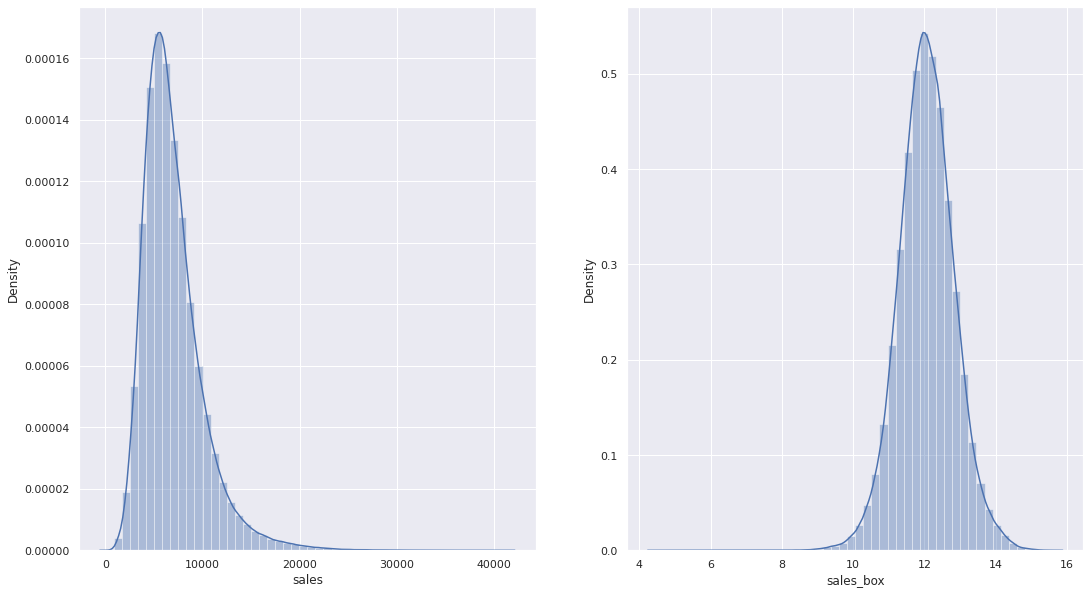

In [ ]:
# Distribuição das vendas antes da transformação
plt.subplot(1,2,1)
sns.distplot(df5['sales'])

# aplicando a transformação Box Cox
plt.subplot(1,2,2)
df5['sales_box'] = ss.boxcox(df5['sales'])[0]
sns.distplot(df5['sales_box'])



#### 5.3.2.3 Square-Root Transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


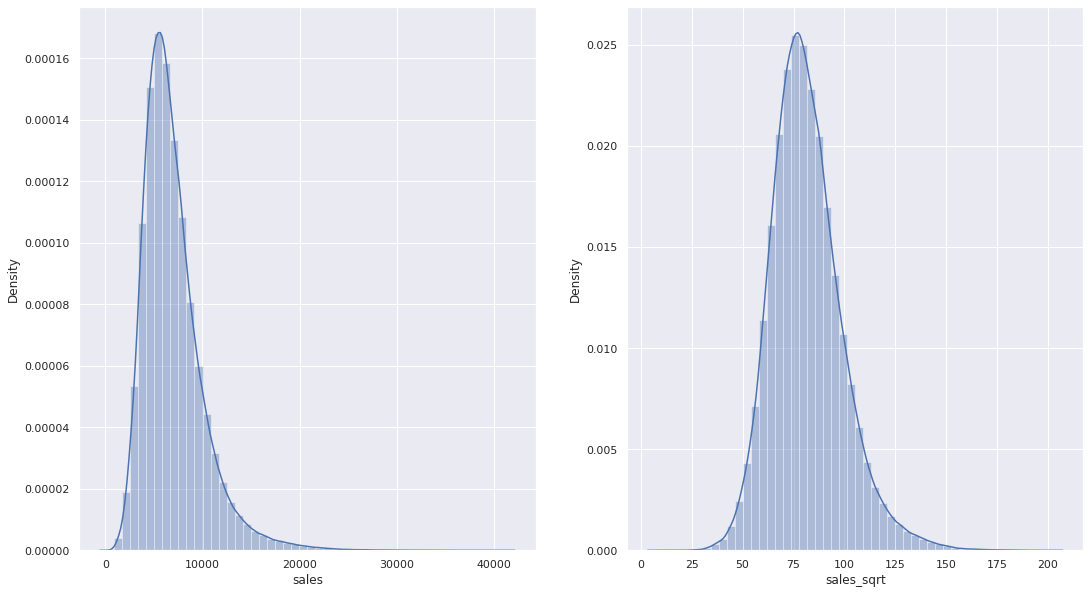

In [ ]:
# Distribuição das vendas antes da transformação
plt.subplot(1,2,1)
sns.distplot(df5['sales'])

# aplicando a transformação Square-Root
plt.subplot(1,2,2)
df5['sales_sqrt'] = np.sqrt(df5['sales'])
sns.distplot(df5['sales_sqrt'])

#### 5.3.2.4 Qual se aproxima mais de uma normal? Escolha

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

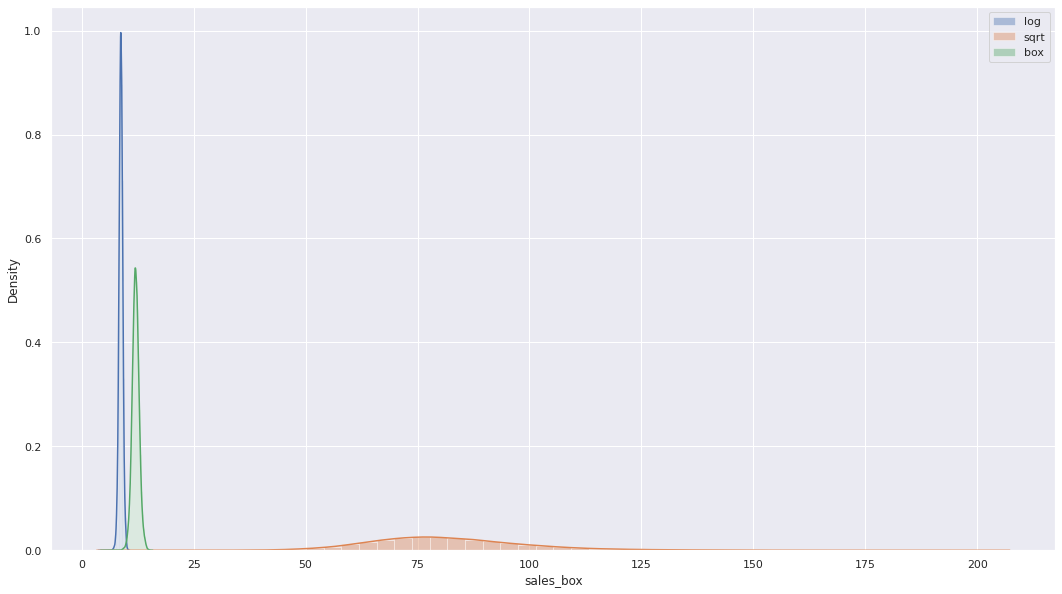

In [ ]:
# Compare
sns.distplot(df5['sales_log'],label = 'log')
sns.distplot(df5['sales_sqrt'], label= 'sqrt')
sns.distplot(df5['sales_box'], label= 'box')
plt.legend()

In [ ]:
# Parece que a Box-Cox foi a mais próxima, mas iremos usar a sales_log, para ficar igual ao do professor.
df5.drop(['sales_log','sales_sqrt','sales_box'],axis=1,inplace=True)

# usaremos
df5['sales'] = np.log1p(df5['sales'])

df5.head()

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day
0,1,5,2015-07-31,8.568646,1,1,2,1,-0.170968,9,2008,0,31,2015,0,1.0,7,31,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016,0,0,0,1
1,2,5,2015-07-31,8.710290,1,1,0,1,-0.283871,11,2007,1,13,2010,1,1.0,7,31,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551,0,0,0,1
2,3,5,2015-07-31,9.025816,1,1,0,1,1.903226,12,2006,1,14,2011,1,1.0,7,31,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822,0,0,0,1
3,4,5,2015-07-31,9.546527,1,1,2,3,-0.275806,9,2009,0,31,2015,0,1.0,7,31,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016,0,0,0,1
4,5,5,2015-07-31,8.481151,1,1,0,1,4.448387,4,2015,0,31,2015,0,1.0,7,31,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016,0,0,0,1


### 5.3.3 Nature Transformation  <span style='color:red'> (Aplicado nas Variáveis, não na resposta Sales)

#### 5.3.3.1 Cyclical Nature Transformation 

In [ ]:
# Variáveis Cíclicas

# year (não é cíclica)
# month
# day
# week of year
# day of week

**Como Funciona?** é bem simples, basicamente ele transforma uma coluna em duas colunas, aplicando um conceito de senos e cossenos para um vetor posição

<img src='https://github.com/miguelzeph/curso_ds_em_producao/blob/master/img/cyclical_nature_transformation.png?raw=1'>

In [ ]:
# Variáveis Cíclicas


# month
df5['month_sin'] = df5['month'].apply(lambda x: np.sin(x*(2*np.pi/12)))
df5['month_cos'] = df5['month'].apply(lambda x: np.cos(x*(2*np.pi/12)))
# day
df5['day_sin'] = df5['day'].apply(lambda x: np.sin(x*(2*np.pi/30)))
df5['day_cos'] = df5['day'].apply(lambda x: np.cos(x*(2*np.pi/30)))
# week of year
df5['week_of_year_sin'] = df5['week_of_year'].apply(lambda x: np.sin(x*(2*np.pi/52)))
df5['week_of_year_cos'] = df5['week_of_year'].apply(lambda x: np.cos(x*(2*np.pi/52)))
# day of week
df5['day_of_week_sin'] = df5['day_of_week'].apply(lambda x: np.sin(x*(2*np.pi/7)))
df5['day_of_week_cos'] = df5['day_of_week'].apply(lambda x: np.cos(x*(2*np.pi/7)))

In [ ]:
df5.head()

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day,month_sin,month_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos,day_of_week_sin,day_of_week_cos
0,1,5,2015-07-31,8.568646,1,1,2,1,-0.170968,9,2008,0,31,2015,0,1.0,7,31,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016,0,0,0,1,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521
1,2,5,2015-07-31,8.710290,1,1,0,1,-0.283871,11,2007,1,13,2010,1,1.0,7,31,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551,0,0,0,1,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521
2,3,5,2015-07-31,9.025816,1,1,0,1,1.903226,12,2006,1,14,2011,1,1.0,7,31,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822,0,0,0,1,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521
3,4,5,2015-07-31,9.546527,1,1,2,3,-0.275806,9,2009,0,31,2015,0,1.0,7,31,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016,0,0,0,1,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521
4,5,5,2015-07-31,8.481151,1,1,0,1,4.448387,4,2015,0,31,2015,0,1.0,7,31,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016,0,0,0,1,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521


# 6.0 Passo 6 - Feature Selection (seleção de variáveis)

Occam's Razor - A explicação mais simples sobre um fenômeno observado, deveria prevalecer sobre explicações mais complexas (**Princípio da Navalha de Occam**)

De modo geral, quando mais simples for seu modelo, mais generalista ele será, quando mais informações (colunas), mais você especifica seu modelo para problemas específicos.

Tente sempre remover as variáveis colineares, que são variáveis que explicam a mesma coisa, pois lembre-se do princípio da navalha de Occam, quanto menos variáveis, mais simples, logo remova as v. colineares sempre.

**Os 3 métodos de Seleção de Variáveis**

- <span style='color:blue'>**Seleção Univariada (Filter Methods)**

**vantagens**

Método Simples, Método Rápido,Fácil Entendimento

**desvantagens**

Não considera a influência **entre** as variáveis (você corre o risco de excluir variáveis importantes quando combinadas com outras).


-  <span style='color:blue'>**Seleção por Importância / Método Embutido (Embedded Methods)**

**Random Forest** (classificação ou Regressão), **Lasso Regression**, **Ridge Regression**:
   
-  <span style='color:blue'>**Seleção por Subset ( Wrapper Methods)**
    
Ele testa as variáveis uma a uma e combinada, se aumentar a accuracy, ele deixa, se permanecer a mesma ou diminuir ele exclui

<img src = './img/wrapper_method.png' width = '40%'>

In [ ]:
df6 = df5.copy()

In [ ]:
# google Colab + google Drive (ganhar tempo)
df6 = pd.read_csv('/content/drive/MyDrive/df/df6.csv')
# Mudar para data
df6['date'] = pd.to_datetime( df6['date'] )

In [ ]:
df6.head(1)

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day,month_sin,month_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos,day_of_week_sin,day_of_week_cos
0,1,5,2015-07-31,8.568646,1,1,2,1,-0.170968,9,2008,0,31,2015,0,1.0,7,31,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016,0,0,0,1,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521


In [ ]:
# Deletar algumas variáveis que estão duplicadas (lembra quen o passo 5 separamos algumas pelo Nature Transformation)
cols_drop = ['week_of_year','day_of_week','promo_since','month','day','competition_since','year_week']
df6 = df6.drop(cols_drop,axis=1)

In [ ]:
df6.head(1)

,store,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,competition_time_month,promo_time_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day,month_sin,month_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos,day_of_week_sin,day_of_week_cos
0,1,2015-07-31,8.568646,1,1,2,1,-0.170968,9,2008,0,31,2015,0,1.0,0.918919,0.287016,0,0,0,1,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521


### 6.1 Split dataframe into training and teste dataset

Atenção, diferente de outras predições, que você faz o Split e deixa a máquina pegar de forma aleatória os dados de treino e de teste, aqui não poderemos fazer assim, pois estamos trabalhando com uma linha temporal onde temos que prever os dados 6 semanas à frente. Se você deixar a máquina pegar os dados no futuro, ela nao estará teoricamente sendo testada, e você não poderá validar seu modelo, pois teremos um overfit do seu modelo... Então os dados de treino serão todos antes das 6 semanas... e os de testes serão todos após as 6 semanas finais.

Acompanhe abaixo o raciocínio para pegar as últimas 6 semanas de dados do nosso dataset

**Resumo:**

dados_treino: primeiro dia de venda ..... até o dia das últimas 6 semanas

dados_teste: as últimas 6 semanas

exemplo: tenho 46 semanas... meus treino: 40 semanas... teste: 6 semanas finais

In [ ]:
# Data de Início
df6[['store','date']].groupby('store').min().reset_index().head()

,store,date
0,1,2013-01-02
1,2,2013-01-02
2,3,2013-01-02
3,4,2013-01-02
4,5,2013-01-02


In [ ]:
# Data de final
df6[['store','date']].groupby('store').max().reset_index().head()

,store,date
0,1,2015-07-31
1,2,2015-07-31
2,3,2015-07-31
3,4,2015-07-31
4,5,2015-07-31


In [ ]:
# Vamos pegar 6 semanas dessa última data
# para isso vamos usar o timedelta, ele subtrai dias da sua data (muito útil)
df6[['store','date']].groupby('store').max().reset_index()['date'][0] - datetime.timedelta(days=6*7)

# portanto, a data que começa as últimas 6 semanas no nosso dataset é 19/06/2015

Timestamp('2015-06-19 00:00:00')

In [ ]:
# Training dataset
X_train = df6[df6['date'] < '2015-06-19']
y_train = X_train['sales']
# Test dataset
X_test = df6[df6['date'] >= '2015-06-19']
y_test = X_test['sales']

print(f'Training Min Date: { X_train["date"].min() }')
print(f'Training Max Date: { X_train["date"].max() }')

print(f'Test Min Date: { X_test["date"].min() }')
print(f'Test Max Date: { X_test["date"].max() }')


Training Min Date: 2013-01-01 00:00:00
Training Max Date: 2015-06-18 00:00:00
Test Min Date: 2015-06-19 00:00:00
Test Max Date: 2015-07-31 00:00:00


### 6.2 Algorístimo Boruta

In [ ]:
#from boruta import BorutaPy # !pip3.6 install boruta
#from sklearn.ensemble import RandomForestRegressor

In [ ]:
"""
X_train_n = X_train.drop(['date','sales'],axis=1).values
y_train_n = y_train.values.ravel() # ravel() coloca tudo dentro de um vetor

rf = RandomForestRegressor(
    n_jobs=-1, # para ir mais rápido
)

boruta = BorutaPy(
    estimator= rf, # modelo (iremos usar o RandomForest)
    n_estimators='auto', # número de ramificações
    verbose= 2, # print na tela
    random_state= 42, # Para que ele parta sempre do msm início (pode ser qualquer número)
).fit(X_train_n,y_train_n)
""";

### 6.2.1 Best Features from Boruta

In [ ]:
"""
# Rank de relevância das Variáveis
cols_selected = boruta.support_.tolist()

X_train_fs = x_train.drop(['date','sales'], axis=1)

cols_selected_boruta = X_train_fs.iloc[:, cols_selected].columns.to_list()


cols_not_selected_boruta = list( np.setdiff1d( X_train_fs.columns, cols_selected_boruta ) )
""";

In [ ]:
# Variáveis classificadas como úteis pelo Boruta
#cols_selected_boruta

In [ ]:
# Variáveis classificadas como ruins pelo Boruta
#cols_not_selected_boruta

<img src = './img/boruta.png'>

In [ ]:
# nossas variáveis analisadas no Cap 4
"""
assortment: baixa
competidores proximos: baixa
promo: baixa
promo2: baixa
natal/feriado: ....
year: alta
mes: alta
dia: alta
feriado_escolar: média
""";


In [ ]:
# o que fazer quando sua análise das variáveis não bate com o Boruta?
"""
1 - Usar apenas as variáveis que o Boruta classificou como Ok
2 - Usar as suas variáveis que você definiu importante no passo 4
3 - Fazer uma mescla do que você acha importante com o Boruta 


Dica: Como estamos utilizando o Método CRISP-DS, podemos escolher uma das alternativas
acima e testar... caso fique ruim a accuracia do modelo, vc testa outra opção
""";

In [7]:

 # Copiei e Colei do resultado do Boruta, para não ter que rodar ele toda vez
cols_selected_boruta = [
 'store',
 'promo',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'competition_time_month',
 'promo_time_week',
 'month_cos',
 'day_sin',
 'day_cos',
 'week_of_year_cos',
 'day_of_week_sin',
 'day_of_week_cos'
 ]
# Vamos colocar algumas informações que o Boruta deixou de fora
ext = [
    'month_sin',
    'week_of_year_sin',
    #'date',
    #'sales'
]

# Final features
cols_selected_boruta.extend( ext )

In [ ]:
cols_selected_boruta

['store',
 'promo',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'competition_time_month',
 'promo_time_week',
 'month_cos',
 'day_sin',
 'day_cos',
 'week_of_year_cos',
 'day_of_week_sin',
 'day_of_week_cos',
 'month_sin',
 'week_of_year_sin']

# 7.0 Passo 7 - Machine Learning Modelling

In [ ]:
df7 = df6.copy()

In [8]:
########################################################################
######## Se for Fazer pelo Google Colab, comece por aqui ###############

# google Colab + google Drive (ganhar tempo)
df7 = pd.read_csv('/content/drive/MyDrive/df/df7.csv')
# Mudar para data
df7['date'] = pd.to_datetime( df7['date'] )

# Copiei do Módulo 6 para não precisar ficar rodando ele
# Training dataset
X_train = df7[df7['date'] < '2015-06-19']
y_train = X_train['sales']
# Test dataset
X_test = df7[df7['date'] >= '2015-06-19']
y_test = X_test['sales']
########################################################################
########################################################################

#--------------------Dados e Train e Test (Dados Relevantes do Modelo) -----------------
x_train = X_train[ cols_selected_boruta ]
x_test = X_test[ cols_selected_boruta ]

#---------------- Cross Validation ------------------------
# primeiro precisamos adicionar novamente o "Date" e "Sales"

# OS DADOS DE TEST (x_test e y_test) já estão reservados
cols_selected_boruta_full = cols_selected_boruta.copy()
cols_selected_boruta_full.extend(['sales','date'])
# Fazer novamente igual fizemos no passo 7, mas adicionando Date e Sales
x_training = X_train[ cols_selected_boruta_full ]
#x_test = x_test[ cols_selected_boruta ]

## 7.1 Average Model

In [ ]:
#from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
"""# analisamos o erro para saber a performance

def mean_absolute_percentage_error( y, yhat ):
    return np.mean( np.abs( ( y-yhat ) / y ) )

def ml_error( model_name, y, yhat ):
    mae = mean_absolute_error( y, yhat)
    mape = mean_absolute_percentage_error( y, yhat ) 
    rmse = np.sqrt( mean_squared_error( y, yhat ) )
    
    return pd.DataFrame(
        {
            'Model name': model_name,
            'MAE': mae,
            'MAPE': mape,
            'RMSE': rmse
        },index = [0]
    )""";

In [ ]:
aux1 = x_test.copy()
aux1['sales'] = y_test.copy()

# predictions#------- Modelo de média-----
aux2 = aux1[['store','sales']].groupby('store').mean().reset_index().rename( columns = {'sales':'predictions'})
aux1 = pd.merge(aux1, aux2, how = 'left', on = 'store')
yhat_baseline = aux1['predictions'] # Prediction



# performance do Modelo
baseline_result = ml_error( 
    "Average Model",
    np.expm1( y_test ), # aplicando Exp para remover o log que aplicamos na trasnformação (passo 5)
    np.expm1( yhat_baseline ) # aplicar exp
)

baseline_result

,Model name,MAE,MAPE,RMSE
0,Average Model,1354.800353,0.2064,1835.135542


## 7.2 Linear Regression Model


In [ ]:
#from sklearn.linear_model import LinearRegression

In [ ]:
# model
lr = LinearRegression().fit(x_train,y_train)
# pred
yhat_lr = lr.predict(x_test)
# performance
lr_result = ml_error(
    "Linear Regression",
    np.expm1( y_test ), 
    np.expm1( yhat_lr )
)

In [ ]:
lr_result

,Model name,MAE,MAPE,RMSE
0,Linear Regression,1867.089774,0.292694,2671.049215


Veja que o modelo de Regressão Linear apresentou 0.29 MAPE, menor que o modelo de Média, logo, nosso problema é complexo, então um modelo linear não irá ressolver nosso caso

## 7.2.1 Linear Regression Model - Cross Validation 

In [ ]:
"""# VAMOS IMPLEMENTAR AGORA AQUELA FIGURA DO (TIME_SERIES_CROSS_VALIDATION)
def cross_validation( x_training,kfold ,model_name, model, verbose = False):
  mae_list = []
  mape_list = []
  rmse_list = []
  for k in reversed(range( 1, 6 )): # Usou-se o Reverse para ficar igual a Figura do professor
    if verbose:
      print(f'KFold Number: {k}')
    validation_start_date = x_training['date'].max() - datetime.timedelta(days=k*6*7)
    validation_end_date = x_training['date'].max() - datetime.timedelta(days=(k-1)*6*7)

    # filtering dataset
    training = x_training[ x_training['date'] < validation_start_date ]
    validation = x_training[ (x_training['date'] >= validation_start_date) & (x_training['date'] <= validation_end_date) ]

    # traning and validation dataset
    xtraining = training.drop( ['date','sales'], axis = 1 )
    ytraining = training['sales']
    # validation
    xvalidation = validation.drop( ['date','sales'], axis = 1 )
    yvalidation = validation['sales']

    # model
    m = model.fit( xtraining, ytraining )

    # prediction
    yhat = m.predict( xvalidation )

    # performance
    m_result = ml_error( model_name, np.expm1(yvalidation), np.expm1(yhat) )

    # Store Performance
    mae_list.append( m_result['MAE'])
    mape_list.append( m_result['MAPE'])
    rmse_list.append( m_result['RMSE'])

  return pd.DataFrame( {
      'Model Name': model_name,
      'MAE CV': np.around(np.mean( mae_list ),2).astype( str ) + ' +/- ' + np.around(np.std( mae_list ),2).astype( str ),
      'MAPE CV': np.around(np.mean( mape_list ),2).astype( str ) + ' +/- ' + np.around(np.std( mape_list ),2).astype( str ),
      'RMSE CV': np.around(np.mean( rmse_list ),2).astype( str ) + ' +/- ' + np.around(np.std( rmse_list ),2).astype( str ) 
      }, index = [0])"""

In [ ]:
lr_result_cv = cross_validation( x_training, 5, 'Linear Regression', model = lr )
lr_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2081.73 +/- 295.63,0.3 +/- 0.02,2952.52 +/- 468.37


,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2081.73 +/- 295.63,0.3 +/- 0.02,2952.52 +/- 468.37


## 7.3 Linear Regression Regularized Model

In [ ]:
#from sklearn.linear_model import Lasso

In [ ]:
# model
lrr = Lasso(alpha=0.01).fit(x_train,y_train)
# pred
yhat_lrr = lrr.predict(x_test)
# performance
lrr_result = ml_error(
    "Linear Regression",
    np.expm1( y_test ), 
    np.expm1( yhat_lrr )
)

lrr_result

,Model name,MAE,MAPE,RMSE
0,Linear Regression,1891.704882,0.289106,2744.451741


### 7.3.1 Linear Regression Regularized ( LASSO ) - Cross Validation 

In [ ]:
lrr_result_cv = cross_validation( x_training, 5, 'Lasso', model = lrr )
lrr_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Lasso,2116.38 +/- 341.5,0.29 +/- 0.01,3057.75 +/- 504.26


## 7.4 Random Forest Regression (Não linear)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# model
rf = RandomForestRegressor(
    n_estimators=100,
    n_jobs= -1,
    random_state=42,
).fit(x_train,y_train)
# pred
yhat_rf = rf.predict(x_test)
# performance
rf_result = ml_error(
    "Random Forest Regressor",
    np.expm1( y_test ), 
    np.expm1( yhat_rf )
)

rf_result

,Model name,MAE,MAPE,RMSE
0,Random Forest Regressor,679.284557,0.099876,1010.363385


### 7.4.1 Random Forest Regressior - Cross Validation 

In [ ]:
rf_result_cv = cross_validation( x_training, 5, 'Random Forest Regressior', model = rf, verbose= True)
rf_result_cv

KFold Number: 5
KFold Number: 4
KFold Number: 3
KFold Number: 2
KFold Number: 1


,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest Regressior,838.18 +/- 218.48,0.12 +/- 0.02,1257.28 +/- 318.81


## 7.5 XGBoost Regressor (Não linear)

In [ ]:
import xgboost as xgb

In [ ]:
# model
xgb_model = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators=100,
    eta = 0.01, # quantas passa
    max_depth = 10, #máxima profundidade
    subsample = 0.7,
    colsample_bytree= 0.9).fit(x_train,y_train)
# pred
yhat_xgb = xgb_model.predict(x_test)
# performance
xgb_result = ml_error(
    "XGBoost Regressor",
    np.expm1( y_test ), 
    np.expm1( yhat_xgb )
)

xgb_result

,Model name,MAE,MAPE,RMSE
0,XGBoost Regressor,844.363912,0.122954,1236.513177


### 7.4.1 XGBoost Regressor - Cross Validation 

In [ ]:
xgb_result_cv = cross_validation( x_training, 5, 'XGBoost Regressor', model_xgb, verbose = True )
xgb_result_cv

KFold Number: 5
KFold Number: 4
KFold Number: 3
KFold Number: 2
KFold Number: 1


,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest Regressior,1055.26 +/- 164.28,0.15 +/- 0.02,1522.73 +/- 229.53


## 7.6 Compare Model's Performance

### 7.6.1 Single Performance

In [ ]:
modelling_result = pd.concat( [ baseline_result, lr_result, lrr_result, rf_result, xgb_result ] )
modelling_result.sort_values('RMSE')

,Model name,MAE,MAPE,RMSE
0,Random Forest Regressor,679.284557,0.099876,1010.363385
0,XGBoost Regressor,844.363912,0.122954,1236.513177
0,Average Model,1354.800353,0.206400,1835.135542
0,Linear Regression,1891.704882,0.289106,2744.451741
0,Linear Regression,1980.039151,0.283893,2840.000319


### 7.6.2 Real Performance - Cross Validation

In [ ]:
modelling_result_cv['Model Name'] = ['Linear Regression','Lasso','Random Forest Regressior','XGBoost Regressor']

In [ ]:
modelling_result_cv = pd.concat( [ lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv ] )
modelling_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2081.73 +/- 295.63,0.3 +/- 0.02,2952.52 +/- 468.37
0,Lasso,2116.38 +/- 341.5,0.29 +/- 0.01,3057.75 +/- 504.26
0,Random Forest Regressior,838.18 +/- 218.48,0.12 +/- 0.02,1257.28 +/- 318.81
0,XGBoost Regressor,1055.26 +/- 164.28,0.15 +/- 0.02,1522.73 +/- 229.53


iremos seguir com o XGBoost Regressor, mesmo a random forest regressior ter dado um valor maior ( RFR tem muita coisa na internet já)

# 8.0 Passo 8 - HyperParameter Fine Tuning

## 8.1 Random Search

In [ ]:
param = {
    'n_estimators':[15, 25, 60, 100],
    'eta': [0.01, 0.03,0.05],
    'max_depth': [3,5,9],
    'subsample': [0.1,0.5,0.7],
    'colsample_bytree': [0.3, 0.7, 0.9],
    'min_child_weight': [3, 8, 15]
    }


In [ ]:
# testando o dict
for k, v in param.items():
  print(k)
  print(v)

n_estimators
[15, 25, 60, 100]
eta
[0.01, 0.03, 0.05]
max_depth
[3, 5, 9]
subsample
[0.1, 0.5, 0.7]
colsample_bytree
[0.3, 0.7, 0.9]
min_child_weight
[3, 8, 15]


In [ ]:
final_result = pd.DataFrame( )

MAX_EVAL = 5 # Quantidade de interações
K_FOLDERS = 3 # Quantidade de pacotes que ele irá separar o modelo (cross validation)

# model XGBOOST
for i in range ( MAX_EVAL ):
  # choose values for parameters randomly
  # models
  hp = { k: random.sample( v, 1 )[0] for k, v in param.items()}
  print( hp )

  model_xgb = xgb.XGBRegressor(
      objective = 'reg:squarederror',
      n_estimators = hp['n_estimators'],
      eta = hp['eta'], # quantas passa
      max_depth = hp['max_depth'], #máxima profundidade
      subsample = hp['subsample'],
      colsample_bytree = hp['colsample_bytree'],
      min_child_weight = hp['min_child_weight']
      )
  
  # performance
  result = cross_validation( x_training, K_FOLDERS ,'XGBoost Regressor', model_xgb)
  final_result = pd.concat( [ final_result, result ] )

final_result

{'n_estimators': 25, 'eta': 0.05, 'max_depth': 3, 'subsample': 0.1, 'colsample_bytree': 0.7, 'min_child_weight': 3}
{'n_estimators': 15, 'eta': 0.03, 'max_depth': 5, 'subsample': 0.5, 'colsample_bytree': 0.7, 'min_child_weight': 8}
{'n_estimators': 60, 'eta': 0.03, 'max_depth': 5, 'subsample': 0.1, 'colsample_bytree': 0.9, 'min_child_weight': 3}
{'n_estimators': 15, 'eta': 0.05, 'max_depth': 9, 'subsample': 0.5, 'colsample_bytree': 0.9, 'min_child_weight': 8}
{'n_estimators': 25, 'eta': 0.03, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.9, 'min_child_weight': 3}


,Model Name,MAE CV,MAPE CV,RMSE CV
0,XGBoost Regressor,3795.53 +/- 473.71,0.46 +/- 0.02,4750.95 +/- 583.55
0,XGBoost Regressor,6176.02 +/- 559.99,0.81 +/- 0.01,6896.83 +/- 661.28
0,XGBoost Regressor,1774.03 +/- 214.06,0.24 +/- 0.01,2560.31 +/- 300.68
0,XGBoost Regressor,6164.86 +/- 547.81,0.82 +/- 0.01,6867.59 +/- 653.5
0,XGBoost Regressor,3796.18 +/- 476.67,0.46 +/- 0.02,4745.32 +/- 583.55


## 8.2 Final Model

In [ ]:
param_tuned = { # Pegar os melhores Parâmetros testados no Random Search
    'n_estimators': 200,
    'eta': 0.03,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7 ,
    'min_child_weight': 3
    }

# modelo
model_xgb_tuned = xgb.XGBRegressor(
      objective = 'reg:squarederror',
      n_estimators = param_tuned['n_estimators'],
      eta = param_tuned['eta'], # quantas passa
      max_depth = param_tuned['max_depth'], #máxima profundidade
      subsample = param_tuned['subsample'],
      colsample_bytree = param_tuned['colsample_bytree'],
      min_child_weight = param_tuned['min_child_weight']
      ).fit(x_train,y_train) # train

# predictions
yhat_xgb_tuned = model_xgb_tuned.predict( x_test )
  
# performance
xgb_result_tuned = ml_error(
    "XGBoost Regressor",
    np.expm1( y_test ), 
    np.expm1( yhat_xgb_tuned )
)

# resultado final do nosso modelo!
xgb_result_tuned 

,Model name,MAE,MAPE,RMSE
0,XGBoost Regressor,1223.911664,0.183532,1775.81054


In [ ]:
# MPE Mean Percentage Error
# Superestimado - Valores Negativo
# Subestimado - Valores Positivo
mpe = mean_percentage_error( np.expm1(y_test) , np.expm1(yhat_xgb_tuned) )
mpe


-0.028467997547226245

In [ ]:
###### SALVAR O MODELO #######



#import pickle

In [ ]:
# Save Google COLAB
#pickle.dump(model_xgb_tuned , open('./drive/MyDrive/xgb_tuned.pkl','wb') )

# Save LOCAL
#pickle.dump(model_xgb_tuned , open('./model/xgb_tuned.pkl') ,'wb')

In [11]:
# Load Modelo

# Google COLAB
model_xgb_tuned = pickle.load(open('/content/drive/MyDrive/xgb_tuned.pkl','rb'))
yhat_xgb_tuned = model_xgb_tuned.predict( x_test )

# 9.0 Passo 9 - Interpretação e Tradução do Erro

In [12]:
df9 = X_test[ cols_selected_boruta_full ]

# rescale
df9[ 'sales' ] = np.expm1( df9['sales'] ) 
df9[ 'predictions' ] = np.expm1( yhat_xgb_tuned ) # Previsão do melhor modelo

Até aqui temos, o melhor modelo, e temos os erros calculados dele.

Temos:

MAE	(Mean Absolute Error)

MAPE (Mena Absolute Percentage Error)

RMSE (Root Mean Square Error)

**RMSPE (Root Mean Square Percentage Error)**

MPE (Mean Percentage Error)

1-) Avaliar o seu modelo:

Usamos o RMSE, pois ele é sensível a outliers, pois cada valor tem um grau diferente.

2-) Para o time de negócios, podemos enviar o MAE e o MAPE, pois ele distribui todos os erros de forma igual.

Lembrando que o MAE te dá uma noção do valor que ele era pra cima ou pra baixo.... já o MAPE dá uma noção de porcentagem para o time de negócio (eles conseguem enxergar se o modelo era muito ou pouco)

**porém você trabalha com vidas, exemplo, detecção de cancer, deve-se discutir o RMSE e RMSPE... pois ele é mais crítico com relação ao erro... então nestes casos, você não reporta o MAE e MAPE**

3-) Por último, você deve discutir o MPE, para as pessoas saberem se seu erro é superestimado (-) ou subestimado (+)... 

4 -) Por fim, você deverá comparar seu modelo com o que provavelmente a empresa já utiliza... exemplo:

| Error mod. Empresa | Erro mod. DS (seu) | Melhoria               |
|--------------------|--------------------|------------------------|
| MAE = 1100         | MAE = 665          | MAE = 435 = (1100-665) |
| MAPE = 17%         | MAPE = 10%         | MAPE = 7% = (17-10)%   |



## 9.1 Business Performance

In [24]:
# sum of predictions
df91 = df9[['store','predictions']].groupby( 'store' ).sum().reset_index()

# MAE and MAPE por loja
df9_aux1 = df9[['store','sales','predictions']].groupby( 'store' ).apply( lambda x: mean_absolute_error( x['sales'], x['predictions'] ) ).reset_index().rename( columns= {0:'MAE'} )
df9_aux2 = df9[['store','sales','predictions']].groupby( 'store' ).apply( lambda x: mean_absolute_percentage_error( x['sales'], x['predictions'] ) ).reset_index().rename( columns= {0:'MAPE'} )

# Merge
df9_aux3 = pd.merge( df9_aux1, df9_aux2, how = 'inner', on = 'store' )
df92 = pd.merge( df91, df9_aux3, how= 'inner', on = 'store' )

# Scenarios
df92['worst_scenario'] = df92['predictions'] - df92['MAE']
df92['best_scenario'] = df92['predictions'] + df92['MAE']

# order columns
df92 = df92[['store','predictions','worst_scenario','best_scenario','MAE', 'MAPE']]


In [26]:
df92.sample(6)

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
158,159,284083.468750,283613.779680,284553.157820,469.689070,0.058088
321,322,210429.375000,209556.521715,211302.228285,872.853285,0.236461
278,279,251868.671875,248751.882549,254985.461201,3116.789326,0.275826
75,76,297447.031250,296053.758050,298840.304450,1393.273200,0.151097
553,554,250595.718750,249346.328257,251845.109243,1249.390493,0.240747
163,164,205774.062500,204629.250607,206918.874393,1144.811893,0.159683


Então acima, vamos analisar rapidamente.

Loja 159:

- erro baixo de 5 % (MAPE)
- erro de 469 reais, pra mais ou pra menos (MAE)
- Logo posso pegar o melhor cenário, pois é confiável

Loja 279:

- erro alto de 27% (MAPE)
- erro de 3116.78 reais (MAE)
- Logo melhor não arriscar, vou me basear no Worst scenario.

In [27]:
# Você precisa mostrar que tem lojas que são mais difíceis de se fazer as previsões

# Ordem decrescente
df92.sort_values('MAPE',ascending=False).head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
542,543,167543.093750,165662.037321,169424.150179,1881.056429,0.866266
424,425,205380.484375,202993.444389,207767.524361,2387.039986,0.821029
487,488,244031.390625,241172.893726,246889.887524,2858.496899,0.785964
472,473,206556.890625,204253.515097,208860.266153,2303.375528,0.745195
291,292,122795.085938,119183.737562,126406.434313,3611.348376,0.740179


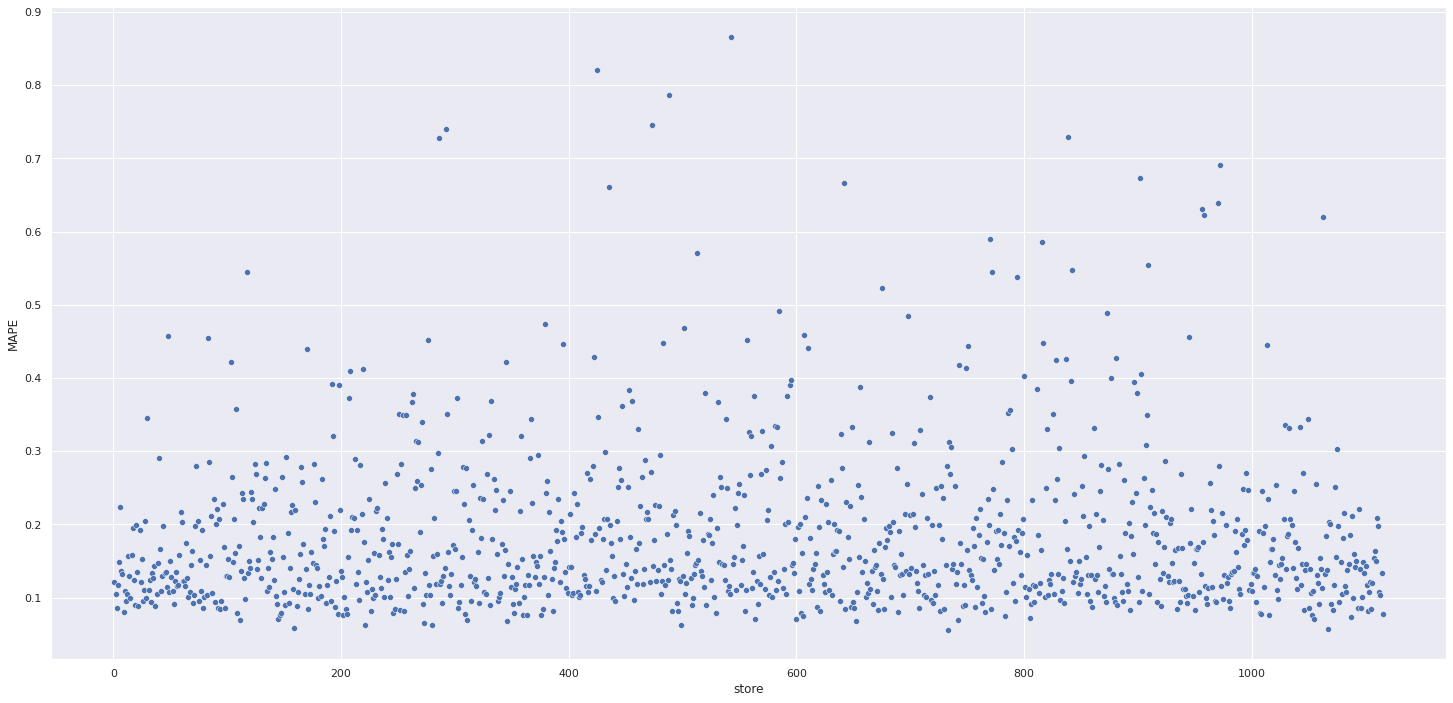

In [30]:
# Ou pelo gráfico
sns.scatterplot( x= 'store', y='MAPE', data = df92 )

## 9.2 Total Perfomance

In [40]:
df93 = df92[['predictions','worst_scenario','best_scenario']].apply(lambda x: np.sum(x),axis=0).reset_index().rename( columns = {'index':'scenario',0:'Values'})
df93['Values'] = df93['Values'].map( 'R$ {:,.2f}'.format )
df93

,scenario,Values
0,predictions,"R$ 277,505,856.00"
1,worst_scenario,"R$ 276,139,025.08"
2,best_scenario,"R$ 278,872,666.34"


## 9.3 Machine Learning Performance

In [41]:
df9['error'] = df9['sales'] - df9['predictions']
df9['error_rate'] = df9['predictions'] / df9['sales']

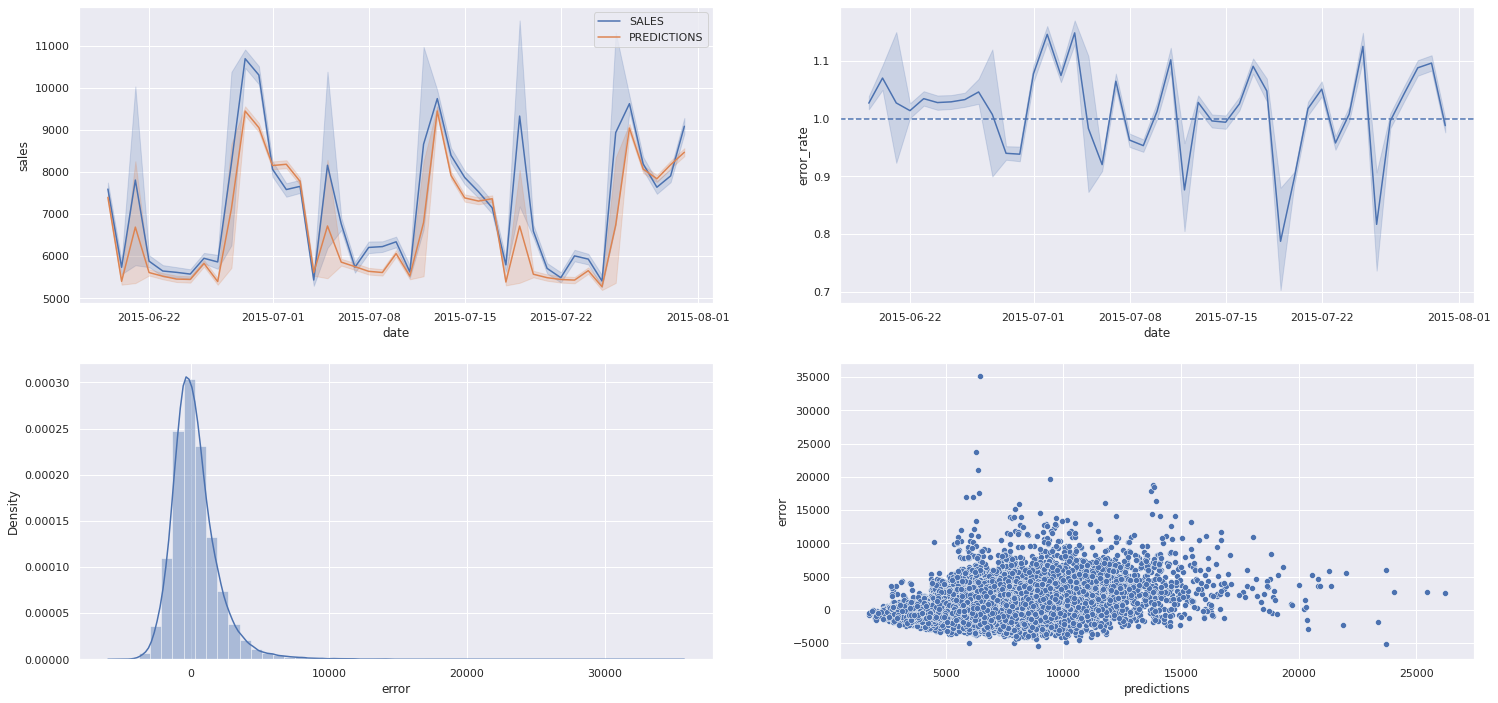

In [46]:
plt.subplot(2,2,1)
sns.lineplot(x='date',y='sales',data = df9, label = 'SALES')
sns.lineplot(x='date',y='predictions',data=df9, label='PREDICTIONS')

# bom para analisar Superestimação (acima do 1) e Subestimação (abaixo do 1)
plt.subplot(2,2,2)
sns.lineplot(x='date',y='error_rate',data = df9)
plt.axhline(1,linestyle='--')

# ficou uma distribuição normal
plt.subplot(2,2,3)
sns.distplot(df9['error'])

# Análise de Resíduo
plt.subplot(2,2,4)
sns.scatterplot(df9['predictions'],df9['error'])

# 10.0 Passo 10 - Deploy Model To Production

In [39]:
import pickle
import inflection
import pandas as pd
import numpy as np
import math
import datetime

class Rossmann(object):
    def __init__(self):
        self.competition_distance_scaler   = pickle.load(open('./parameter/competition_distance_scaler.pkl','rb'))
        self.competition_time_month_scaler = pickle.load(open('./parameter/competition_time_month_scaler.pkl','rb'))
        self.promo_time_week               = pickle.load(open('./parameter/promo_time_week_scaler.pkl','rb'))
        self.year_scaler                   = pickle.load(open('./parameter/year_scaler.pkl','rb'))
        self_store_type_scaler             = pickle.load(open('./parameter/store_type_scaler.pkl','rb'))

    # sec 1
    def data_cleaning(self,df1):
        
        ### 1.1 Rename Columns (sempre faça isso para facilitar)
        cols_old = ['Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
               'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
               'CompetitionDistance', 'CompetitionOpenSinceMonth',
               'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
               'Promo2SinceYear', 'PromoInterval']

        # Função Lambda para aplicar
        snakecase = lambda x: inflection.underscore( x )
        # Map aplicar uma função em cada elemento de uma lista
        cols_new = list(map(snakecase,cols_old))
        # rename
        df1.columns = cols_new

        df1.columns

        ### 1.3 Data type
        
        # Mudar pra date type
        df1['date'] = pd.to_datetime( df1['date'] )
        
        ### 1.5 Fillout NA ( Preencher os NA)
        
        df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

        df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'],axis=1)

        df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'],axis=1)

        df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

        df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

        df1['promo_interval'].fillna(0,inplace=True) # substituir os NaN por zero primeiro

        # criar um dict month_map (para fazer comparação com os promo_interval)
        month_map = {1:'Jan',2:'Fev',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

        df1['month_map'] = df1['date'].dt.month.map(month_map)

        df1['promo_interval'].fillna(0,inplace=True) # substituir os NaN por zero primeiro

        df1['month_map'] = df1['date'].dt.month.map(month_map)

        df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )

        # Passar para inteiro

        df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
        df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
        df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
        df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)
        
 
        
        return df1
    
    def feature_engineering( self, df2 ):

        # year
        df2['year'] = df2['date'].dt.year
        # month
        df2['month'] = df2['date'].dt.month
        # day
        df2['day'] = df2['date'].dt.day
        # week of year
        df2['week_of_year'] = df2['date'].dt.weekofyear
        # year week
        df2['year_week'] = df2['date'].dt.strftime( "%Y-%W" )

        # competition since
        df2['competition_since'] = df2.apply( lambda x: datetime.datetime(year=x['competition_open_since_year'],month=x['competition_open_since_month'],day=1 ),axis=1)
        df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype(int)

        # promo since
        df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
        df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w') - datetime.timedelta( days = 7 ))
        df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply(lambda x: x.days).astype( int )


        # assortment
        df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

        # state holiday
        df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')
        
        # 3.0 Filtragem de Variáveis
        df2 = df2[(df2['open'] != 0) & (df2['sales'] > 0)]

        ## 3.2 Selecao das Colunas

        cols_drop = ['customers','open','promo_interval','month_map']
        df2 = df2.drop( cols_drop, axis=1 )
        
        return df2

    

    
    # sec 5
    def data_preparation(self,df5):
        
        # Competition Distance (Robust Scaler)
        df5['competition_distance']= self.competition_distance_scaler.fit_transform( df5[['competition_distance']].values )
        # competition time month (Robust Scaler)
        df5['competition_time_month']= self.competition_time_month_scaler.fit_transform( df5[['competition_time_month']].values )
        # promo time week (MinMaxScaler)
        df5['promo_time_week']= self.promo_time_week.fit_transform( df5[['promo_time_week']].values )
        # year
        df5['year']= self.year_scaler.fit_transform( df5[['year']].values )

        # state_holiday - One hot Encoding
        df5 = pd.get_dummies(df5,prefix=['state_holiday'],columns=['state_holiday'])

        # store_type - Label Encoding (vamos trocar apenas as letras por números, pois não há uma ordem de grandeza)
        df5['store_type']= self.store_type_scaler.fit_transform(df5['store_type'])

        # assortment - Ordinak Encoding ( existem uma ordem de grandeza agora, basic < extra < extended )
        assortment_dict = {'basic':1,'extra':2, 'extended':3} 
        df5['assortment'] = df5['assortment'].map(assortment_dict)
        # month
        df5['month_sin'] = df5['month'].apply(lambda x: np.sin(x*(2*np.pi/12)))
        df5['month_cos'] = df5['month'].apply(lambda x: np.cos(x*(2*np.pi/12)))
        # day
        df5['day_sin'] = df5['day'].apply(lambda x: np.sin(x*(2*np.pi/30)))
        df5['day_cos'] = df5['day'].apply(lambda x: np.cos(x*(2*np.pi/30)))
        # week of year
        df5['week_of_year_sin'] = df5['week_of_year'].apply(lambda x: np.sin(x*(2*np.pi/52)))
        df5['week_of_year_cos'] = df5['week_of_year'].apply(lambda x: np.cos(x*(2*np.pi/52)))
        # day of week
        df5['day_of_week_sin'] = df5['day_of_week'].apply(lambda x: np.sin(x*(2*np.pi/7)))
        df5['day_of_week_cos'] = df5['day_of_week'].apply(lambda x: np.cos(x*(2*np.pi/7)))
        
        cols_selected= ['store','promo','store_type','assortment','competition_distance','competition_open_since_month','competition_open_since_year',
         'promo2','promo2_since_week','promo2_since_year','competition_time_month','promo_time_week',
         'month_cos','day_sin','day_cos','week_of_year_cos','day_of_week_sin','day_of_week_cos']
        ext = ['month_sin','week_of_year_sin',]

        cols_selected.extend( ext )
        
        return df5[ cols_selected ]
    
    def get_prediction( self, model, original_data, test_data):
        
        # predict
        pred = model.predict( test_data )
        
        # join pred into the original data
        original_data['prediction'] = np.expm1( pred )
        
        return original_data.to_json( orient = 'records', date_format = 'iso' )
    



## 10.2 API Handler

In [ ]:
from flask import Flask, request, Response
import pandas as pd

from rossmann.Rossmann import Rossmann

import pickle
# loading Model
model = pickle.load(open('https://github.com/miguelzeph/curso_ds_em_producao/blob/master/model/xgb_tuned.pkl','rb'))

# Initialize API
app = Flask(__name__)

@app.route('/rossmann/predict',methods = ['POST'])
def rossmann_predict():
    test_json = request.get_json()
    
    if test_json: # there is data
        
        if isinstance( test_json, dict): # Unique examples
            test_raw = pd.DataFrame( test_json, index = [0] )  
        else: # Multiple examples
            test_raw = pd.DataFrame( test_json, columns = test_json[0].keys() ) 
            
        # instantiate (criar cópia) rossmann class
        pipeline = Rossmann()
        
        # Data Cleaning
        df1 = pipeline.data_cleaning( test_raw )
        
        # Feature engineering
        df2 = pipeline.feature_engineering( df1 )
        
        # Data preparation
        df3 = pipelinedata_preparation( df2 )
        
        # Prediction
        df_response = pipeline.get_prediction( model, test_raw, df3 )
        
        return df_response
        
    else:
        return Response( '{}', status=200, mimetype='application/json')


if __name__ == '__main__':
    app.run('0.0.0.0')

## 10.3 API Tester

In [139]:
df10 = pd.read_csv('https://raw.githubusercontent.com/miguelzeph/curso_ds_em_producao/master/data/test.csv',low_memory=False)

In [140]:
df10.head(1)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0


In [141]:

# merge test dataset + store
df_test = pd.merge( df10, df_store_raw, how = 'left', on = 'Store' )

# choose store for prediction
df_test = df_test[df_test['Store']==22]

# remove closed days
df_test = df_test[df_test['Open'] != 0]
df_test = df_test[~df_test['Open'].isnull()]
df_test = df_test.drop('Id',axis=1)

In [142]:
df_test.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
15,22,4,2015-09-17,1.0,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
871,22,3,2015-09-16,1.0,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1727,22,2,2015-09-15,1.0,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
2583,22,1,2015-09-14,1.0,1,0,1,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
4295,22,6,2015-09-12,1.0,0,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [143]:
import json

# convert Datarame to Json
data = json.dumps( df_test.to_dict( orient = 'records' ) )

In [144]:
data.split('{')[1]

'"Store": 22, "DayOfWeek": 4, "Date": "2015-09-17", "Open": 1.0, "Promo": 1, "StateHoliday": "0", "SchoolHoliday": 0, "StoreType": "a", "Assortment": "a", "CompetitionDistance": 1040.0, "CompetitionOpenSinceMonth": NaN, "CompetitionOpenSinceYear": NaN, "Promo2": 1, "Promo2SinceWeek": 22.0, "Promo2SinceYear": 2012.0, "PromoInterval": "Jan,Apr,Jul,Oct"}, '

In [163]:
import requests
# API Call
#url = 'http://0.0.0.0:5000/rossmann/predict'
url = 'https://dsproducao2021.herokuapp.com/rossmann/predict' 
header = {'Content-type':'application/json'} 
data = data

r = requests.post(url,data=data,headers = header)
print('Status code {}'.format(r.status_code))

Status code 200


In [164]:
r.json()[0]

{'store': 22,
 'day_of_week': 4,
 'date': '2015-09-17T00:00:00.000Z',
 'open': 1.0,
 'promo': 1,
 'state_holiday': 'regular_day',
 'school_holiday': 0,
 'store_type': 'a',
 'assortment': 'basic',
 'competition_distance': 1040.0,
 'competition_open_since_month': 9,
 'competition_open_since_year': 2015,
 'promo2': 1,
 'promo2_since_week': 22,
 'promo2_since_year': 2012,
 'promo_interval': 'Jan,Apr,Jul,Oct',
 'month_map': 'Sep',
 'is_promo': 0,
 'year': 2015,
 'month': 9,
 'day': 17,
 'week_of_year': 38,
 'year_week': '2015-37',
 'competition_since': '2015-09-01T00:00:00.000Z',
 'competition_time_month': 0,
 'promo_since': '2012-05-21T00:00:00.000Z',
 'promo_time_week': 173,
 'prediction': 5565.8740234375}

In [153]:
d1 = pd.DataFrame( r.json(), columns = r.json()[0].keys())

In [154]:
d1.head()

,store,day_of_week,date,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,prediction
0,22,4,2015-09-17T00:00:00.000Z,1.0,1,regular_day,0,a,basic,1040.0,...,2015,9,17,38,2015-37,2015-09-01T00:00:00.000Z,0,2012-05-21T00:00:00.000Z,173,5565.874023
1,22,3,2015-09-16T00:00:00.000Z,1.0,1,regular_day,0,a,basic,1040.0,...,2015,9,16,38,2015-37,2015-09-01T00:00:00.000Z,0,2012-05-21T00:00:00.000Z,173,5550.557617
2,22,2,2015-09-15T00:00:00.000Z,1.0,1,regular_day,0,a,basic,1040.0,...,2015,9,15,38,2015-37,2015-09-01T00:00:00.000Z,0,2012-05-21T00:00:00.000Z,173,6343.299316
3,22,1,2015-09-14T00:00:00.000Z,1.0,1,regular_day,1,a,basic,1040.0,...,2015,9,14,38,2015-37,2015-09-01T00:00:00.000Z,0,2012-05-21T00:00:00.000Z,173,7538.454102
4,22,6,2015-09-12T00:00:00.000Z,1.0,0,regular_day,0,a,basic,1040.0,...,2015,9,12,37,2015-36,2015-09-01T00:00:00.000Z,0,2012-05-21T00:00:00.000Z,172,3604.501221
